In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Visakhapatnam']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
3469,3472,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,Black,8.32,0.39,0.71,...,1.33,3.44,1.42,12.44,0.092294,0.064874,0.389956,0.19924,-0.090595,Sugarcane
3470,3473,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,Black,8.27,0.52,0.66,...,1.72,34.78,3.60,3.90,0.092294,0.064874,0.389956,0.19924,-0.090595,Sugarcane
3471,3474,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,8.26,0.14,0.42,...,1.00,4.50,0.49,10.60,0.092294,0.064874,0.389956,0.19924,-0.090595,Paddy/ Sugarcane
3472,3475,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,8.09,0.16,0.27,...,0.83,9.86,1.05,16.68,0.092294,0.064874,0.389956,0.19924,-0.090595,Paddy/ Sugarcane
3473,3476,17.73,82.86,Visakhapatnam,Butchayyapeta,Chinna Madina,RED,7.90,0.12,0.19,...,0.49,10.44,0.81,14.28,0.092294,0.064874,0.389956,0.19924,-0.090595,Paddy/ Sugarcane


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'NDVI', 'EVI', 'GCI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,ARVI
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,6.809927,0.165418,0.642691,10.683745,153.418182,1239.952727,319.054545,10.000509,0.923091,0.924800,38.874036,1.968691,45.837018,0.090996
std,1.037585,0.221806,0.380173,12.766050,149.612454,710.870368,207.867186,19.193245,0.772242,0.698839,45.426617,1.161285,37.485161,0.081668
min,4.850000,0.020000,0.040000,1.620000,36.000000,250.000000,59.000000,0.630000,0.120000,0.160000,2.760000,0.420000,3.900000,0.024807
25%,5.920000,0.060000,0.365000,3.815000,88.000000,630.500000,149.000000,2.975000,0.480000,0.510000,15.260000,1.100000,18.230000,0.055351
50%,6.610000,0.110000,0.610000,6.450000,119.000000,1068.000000,277.000000,4.970000,0.720000,0.730000,25.820000,1.840000,31.380000,0.058965
75%,7.745000,0.180000,0.800000,11.660000,169.500000,1690.500000,441.000000,9.010000,1.030000,1.140000,41.520000,2.410000,65.640000,0.073244
max,9.420000,2.520000,2.640000,101.770000,2037.000000,3617.000000,1156.000000,184.300000,5.580000,7.430000,354.700000,8.340000,256.880000,0.521949


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black ', 'RED', '   Black', 'Red Sandy', 'Red', ' Red', 'Black  ',
       'Black', 'red sandy', 'red sandy\\', 'black sandy', 'blacksandy',
       'black sandy ', 'black', 'Red ', 'Black Sandy'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black', '   Black', 'Black  ', 'Black', 'black', 'Black '], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['RED', 'Red', ' Red', 'Red '], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Red Sandy', 'red sandy', 'red sandy\\'], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['black sandy', 'blacksandy', 'black sandy', 'Black Sandy', 'black sandy '], 'Black Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Red Sandy Soil', 'Black Sandy Soil'],
      dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 123,
 'Red Soil': 69,
 'Red Sandy Soil': 54,
 'Black Sandy Soil': 29}

<BarContainer object of 4 artists>

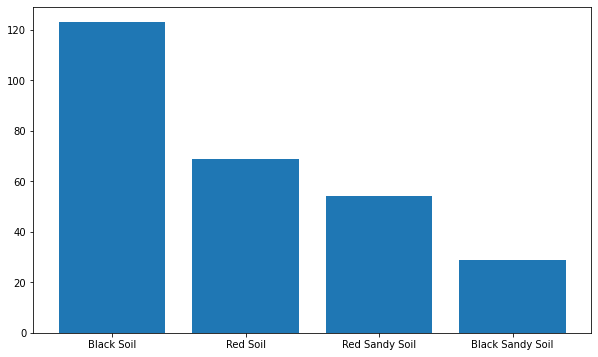

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Sugarcane ', 'Paddy/ Sugarcane', 'Paddy', 'Sugarcane',
       'suger cane ', 'paddy', 'SUGER CANE ', 'Ragi/Niger',
       'Maize/Paddy/Rajma', 'Maize/Rajma', 'Rajma/Maize',
       'Paddy/Maize/G.N', 'Maize', 'Groundnut', 'Turmeric', 'Ragi',
       'Paddy/Maize'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy/ Sugarcane     81
Paddy/Maize/G.N      33
Sugarcane            24
Paddy                20
Maize/Paddy/Rajma    20
suger cane           18
Paddy/Maize          16
Ragi/Niger           15
Rajma/Maize          14
Maize/Rajma          10
SUGER CANE            8
paddy                 7
Sugarcane             5
Turmeric              1
Maize                 1
Ragi                  1
Groundnut             1
Name: Crop, dtype: int64

Paddy + SugarCane    163
Paddy + Maize         70
Maize + Rajma         24
Ragi                  16
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

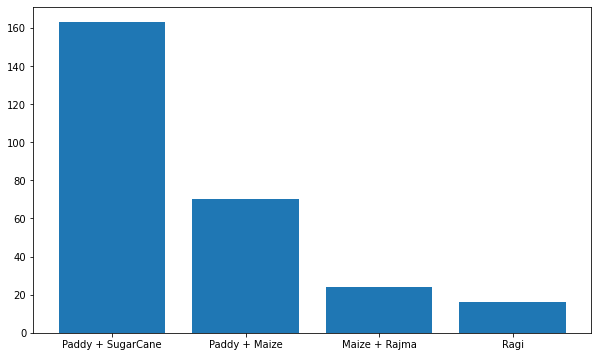

In [15]:
df['Crop'] = df['Crop'].replace(['Sugarcane ', 'Sugarcane', 'suger cane ', 'SUGER CANE '], 'SugarCane')
df['Crop'] = df['Crop'].replace(['Paddy/ Sugarcane'], 'Paddy + SugarCane')
df['Crop'] = df['Crop'].replace(['Paddy', 'paddy'], 'Paddy')
df['Crop'] = df['Crop'].replace(['Maize/Rajma', 'Rajma/Maize'], 'Maize + Rajma')
df['Crop'] = df['Crop'].replace(['Maize/Paddy/Rajma', 'Paddy/Maize/G.N', 'Maize', 'Paddy/Maize'], 'Paddy + Maize')
df['Crop'] = df['Crop'].replace(['Paddy + SugarCane', 'Paddy', 'SugarCane'], 'Paddy + SugarCane')
df['Crop'] = df['Crop'].replace('Ragi/Niger', 'Ragi')
df = df[(df['Crop'] != 'Groundnut') & (df['Crop'] != 'Turmeric')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,ARVI
pH,1.000000,0.480688,-0.333383,0.212552,0.120609,0.635819,0.665875,0.375249,-0.112625,0.564074,-0.461003,-0.302912,-0.632308,-0.193250
EC,0.480688,1.000000,-0.113811,0.189278,0.579347,0.304698,0.353923,0.905148,0.032202,0.542661,-0.160148,-0.055957,-0.275806,-0.117029
OC,-0.333383,-0.113811,1.000000,-0.003450,0.216241,0.027773,-0.158163,-0.107069,0.541595,-0.030128,0.351817,0.446556,0.573010,0.124164
P,0.212552,0.189278,-0.003450,1.000000,0.172696,0.205397,0.283987,0.143692,0.492402,0.210786,0.100140,0.104467,-0.227438,0.171727
K,0.120609,0.579347,0.216241,0.172696,1.000000,0.062876,0.058264,0.468951,0.245236,0.173017,-0.063486,0.017689,0.071308,-0.061264
Ca,0.635819,0.304698,0.027773,0.205397,0.062876,1.000000,0.806148,0.252167,0.005950,0.509460,-0.149374,0.107125,-0.313804,-0.012516
Mg,0.665875,0.353923,-0.158163,0.283987,0.058264,0.806148,1.000000,0.270701,-0.056657,0.590767,-0.130534,0.116103,-0.424087,-0.009273
S,0.375249,0.905148,-0.107069,0.143692,0.468951,0.252167,0.270701,1.000000,-0.007399,0.531710,-0.096959,0.005405,-0.218240,-0.078334
Zn,-0.112625,0.032202,0.541595,0.492402,0.245236,0.005950,-0.056657,-0.007399,1.000000,-0.009086,0.416219,0.408112,0.287436,0.198637
B,0.564074,0.542661,-0.030128,0.210786,0.173017,0.509460,0.590767,0.531710,-0.009086,1.000000,-0.149671,0.054915,-0.319448,-0.167903


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Cu', 'Mn']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'Fe', 'ARVI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Fe      ARVI  Black Sandy Soil  Black Soil  \
3469  8.32  0.39  0.71  8.15  3.44  0.064874                 0           1   

      Red Sandy Soil  Red Soil  
3469               0         0  
3469    Paddy + SugarCane
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:6] = sc1.fit_transform(X[:, 0:6])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8695652173913043


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 83.83 %
Standard Deviation: 7.65 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.855072463768116


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.38 %
Standard Deviation: 7.67 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.927536231884058


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 85.81 %
Standard Deviation: 7.12 %


In [36]:
# pickle.dump(clf3, open('Visakhapatnam_model.pkl', 'wb'))
# pickle.dump(sc1, open('Visakhapatnam_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.9130434782608695


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 87.31 %
Standard Deviation: 6.49 %


In [42]:
# pickle.dump(clf4, open('Visakhapatnam_model.pkl', 'wb'))
# pickle.dump(sc1, open('Visakhapatnam_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [43]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [44]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [45]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.8921568627450981
Testing Accuracy:  0.8695652173913043


In [46]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.45 %
Standard Deviation: 8.78 %


# Catboost

In [47]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.8371259	total: 142ms	remaining: 14.1s
1:	learn: 0.5816425	total: 143ms	remaining: 7.01s
2:	learn: 0.5491271	total: 144ms	remaining: 4.65s
3:	learn: 0.4980033	total: 144ms	remaining: 3.46s
4:	learn: 0.4462676	total: 145ms	remaining: 2.75s
5:	learn: 0.4431873	total: 145ms	remaining: 2.27s
6:	learn: 0.4060387	total: 146ms	remaining: 1.94s
7:	learn: 0.3821505	total: 146ms	remaining: 1.68s
8:	learn: 0.3510022	total: 147ms	remaining: 1.48s
9:	learn: 0.3237944	total: 147ms	remaining: 1.32s
10:	learn: 0.3197858	total: 148ms	remaining: 1.2s
11:	learn: 0.3073135	total: 148ms	remaining: 1.09s
12:	learn: 0.2688481	total: 149ms	remaining: 996ms
13:	learn: 0.2607954	total: 149ms	remaining: 918ms
14:	learn: 0.2520149	total: 150ms	remaining: 849ms
15:	learn: 0.2461069	total: 150ms	remaining: 789ms
16:	learn: 0.2426646	total: 151ms	remaining: 736ms
17:	learn: 0.2363155	total: 151ms	remaining: 689ms
18:	learn: 0.2313848	total: 152ms	remaining: 647ms
19:	learn: 0.2208255	total: 152ms	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.6497713848
bestIteration = 99

Training on fold [1/5]

bestTest = 0.6590126758
bestIteration = 99

Training on fold [2/5]

bestTest = 0.643110902
bestIteration = 99

Training on fold [3/5]

bestTest = 0.5404066664
bestIteration = 99

Training on fold [4/5]

bestTest = 0.5629654479
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3555613	test: 1.3595440	best: 1.3595440 (0)	total: 1.63ms	remaining: 1.63s
1:	learn: 1.3156724	test: 1.3285669	best: 1.3285669 (1)	total: 2.85ms	remaining: 1.42s
2:	learn: 1.2851001	test: 1.3037188	best: 1.3037188 (2)	total: 3.83ms	remaining: 1.27s
3:	learn: 1.2523581	test: 1.2764050	best: 1.2764050 (3)	total: 4.74ms	remaining: 1.18s
4:	learn: 1.2265315	test: 1.2571294	best: 1.2571294 (4)	total: 5.65ms	remaining: 1.12s
5:	learn: 1.1995341	test: 1.2407522	best: 1.2407522 (5)	total: 6.6ms	remaining: 1.09s
6:	learn: 1.1743320	test: 1.2184884	best: 1.2184884 (6)	total: 7.57ms	remaining: 1.07s
7:	learn: 1.1527015	test: 1.2018951	best: 1.2018951 (7)	total: 8.52ms	remaining: 1.06s
8:	learn: 1.1269740	test: 1.1788951	best: 1.1788951 (8)	total: 9.48ms	remaining: 1.04s
9:	learn: 1.1027366	test: 1.1599512	best: 1.1599512 (9)	total: 10.4ms	remaining: 1.03s
10:	learn: 1.0800060	test: 1.1413925	best: 1.1413925 (10)	total: 11.3ms	remaining: 1.02s
11:	learn: 1.0593182	test: 1.1260105	best:

154:	learn: 0.3033231	test: 0.6643559	best: 0.6643559 (154)	total: 158ms	remaining: 862ms
155:	learn: 0.3016573	test: 0.6649734	best: 0.6643559 (154)	total: 159ms	remaining: 862ms
156:	learn: 0.3005164	test: 0.6645815	best: 0.6643559 (154)	total: 160ms	remaining: 862ms
157:	learn: 0.2989163	test: 0.6638817	best: 0.6638817 (157)	total: 162ms	remaining: 861ms
158:	learn: 0.2981785	test: 0.6644121	best: 0.6638817 (157)	total: 163ms	remaining: 860ms
159:	learn: 0.2966270	test: 0.6648901	best: 0.6638817 (157)	total: 164ms	remaining: 859ms
160:	learn: 0.2951007	test: 0.6648215	best: 0.6638817 (157)	total: 165ms	remaining: 858ms
161:	learn: 0.2936555	test: 0.6639313	best: 0.6638817 (157)	total: 166ms	remaining: 857ms
162:	learn: 0.2927262	test: 0.6644433	best: 0.6638817 (157)	total: 167ms	remaining: 857ms
163:	learn: 0.2919251	test: 0.6644993	best: 0.6638817 (157)	total: 168ms	remaining: 856ms
164:	learn: 0.2909514	test: 0.6634076	best: 0.6634076 (164)	total: 169ms	remaining: 855ms
165:	learn

322:	learn: 0.1549964	test: 0.6259649	best: 0.6259649 (322)	total: 332ms	remaining: 696ms
323:	learn: 0.1542124	test: 0.6266757	best: 0.6259649 (322)	total: 334ms	remaining: 698ms
324:	learn: 0.1536606	test: 0.6270541	best: 0.6259649 (322)	total: 337ms	remaining: 699ms
325:	learn: 0.1534688	test: 0.6268731	best: 0.6259649 (322)	total: 338ms	remaining: 698ms
326:	learn: 0.1530129	test: 0.6273623	best: 0.6259649 (322)	total: 339ms	remaining: 698ms
327:	learn: 0.1525972	test: 0.6275738	best: 0.6259649 (322)	total: 340ms	remaining: 697ms
328:	learn: 0.1521058	test: 0.6271993	best: 0.6259649 (322)	total: 341ms	remaining: 696ms
329:	learn: 0.1516561	test: 0.6276827	best: 0.6259649 (322)	total: 342ms	remaining: 695ms
330:	learn: 0.1511391	test: 0.6282183	best: 0.6259649 (322)	total: 344ms	remaining: 694ms
331:	learn: 0.1506463	test: 0.6287928	best: 0.6259649 (322)	total: 345ms	remaining: 693ms
332:	learn: 0.1502961	test: 0.6281161	best: 0.6259649 (322)	total: 346ms	remaining: 692ms
333:	learn

483:	learn: 0.0997026	test: 0.6197792	best: 0.6180739 (436)	total: 501ms	remaining: 534ms
484:	learn: 0.0995328	test: 0.6198825	best: 0.6180739 (436)	total: 502ms	remaining: 533ms
485:	learn: 0.0993328	test: 0.6194787	best: 0.6180739 (436)	total: 503ms	remaining: 532ms
486:	learn: 0.0991464	test: 0.6191123	best: 0.6180739 (436)	total: 505ms	remaining: 532ms
487:	learn: 0.0989168	test: 0.6197603	best: 0.6180739 (436)	total: 506ms	remaining: 531ms
488:	learn: 0.0987340	test: 0.6192015	best: 0.6180739 (436)	total: 507ms	remaining: 530ms
489:	learn: 0.0983786	test: 0.6195435	best: 0.6180739 (436)	total: 508ms	remaining: 529ms
490:	learn: 0.0980936	test: 0.6191385	best: 0.6180739 (436)	total: 509ms	remaining: 528ms
491:	learn: 0.0978897	test: 0.6197241	best: 0.6180739 (436)	total: 510ms	remaining: 527ms
492:	learn: 0.0976237	test: 0.6199345	best: 0.6180739 (436)	total: 511ms	remaining: 526ms
493:	learn: 0.0974340	test: 0.6196343	best: 0.6180739 (436)	total: 512ms	remaining: 525ms
494:	learn

648:	learn: 0.0711476	test: 0.6320711	best: 0.6180739 (436)	total: 672ms	remaining: 363ms
649:	learn: 0.0710050	test: 0.6323404	best: 0.6180739 (436)	total: 673ms	remaining: 362ms
650:	learn: 0.0708737	test: 0.6325872	best: 0.6180739 (436)	total: 674ms	remaining: 361ms
651:	learn: 0.0707590	test: 0.6323371	best: 0.6180739 (436)	total: 675ms	remaining: 360ms
652:	learn: 0.0705665	test: 0.6322461	best: 0.6180739 (436)	total: 676ms	remaining: 359ms
653:	learn: 0.0703488	test: 0.6325801	best: 0.6180739 (436)	total: 677ms	remaining: 358ms
654:	learn: 0.0700855	test: 0.6325487	best: 0.6180739 (436)	total: 678ms	remaining: 357ms
655:	learn: 0.0699234	test: 0.6326172	best: 0.6180739 (436)	total: 679ms	remaining: 356ms
656:	learn: 0.0697671	test: 0.6324991	best: 0.6180739 (436)	total: 680ms	remaining: 355ms
657:	learn: 0.0696611	test: 0.6321334	best: 0.6180739 (436)	total: 682ms	remaining: 354ms
658:	learn: 0.0695384	test: 0.6323671	best: 0.6180739 (436)	total: 682ms	remaining: 353ms
659:	learn

810:	learn: 0.0539468	test: 0.6351735	best: 0.6180739 (436)	total: 844ms	remaining: 197ms
811:	learn: 0.0538579	test: 0.6353003	best: 0.6180739 (436)	total: 845ms	remaining: 196ms
812:	learn: 0.0537913	test: 0.6353338	best: 0.6180739 (436)	total: 846ms	remaining: 195ms
813:	learn: 0.0536911	test: 0.6354811	best: 0.6180739 (436)	total: 848ms	remaining: 194ms
814:	learn: 0.0535903	test: 0.6355120	best: 0.6180739 (436)	total: 849ms	remaining: 193ms
815:	learn: 0.0534694	test: 0.6355480	best: 0.6180739 (436)	total: 850ms	remaining: 192ms
816:	learn: 0.0533496	test: 0.6354625	best: 0.6180739 (436)	total: 851ms	remaining: 191ms
817:	learn: 0.0532815	test: 0.6356100	best: 0.6180739 (436)	total: 852ms	remaining: 190ms
818:	learn: 0.0532353	test: 0.6354409	best: 0.6180739 (436)	total: 853ms	remaining: 189ms
819:	learn: 0.0531735	test: 0.6355944	best: 0.6180739 (436)	total: 854ms	remaining: 188ms
820:	learn: 0.0530458	test: 0.6354718	best: 0.6180739 (436)	total: 855ms	remaining: 187ms
821:	learn

969:	learn: 0.0431203	test: 0.6429075	best: 0.6180739 (436)	total: 1.01s	remaining: 31.4ms
970:	learn: 0.0430616	test: 0.6430243	best: 0.6180739 (436)	total: 1.01s	remaining: 30.3ms
971:	learn: 0.0430180	test: 0.6432736	best: 0.6180739 (436)	total: 1.02s	remaining: 29.3ms
972:	learn: 0.0429277	test: 0.6431140	best: 0.6180739 (436)	total: 1.02s	remaining: 28.2ms
973:	learn: 0.0428765	test: 0.6429072	best: 0.6180739 (436)	total: 1.02s	remaining: 27.2ms
974:	learn: 0.0428156	test: 0.6428735	best: 0.6180739 (436)	total: 1.02s	remaining: 26.1ms
975:	learn: 0.0427346	test: 0.6428406	best: 0.6180739 (436)	total: 1.02s	remaining: 25.1ms
976:	learn: 0.0426880	test: 0.6428839	best: 0.6180739 (436)	total: 1.02s	remaining: 24ms
977:	learn: 0.0426446	test: 0.6428168	best: 0.6180739 (436)	total: 1.02s	remaining: 23ms
978:	learn: 0.0425887	test: 0.6430762	best: 0.6180739 (436)	total: 1.02s	remaining: 22ms
979:	learn: 0.0425478	test: 0.6430988	best: 0.6180739 (436)	total: 1.02s	remaining: 20.9ms
980:	

137:	learn: 0.1039110	test: 0.6325967	best: 0.6288206 (105)	total: 136ms	remaining: 851ms
138:	learn: 0.1031695	test: 0.6333219	best: 0.6288206 (105)	total: 138ms	remaining: 853ms
139:	learn: 0.1026168	test: 0.6329975	best: 0.6288206 (105)	total: 139ms	remaining: 852ms
140:	learn: 0.1017357	test: 0.6334296	best: 0.6288206 (105)	total: 140ms	remaining: 851ms
141:	learn: 0.1009391	test: 0.6342345	best: 0.6288206 (105)	total: 141ms	remaining: 850ms
142:	learn: 0.1001645	test: 0.6353866	best: 0.6288206 (105)	total: 142ms	remaining: 849ms
143:	learn: 0.0995942	test: 0.6346254	best: 0.6288206 (105)	total: 143ms	remaining: 848ms
144:	learn: 0.0988406	test: 0.6361903	best: 0.6288206 (105)	total: 144ms	remaining: 847ms
145:	learn: 0.0978396	test: 0.6369947	best: 0.6288206 (105)	total: 145ms	remaining: 846ms
146:	learn: 0.0966259	test: 0.6356013	best: 0.6288206 (105)	total: 145ms	remaining: 844ms
147:	learn: 0.0958341	test: 0.6368098	best: 0.6288206 (105)	total: 146ms	remaining: 843ms
148:	learn

310:	learn: 0.0384027	test: 0.6726111	best: 0.6288206 (105)	total: 307ms	remaining: 679ms
311:	learn: 0.0382141	test: 0.6735831	best: 0.6288206 (105)	total: 308ms	remaining: 679ms
312:	learn: 0.0380593	test: 0.6738243	best: 0.6288206 (105)	total: 309ms	remaining: 678ms
313:	learn: 0.0378783	test: 0.6736510	best: 0.6288206 (105)	total: 311ms	remaining: 678ms
314:	learn: 0.0377311	test: 0.6741565	best: 0.6288206 (105)	total: 312ms	remaining: 678ms
315:	learn: 0.0375025	test: 0.6742969	best: 0.6288206 (105)	total: 313ms	remaining: 677ms
316:	learn: 0.0372854	test: 0.6733581	best: 0.6288206 (105)	total: 314ms	remaining: 676ms
317:	learn: 0.0371592	test: 0.6736165	best: 0.6288206 (105)	total: 315ms	remaining: 675ms
318:	learn: 0.0370259	test: 0.6737091	best: 0.6288206 (105)	total: 316ms	remaining: 674ms
319:	learn: 0.0368199	test: 0.6743541	best: 0.6288206 (105)	total: 317ms	remaining: 673ms
320:	learn: 0.0366597	test: 0.6737986	best: 0.6288206 (105)	total: 318ms	remaining: 672ms
321:	learn

470:	learn: 0.0227121	test: 0.7016397	best: 0.6288206 (105)	total: 479ms	remaining: 538ms
471:	learn: 0.0226486	test: 0.7021405	best: 0.6288206 (105)	total: 480ms	remaining: 537ms
472:	learn: 0.0225342	test: 0.7020124	best: 0.6288206 (105)	total: 481ms	remaining: 536ms
473:	learn: 0.0224105	test: 0.7023823	best: 0.6288206 (105)	total: 482ms	remaining: 535ms
474:	learn: 0.0223717	test: 0.7025370	best: 0.6288206 (105)	total: 483ms	remaining: 534ms
475:	learn: 0.0222527	test: 0.7030474	best: 0.6288206 (105)	total: 484ms	remaining: 533ms
476:	learn: 0.0221527	test: 0.7032512	best: 0.6288206 (105)	total: 485ms	remaining: 532ms
477:	learn: 0.0220867	test: 0.7033331	best: 0.6288206 (105)	total: 486ms	remaining: 531ms
478:	learn: 0.0219690	test: 0.7033961	best: 0.6288206 (105)	total: 487ms	remaining: 530ms
479:	learn: 0.0219267	test: 0.7036668	best: 0.6288206 (105)	total: 488ms	remaining: 529ms
480:	learn: 0.0218909	test: 0.7037238	best: 0.6288206 (105)	total: 489ms	remaining: 528ms
481:	learn

652:	learn: 0.0152016	test: 0.7265741	best: 0.6288206 (105)	total: 653ms	remaining: 347ms
653:	learn: 0.0151516	test: 0.7269244	best: 0.6288206 (105)	total: 654ms	remaining: 346ms
654:	learn: 0.0151303	test: 0.7270938	best: 0.6288206 (105)	total: 655ms	remaining: 345ms
655:	learn: 0.0151016	test: 0.7270949	best: 0.6288206 (105)	total: 656ms	remaining: 344ms
656:	learn: 0.0150894	test: 0.7274298	best: 0.6288206 (105)	total: 657ms	remaining: 343ms
657:	learn: 0.0150631	test: 0.7269210	best: 0.6288206 (105)	total: 658ms	remaining: 342ms
658:	learn: 0.0150258	test: 0.7270678	best: 0.6288206 (105)	total: 659ms	remaining: 341ms
659:	learn: 0.0150067	test: 0.7273138	best: 0.6288206 (105)	total: 660ms	remaining: 340ms
660:	learn: 0.0149893	test: 0.7275233	best: 0.6288206 (105)	total: 661ms	remaining: 339ms
661:	learn: 0.0149675	test: 0.7276396	best: 0.6288206 (105)	total: 661ms	remaining: 338ms
662:	learn: 0.0149325	test: 0.7274209	best: 0.6288206 (105)	total: 662ms	remaining: 337ms
663:	learn

822:	learn: 0.0116166	test: 0.7415642	best: 0.6288206 (105)	total: 821ms	remaining: 177ms
823:	learn: 0.0115903	test: 0.7414288	best: 0.6288206 (105)	total: 822ms	remaining: 176ms
824:	learn: 0.0115796	test: 0.7416774	best: 0.6288206 (105)	total: 823ms	remaining: 175ms
825:	learn: 0.0115639	test: 0.7415795	best: 0.6288206 (105)	total: 824ms	remaining: 174ms
826:	learn: 0.0115546	test: 0.7417542	best: 0.6288206 (105)	total: 825ms	remaining: 173ms
827:	learn: 0.0115398	test: 0.7420309	best: 0.6288206 (105)	total: 826ms	remaining: 172ms
828:	learn: 0.0115293	test: 0.7422892	best: 0.6288206 (105)	total: 827ms	remaining: 171ms
829:	learn: 0.0115056	test: 0.7426727	best: 0.6288206 (105)	total: 828ms	remaining: 170ms
830:	learn: 0.0114865	test: 0.7430262	best: 0.6288206 (105)	total: 829ms	remaining: 169ms
831:	learn: 0.0114611	test: 0.7431242	best: 0.6288206 (105)	total: 830ms	remaining: 168ms
832:	learn: 0.0114317	test: 0.7430623	best: 0.6288206 (105)	total: 831ms	remaining: 167ms
833:	learn

1:	learn: 1.3236862	test: 1.3364237	best: 1.3364237 (1)	total: 11.3ms	remaining: 5.66s
2:	learn: 1.2956427	test: 1.3176715	best: 1.3176715 (2)	total: 14ms	remaining: 4.65s
3:	learn: 1.2619912	test: 1.2964440	best: 1.2964440 (3)	total: 16.3ms	remaining: 4.06s
4:	learn: 1.2343771	test: 1.2738447	best: 1.2738447 (4)	total: 18.5ms	remaining: 3.67s
5:	learn: 1.2067623	test: 1.2488053	best: 1.2488053 (5)	total: 20.6ms	remaining: 3.42s
6:	learn: 1.1844335	test: 1.2301132	best: 1.2301132 (6)	total: 22.9ms	remaining: 3.25s
7:	learn: 1.1614045	test: 1.2115981	best: 1.2115981 (7)	total: 25.4ms	remaining: 3.15s
8:	learn: 1.1343531	test: 1.1924049	best: 1.1924049 (8)	total: 27.8ms	remaining: 3.06s
9:	learn: 1.1089819	test: 1.1711773	best: 1.1711773 (9)	total: 30.2ms	remaining: 2.99s
10:	learn: 1.0838609	test: 1.1504782	best: 1.1504782 (10)	total: 33.3ms	remaining: 3s
11:	learn: 1.0632399	test: 1.1365813	best: 1.1365813 (11)	total: 35.6ms	remaining: 2.93s
12:	learn: 1.0423216	test: 1.1227781	best: 1

146:	learn: 0.2848648	test: 0.6431241	best: 0.6428735 (145)	total: 356ms	remaining: 2.07s
147:	learn: 0.2829556	test: 0.6426868	best: 0.6426868 (147)	total: 359ms	remaining: 2.07s
148:	learn: 0.2812636	test: 0.6415713	best: 0.6415713 (148)	total: 362ms	remaining: 2.06s
149:	learn: 0.2793612	test: 0.6412521	best: 0.6412521 (149)	total: 364ms	remaining: 2.06s
150:	learn: 0.2779577	test: 0.6407738	best: 0.6407738 (150)	total: 366ms	remaining: 2.06s
151:	learn: 0.2763776	test: 0.6398581	best: 0.6398581 (151)	total: 369ms	remaining: 2.06s
152:	learn: 0.2748324	test: 0.6386996	best: 0.6386996 (152)	total: 371ms	remaining: 2.05s
153:	learn: 0.2733642	test: 0.6376111	best: 0.6376111 (153)	total: 374ms	remaining: 2.05s
154:	learn: 0.2720081	test: 0.6377811	best: 0.6376111 (153)	total: 377ms	remaining: 2.05s
155:	learn: 0.2707480	test: 0.6373953	best: 0.6373953 (155)	total: 379ms	remaining: 2.05s
156:	learn: 0.2694539	test: 0.6367649	best: 0.6367649 (156)	total: 381ms	remaining: 2.05s
157:	learn

300:	learn: 0.1287868	test: 0.5946773	best: 0.5946037 (298)	total: 717ms	remaining: 1.66s
301:	learn: 0.1281671	test: 0.5941191	best: 0.5941191 (301)	total: 720ms	remaining: 1.66s
302:	learn: 0.1276618	test: 0.5939899	best: 0.5939899 (302)	total: 722ms	remaining: 1.66s
303:	learn: 0.1270971	test: 0.5935827	best: 0.5935827 (303)	total: 724ms	remaining: 1.66s
304:	learn: 0.1264546	test: 0.5930294	best: 0.5930294 (304)	total: 727ms	remaining: 1.66s
305:	learn: 0.1257470	test: 0.5926028	best: 0.5926028 (305)	total: 730ms	remaining: 1.65s
306:	learn: 0.1252488	test: 0.5925097	best: 0.5925097 (306)	total: 732ms	remaining: 1.65s
307:	learn: 0.1246884	test: 0.5929993	best: 0.5925097 (306)	total: 735ms	remaining: 1.65s
308:	learn: 0.1241062	test: 0.5932589	best: 0.5925097 (306)	total: 739ms	remaining: 1.65s
309:	learn: 0.1235005	test: 0.5929861	best: 0.5925097 (306)	total: 742ms	remaining: 1.65s
310:	learn: 0.1229068	test: 0.5933465	best: 0.5925097 (306)	total: 744ms	remaining: 1.65s
311:	learn

451:	learn: 0.0763497	test: 0.5845292	best: 0.5834089 (421)	total: 1.08s	remaining: 1.31s
452:	learn: 0.0761358	test: 0.5849848	best: 0.5834089 (421)	total: 1.08s	remaining: 1.31s
453:	learn: 0.0758912	test: 0.5847900	best: 0.5834089 (421)	total: 1.08s	remaining: 1.3s
454:	learn: 0.0756495	test: 0.5850725	best: 0.5834089 (421)	total: 1.09s	remaining: 1.3s
455:	learn: 0.0754081	test: 0.5851671	best: 0.5834089 (421)	total: 1.09s	remaining: 1.3s
456:	learn: 0.0752093	test: 0.5848793	best: 0.5834089 (421)	total: 1.09s	remaining: 1.3s
457:	learn: 0.0750229	test: 0.5849717	best: 0.5834089 (421)	total: 1.09s	remaining: 1.3s
458:	learn: 0.0748149	test: 0.5851113	best: 0.5834089 (421)	total: 1.1s	remaining: 1.29s
459:	learn: 0.0746154	test: 0.5853054	best: 0.5834089 (421)	total: 1.1s	remaining: 1.29s
460:	learn: 0.0744082	test: 0.5854547	best: 0.5834089 (421)	total: 1.1s	remaining: 1.29s
461:	learn: 0.0742419	test: 0.5854852	best: 0.5834089 (421)	total: 1.11s	remaining: 1.29s
462:	learn: 0.0740

595:	learn: 0.0536711	test: 0.5882615	best: 0.5834089 (421)	total: 1.43s	remaining: 968ms
596:	learn: 0.0535828	test: 0.5883709	best: 0.5834089 (421)	total: 1.43s	remaining: 966ms
597:	learn: 0.0534495	test: 0.5886616	best: 0.5834089 (421)	total: 1.43s	remaining: 964ms
598:	learn: 0.0533507	test: 0.5887468	best: 0.5834089 (421)	total: 1.44s	remaining: 961ms
599:	learn: 0.0531858	test: 0.5884457	best: 0.5834089 (421)	total: 1.44s	remaining: 959ms
600:	learn: 0.0530685	test: 0.5884240	best: 0.5834089 (421)	total: 1.44s	remaining: 957ms
601:	learn: 0.0529599	test: 0.5888426	best: 0.5834089 (421)	total: 1.44s	remaining: 954ms
602:	learn: 0.0528668	test: 0.5889840	best: 0.5834089 (421)	total: 1.45s	remaining: 952ms
603:	learn: 0.0527580	test: 0.5889957	best: 0.5834089 (421)	total: 1.45s	remaining: 950ms
604:	learn: 0.0526585	test: 0.5892248	best: 0.5834089 (421)	total: 1.45s	remaining: 948ms
605:	learn: 0.0525305	test: 0.5889575	best: 0.5834089 (421)	total: 1.45s	remaining: 945ms
606:	learn

750:	learn: 0.0399872	test: 0.5931679	best: 0.5834089 (421)	total: 1.79s	remaining: 594ms
751:	learn: 0.0399222	test: 0.5933445	best: 0.5834089 (421)	total: 1.79s	remaining: 592ms
752:	learn: 0.0398656	test: 0.5934755	best: 0.5834089 (421)	total: 1.8s	remaining: 590ms
753:	learn: 0.0397982	test: 0.5935355	best: 0.5834089 (421)	total: 1.8s	remaining: 587ms
754:	learn: 0.0397399	test: 0.5936385	best: 0.5834089 (421)	total: 1.8s	remaining: 585ms
755:	learn: 0.0396831	test: 0.5935115	best: 0.5834089 (421)	total: 1.8s	remaining: 583ms
756:	learn: 0.0396103	test: 0.5935209	best: 0.5834089 (421)	total: 1.81s	remaining: 580ms
757:	learn: 0.0395210	test: 0.5936506	best: 0.5834089 (421)	total: 1.81s	remaining: 578ms
758:	learn: 0.0394534	test: 0.5936010	best: 0.5834089 (421)	total: 1.81s	remaining: 576ms
759:	learn: 0.0393758	test: 0.5935865	best: 0.5834089 (421)	total: 1.81s	remaining: 573ms
760:	learn: 0.0393190	test: 0.5938156	best: 0.5834089 (421)	total: 1.82s	remaining: 571ms
761:	learn: 0.

898:	learn: 0.0318609	test: 0.6009998	best: 0.5834089 (421)	total: 2.14s	remaining: 241ms
899:	learn: 0.0318151	test: 0.6010172	best: 0.5834089 (421)	total: 2.14s	remaining: 238ms
900:	learn: 0.0317727	test: 0.6009176	best: 0.5834089 (421)	total: 2.15s	remaining: 236ms
901:	learn: 0.0317199	test: 0.6008572	best: 0.5834089 (421)	total: 2.15s	remaining: 234ms
902:	learn: 0.0316806	test: 0.6008759	best: 0.5834089 (421)	total: 2.15s	remaining: 231ms
903:	learn: 0.0316362	test: 0.6010279	best: 0.5834089 (421)	total: 2.15s	remaining: 229ms
904:	learn: 0.0315868	test: 0.6011527	best: 0.5834089 (421)	total: 2.16s	remaining: 226ms
905:	learn: 0.0315427	test: 0.6013854	best: 0.5834089 (421)	total: 2.16s	remaining: 224ms
906:	learn: 0.0315016	test: 0.6012997	best: 0.5834089 (421)	total: 2.16s	remaining: 222ms
907:	learn: 0.0314591	test: 0.6013942	best: 0.5834089 (421)	total: 2.17s	remaining: 219ms
908:	learn: 0.0314157	test: 0.6015605	best: 0.5834089 (421)	total: 2.17s	remaining: 217ms
909:	learn

52:	learn: 0.2384717	test: 0.6498008	best: 0.6498008 (52)	total: 119ms	remaining: 2.13s
53:	learn: 0.2341245	test: 0.6490688	best: 0.6490688 (53)	total: 122ms	remaining: 2.14s
54:	learn: 0.2294342	test: 0.6455183	best: 0.6455183 (54)	total: 124ms	remaining: 2.14s
55:	learn: 0.2257325	test: 0.6435953	best: 0.6435953 (55)	total: 127ms	remaining: 2.14s
56:	learn: 0.2215471	test: 0.6423182	best: 0.6423182 (56)	total: 129ms	remaining: 2.14s
57:	learn: 0.2175151	test: 0.6376884	best: 0.6376884 (57)	total: 132ms	remaining: 2.14s
58:	learn: 0.2135401	test: 0.6399395	best: 0.6376884 (57)	total: 134ms	remaining: 2.14s
59:	learn: 0.2087033	test: 0.6361724	best: 0.6361724 (59)	total: 137ms	remaining: 2.14s
60:	learn: 0.2047862	test: 0.6356952	best: 0.6356952 (60)	total: 140ms	remaining: 2.15s
61:	learn: 0.2005790	test: 0.6344669	best: 0.6344669 (61)	total: 142ms	remaining: 2.15s
62:	learn: 0.1975210	test: 0.6332747	best: 0.6332747 (62)	total: 144ms	remaining: 2.15s
63:	learn: 0.1941971	test: 0.631

200:	learn: 0.0458172	test: 0.6047196	best: 0.5975713 (119)	total: 467ms	remaining: 1.86s
201:	learn: 0.0454358	test: 0.6045816	best: 0.5975713 (119)	total: 470ms	remaining: 1.86s
202:	learn: 0.0451118	test: 0.6048282	best: 0.5975713 (119)	total: 473ms	remaining: 1.86s
203:	learn: 0.0447490	test: 0.6045380	best: 0.5975713 (119)	total: 475ms	remaining: 1.85s
204:	learn: 0.0445133	test: 0.6043439	best: 0.5975713 (119)	total: 478ms	remaining: 1.85s
205:	learn: 0.0441711	test: 0.6054909	best: 0.5975713 (119)	total: 480ms	remaining: 1.85s
206:	learn: 0.0440007	test: 0.6057199	best: 0.5975713 (119)	total: 483ms	remaining: 1.85s
207:	learn: 0.0436159	test: 0.6066059	best: 0.5975713 (119)	total: 485ms	remaining: 1.85s
208:	learn: 0.0433470	test: 0.6074589	best: 0.5975713 (119)	total: 488ms	remaining: 1.85s
209:	learn: 0.0430813	test: 0.6076002	best: 0.5975713 (119)	total: 491ms	remaining: 1.84s
210:	learn: 0.0427650	test: 0.6078108	best: 0.5975713 (119)	total: 493ms	remaining: 1.84s
211:	learn

353:	learn: 0.0221482	test: 0.6292705	best: 0.5975713 (119)	total: 831ms	remaining: 1.52s
354:	learn: 0.0220908	test: 0.6293521	best: 0.5975713 (119)	total: 834ms	remaining: 1.51s
355:	learn: 0.0219856	test: 0.6294047	best: 0.5975713 (119)	total: 837ms	remaining: 1.51s
356:	learn: 0.0219397	test: 0.6296025	best: 0.5975713 (119)	total: 839ms	remaining: 1.51s
357:	learn: 0.0218652	test: 0.6293698	best: 0.5975713 (119)	total: 842ms	remaining: 1.51s
358:	learn: 0.0217738	test: 0.6294132	best: 0.5975713 (119)	total: 844ms	remaining: 1.51s
359:	learn: 0.0216947	test: 0.6292029	best: 0.5975713 (119)	total: 846ms	remaining: 1.5s
360:	learn: 0.0216150	test: 0.6293793	best: 0.5975713 (119)	total: 849ms	remaining: 1.5s
361:	learn: 0.0215682	test: 0.6294694	best: 0.5975713 (119)	total: 852ms	remaining: 1.5s
362:	learn: 0.0214847	test: 0.6291955	best: 0.5975713 (119)	total: 854ms	remaining: 1.5s
363:	learn: 0.0214255	test: 0.6289130	best: 0.5975713 (119)	total: 857ms	remaining: 1.5s
364:	learn: 0.0

502:	learn: 0.0143601	test: 0.6502055	best: 0.5975713 (119)	total: 1.18s	remaining: 1.17s
503:	learn: 0.0143285	test: 0.6501340	best: 0.5975713 (119)	total: 1.19s	remaining: 1.17s
504:	learn: 0.0142929	test: 0.6501583	best: 0.5975713 (119)	total: 1.19s	remaining: 1.16s
505:	learn: 0.0142557	test: 0.6502397	best: 0.5975713 (119)	total: 1.19s	remaining: 1.16s
506:	learn: 0.0142214	test: 0.6508376	best: 0.5975713 (119)	total: 1.19s	remaining: 1.16s
507:	learn: 0.0142056	test: 0.6510236	best: 0.5975713 (119)	total: 1.2s	remaining: 1.16s
508:	learn: 0.0141699	test: 0.6512355	best: 0.5975713 (119)	total: 1.2s	remaining: 1.16s
509:	learn: 0.0141509	test: 0.6513180	best: 0.5975713 (119)	total: 1.2s	remaining: 1.15s
510:	learn: 0.0141241	test: 0.6512526	best: 0.5975713 (119)	total: 1.2s	remaining: 1.15s
511:	learn: 0.0140751	test: 0.6515181	best: 0.5975713 (119)	total: 1.21s	remaining: 1.15s
512:	learn: 0.0140474	test: 0.6516397	best: 0.5975713 (119)	total: 1.21s	remaining: 1.15s
513:	learn: 0.

655:	learn: 0.0105566	test: 0.6654364	best: 0.5975713 (119)	total: 1.54s	remaining: 810ms
656:	learn: 0.0105339	test: 0.6652565	best: 0.5975713 (119)	total: 1.55s	remaining: 808ms
657:	learn: 0.0105154	test: 0.6653717	best: 0.5975713 (119)	total: 1.55s	remaining: 806ms
658:	learn: 0.0104947	test: 0.6653621	best: 0.5975713 (119)	total: 1.55s	remaining: 804ms
659:	learn: 0.0104795	test: 0.6653948	best: 0.5975713 (119)	total: 1.55s	remaining: 801ms
660:	learn: 0.0104657	test: 0.6655141	best: 0.5975713 (119)	total: 1.56s	remaining: 799ms
661:	learn: 0.0104542	test: 0.6655461	best: 0.5975713 (119)	total: 1.56s	remaining: 797ms
662:	learn: 0.0104314	test: 0.6655661	best: 0.5975713 (119)	total: 1.56s	remaining: 795ms
663:	learn: 0.0104187	test: 0.6658778	best: 0.5975713 (119)	total: 1.57s	remaining: 793ms
664:	learn: 0.0103986	test: 0.6658626	best: 0.5975713 (119)	total: 1.57s	remaining: 791ms
665:	learn: 0.0103828	test: 0.6659897	best: 0.5975713 (119)	total: 1.57s	remaining: 788ms
666:	learn

804:	learn: 0.0082989	test: 0.6783366	best: 0.5975713 (119)	total: 1.9s	remaining: 459ms
805:	learn: 0.0082885	test: 0.6784614	best: 0.5975713 (119)	total: 1.9s	remaining: 457ms
806:	learn: 0.0082778	test: 0.6784633	best: 0.5975713 (119)	total: 1.9s	remaining: 455ms
807:	learn: 0.0082698	test: 0.6783890	best: 0.5975713 (119)	total: 1.9s	remaining: 452ms
808:	learn: 0.0082574	test: 0.6784608	best: 0.5975713 (119)	total: 1.91s	remaining: 450ms
809:	learn: 0.0082447	test: 0.6786299	best: 0.5975713 (119)	total: 1.91s	remaining: 448ms
810:	learn: 0.0082324	test: 0.6788335	best: 0.5975713 (119)	total: 1.91s	remaining: 446ms
811:	learn: 0.0082254	test: 0.6790928	best: 0.5975713 (119)	total: 1.91s	remaining: 443ms
812:	learn: 0.0082115	test: 0.6790307	best: 0.5975713 (119)	total: 1.92s	remaining: 441ms
813:	learn: 0.0082018	test: 0.6790537	best: 0.5975713 (119)	total: 1.92s	remaining: 439ms
814:	learn: 0.0081892	test: 0.6792314	best: 0.5975713 (119)	total: 1.92s	remaining: 436ms
815:	learn: 0.

957:	learn: 0.0068350	test: 0.6894146	best: 0.5975713 (119)	total: 2.26s	remaining: 99ms
958:	learn: 0.0068226	test: 0.6895113	best: 0.5975713 (119)	total: 2.26s	remaining: 96.6ms
959:	learn: 0.0068122	test: 0.6894114	best: 0.5975713 (119)	total: 2.26s	remaining: 94.3ms
960:	learn: 0.0068045	test: 0.6895984	best: 0.5975713 (119)	total: 2.27s	remaining: 91.9ms
961:	learn: 0.0067994	test: 0.6895876	best: 0.5975713 (119)	total: 2.27s	remaining: 89.6ms
962:	learn: 0.0067869	test: 0.6897041	best: 0.5975713 (119)	total: 2.27s	remaining: 87.2ms
963:	learn: 0.0067822	test: 0.6897231	best: 0.5975713 (119)	total: 2.27s	remaining: 84.9ms
964:	learn: 0.0067747	test: 0.6897951	best: 0.5975713 (119)	total: 2.27s	remaining: 82.5ms
965:	learn: 0.0067673	test: 0.6897188	best: 0.5975713 (119)	total: 2.28s	remaining: 80.2ms
966:	learn: 0.0067581	test: 0.6898387	best: 0.5975713 (119)	total: 2.28s	remaining: 77.8ms
967:	learn: 0.0067500	test: 0.6898437	best: 0.5975713 (119)	total: 2.28s	remaining: 75.5ms
9

49:	learn: 0.7046631	test: 0.9081880	best: 0.9081880 (49)	total: 2.1s	remaining: 39.9s
50:	learn: 0.6981977	test: 0.9046151	best: 0.9046151 (50)	total: 2.14s	remaining: 39.9s
51:	learn: 0.6915180	test: 0.9015639	best: 0.9015639 (51)	total: 2.19s	remaining: 40s
52:	learn: 0.6843980	test: 0.8985212	best: 0.8985212 (52)	total: 2.24s	remaining: 40s
53:	learn: 0.6788684	test: 0.8948841	best: 0.8948841 (53)	total: 2.29s	remaining: 40.1s
54:	learn: 0.6726593	test: 0.8908025	best: 0.8908025 (54)	total: 2.33s	remaining: 40.1s
55:	learn: 0.6642139	test: 0.8839488	best: 0.8839488 (55)	total: 2.35s	remaining: 39.6s
56:	learn: 0.6583814	test: 0.8817236	best: 0.8817236 (56)	total: 2.39s	remaining: 39.6s
57:	learn: 0.6534843	test: 0.8787111	best: 0.8787111 (57)	total: 2.44s	remaining: 39.6s
58:	learn: 0.6464343	test: 0.8738505	best: 0.8738505 (58)	total: 2.49s	remaining: 39.7s
59:	learn: 0.6388135	test: 0.8688885	best: 0.8688885 (59)	total: 2.54s	remaining: 39.8s
60:	learn: 0.6311462	test: 0.8635984	

142:	learn: 0.3279109	test: 0.6784853	best: 0.6784853 (142)	total: 6.23s	remaining: 37.3s
143:	learn: 0.3256956	test: 0.6773807	best: 0.6773807 (143)	total: 6.28s	remaining: 37.3s
144:	learn: 0.3233936	test: 0.6755134	best: 0.6755134 (144)	total: 6.32s	remaining: 37.3s
145:	learn: 0.3214286	test: 0.6744516	best: 0.6744516 (145)	total: 6.38s	remaining: 37.3s
146:	learn: 0.3196332	test: 0.6733399	best: 0.6733399 (146)	total: 6.43s	remaining: 37.3s
147:	learn: 0.3179726	test: 0.6722852	best: 0.6722852 (147)	total: 6.49s	remaining: 37.3s
148:	learn: 0.3162237	test: 0.6715017	best: 0.6715017 (148)	total: 6.53s	remaining: 37.3s
149:	learn: 0.3144354	test: 0.6705426	best: 0.6705426 (149)	total: 6.58s	remaining: 37.3s
150:	learn: 0.3122807	test: 0.6688324	best: 0.6688324 (150)	total: 6.62s	remaining: 37.2s
151:	learn: 0.3104174	test: 0.6675946	best: 0.6675946 (151)	total: 6.67s	remaining: 37.2s
152:	learn: 0.3085352	test: 0.6664396	best: 0.6664396 (152)	total: 6.71s	remaining: 37.1s
153:	learn

235:	learn: 0.1939502	test: 0.6045913	best: 0.6045913 (235)	total: 10.5s	remaining: 34s
236:	learn: 0.1930863	test: 0.6043846	best: 0.6043846 (236)	total: 10.6s	remaining: 34s
237:	learn: 0.1918530	test: 0.6035388	best: 0.6035388 (237)	total: 10.6s	remaining: 33.9s
238:	learn: 0.1909870	test: 0.6029335	best: 0.6029335 (238)	total: 10.6s	remaining: 33.9s
239:	learn: 0.1902397	test: 0.6022887	best: 0.6022887 (239)	total: 10.7s	remaining: 33.8s
240:	learn: 0.1894116	test: 0.6015477	best: 0.6015477 (240)	total: 10.7s	remaining: 33.8s
241:	learn: 0.1886186	test: 0.6009959	best: 0.6009959 (241)	total: 10.8s	remaining: 33.8s
242:	learn: 0.1877875	test: 0.6011734	best: 0.6009959 (241)	total: 10.8s	remaining: 33.8s
243:	learn: 0.1868690	test: 0.6012246	best: 0.6009959 (241)	total: 10.9s	remaining: 33.7s
244:	learn: 0.1856991	test: 0.6005918	best: 0.6005918 (244)	total: 10.9s	remaining: 33.7s
245:	learn: 0.1846656	test: 0.5999519	best: 0.5999519 (245)	total: 11s	remaining: 33.7s
246:	learn: 0.18

330:	learn: 0.1256993	test: 0.5710787	best: 0.5710014 (329)	total: 15s	remaining: 30.3s
331:	learn: 0.1250427	test: 0.5705331	best: 0.5705331 (331)	total: 15.1s	remaining: 30.3s
332:	learn: 0.1244276	test: 0.5698674	best: 0.5698674 (332)	total: 15.1s	remaining: 30.3s
333:	learn: 0.1239718	test: 0.5695972	best: 0.5695972 (333)	total: 15.2s	remaining: 30.2s
334:	learn: 0.1233596	test: 0.5693785	best: 0.5693785 (334)	total: 15.2s	remaining: 30.2s
335:	learn: 0.1229141	test: 0.5693057	best: 0.5693057 (335)	total: 15.2s	remaining: 30.1s
336:	learn: 0.1225189	test: 0.5691109	best: 0.5691109 (336)	total: 15.3s	remaining: 30.1s
337:	learn: 0.1220731	test: 0.5689397	best: 0.5689397 (337)	total: 15.3s	remaining: 30.1s
338:	learn: 0.1216114	test: 0.5687483	best: 0.5687483 (338)	total: 15.4s	remaining: 30s
339:	learn: 0.1211518	test: 0.5685460	best: 0.5685460 (339)	total: 15.4s	remaining: 30s
340:	learn: 0.1207393	test: 0.5684312	best: 0.5684312 (340)	total: 15.5s	remaining: 29.9s
341:	learn: 0.12

423:	learn: 0.0903228	test: 0.5515888	best: 0.5515888 (423)	total: 19.4s	remaining: 26.3s
424:	learn: 0.0899125	test: 0.5513171	best: 0.5513171 (424)	total: 19.4s	remaining: 26.2s
425:	learn: 0.0896471	test: 0.5511826	best: 0.5511826 (425)	total: 19.4s	remaining: 26.2s
426:	learn: 0.0893797	test: 0.5511504	best: 0.5511504 (426)	total: 19.5s	remaining: 26.2s
427:	learn: 0.0890735	test: 0.5511365	best: 0.5511365 (427)	total: 19.5s	remaining: 26.1s
428:	learn: 0.0888000	test: 0.5510700	best: 0.5510700 (428)	total: 19.6s	remaining: 26.1s
429:	learn: 0.0885355	test: 0.5509340	best: 0.5509340 (429)	total: 19.6s	remaining: 26s
430:	learn: 0.0883139	test: 0.5508729	best: 0.5508729 (430)	total: 19.7s	remaining: 26s
431:	learn: 0.0880393	test: 0.5507460	best: 0.5507460 (431)	total: 19.7s	remaining: 25.9s
432:	learn: 0.0877375	test: 0.5505109	best: 0.5505109 (432)	total: 19.8s	remaining: 25.9s
433:	learn: 0.0874615	test: 0.5503377	best: 0.5503377 (433)	total: 19.8s	remaining: 25.9s
434:	learn: 0.

516:	learn: 0.0691035	test: 0.5417549	best: 0.5417549 (516)	total: 23.6s	remaining: 22.1s
517:	learn: 0.0689431	test: 0.5416168	best: 0.5416168 (517)	total: 23.7s	remaining: 22s
518:	learn: 0.0687709	test: 0.5416774	best: 0.5416168 (517)	total: 23.7s	remaining: 22s
519:	learn: 0.0686271	test: 0.5415794	best: 0.5415794 (519)	total: 23.8s	remaining: 22s
520:	learn: 0.0684720	test: 0.5415993	best: 0.5415794 (519)	total: 23.8s	remaining: 21.9s
521:	learn: 0.0682964	test: 0.5415579	best: 0.5415579 (521)	total: 23.9s	remaining: 21.9s
522:	learn: 0.0681621	test: 0.5415986	best: 0.5415579 (521)	total: 23.9s	remaining: 21.8s
523:	learn: 0.0680096	test: 0.5412994	best: 0.5412994 (523)	total: 24s	remaining: 21.8s
524:	learn: 0.0678670	test: 0.5413136	best: 0.5412994 (523)	total: 24s	remaining: 21.7s
525:	learn: 0.0676713	test: 0.5412517	best: 0.5412517 (525)	total: 24.1s	remaining: 21.7s
526:	learn: 0.0675344	test: 0.5411612	best: 0.5411612 (526)	total: 24.1s	remaining: 21.7s
527:	learn: 0.067370

611:	learn: 0.0556898	test: 0.5353802	best: 0.5353802 (611)	total: 28.2s	remaining: 17.9s
612:	learn: 0.0555756	test: 0.5350925	best: 0.5350925 (612)	total: 28.2s	remaining: 17.8s
613:	learn: 0.0554588	test: 0.5350485	best: 0.5350485 (613)	total: 28.3s	remaining: 17.8s
614:	learn: 0.0553467	test: 0.5350634	best: 0.5350485 (613)	total: 28.3s	remaining: 17.7s
615:	learn: 0.0552609	test: 0.5349669	best: 0.5349669 (615)	total: 28.4s	remaining: 17.7s
616:	learn: 0.0551693	test: 0.5349468	best: 0.5349468 (616)	total: 28.4s	remaining: 17.6s
617:	learn: 0.0550393	test: 0.5351392	best: 0.5349468 (616)	total: 28.5s	remaining: 17.6s
618:	learn: 0.0549479	test: 0.5351278	best: 0.5349468 (616)	total: 28.5s	remaining: 17.5s
619:	learn: 0.0548386	test: 0.5349670	best: 0.5349468 (616)	total: 28.6s	remaining: 17.5s
620:	learn: 0.0547426	test: 0.5349751	best: 0.5349468 (616)	total: 28.6s	remaining: 17.4s
621:	learn: 0.0546094	test: 0.5349070	best: 0.5349070 (621)	total: 28.6s	remaining: 17.4s
622:	learn

704:	learn: 0.0467631	test: 0.5311751	best: 0.5311751 (704)	total: 32.5s	remaining: 13.6s
705:	learn: 0.0466923	test: 0.5310802	best: 0.5310802 (705)	total: 32.6s	remaining: 13.6s
706:	learn: 0.0466117	test: 0.5310812	best: 0.5310802 (705)	total: 32.6s	remaining: 13.5s
707:	learn: 0.0465423	test: 0.5310471	best: 0.5310471 (707)	total: 32.7s	remaining: 13.5s
708:	learn: 0.0464438	test: 0.5309746	best: 0.5309746 (708)	total: 32.7s	remaining: 13.4s
709:	learn: 0.0463665	test: 0.5309499	best: 0.5309499 (709)	total: 32.8s	remaining: 13.4s
710:	learn: 0.0463004	test: 0.5309564	best: 0.5309499 (709)	total: 32.8s	remaining: 13.3s
711:	learn: 0.0462364	test: 0.5309707	best: 0.5309499 (709)	total: 32.9s	remaining: 13.3s
712:	learn: 0.0461264	test: 0.5309309	best: 0.5309309 (712)	total: 32.9s	remaining: 13.2s
713:	learn: 0.0460586	test: 0.5309536	best: 0.5309309 (712)	total: 32.9s	remaining: 13.2s
714:	learn: 0.0459922	test: 0.5309175	best: 0.5309175 (714)	total: 33s	remaining: 13.2s
715:	learn: 

800:	learn: 0.0396276	test: 0.5289800	best: 0.5289475 (797)	total: 37s	remaining: 9.18s
801:	learn: 0.0395544	test: 0.5289789	best: 0.5289475 (797)	total: 37s	remaining: 9.13s
802:	learn: 0.0394933	test: 0.5290339	best: 0.5289475 (797)	total: 37s	remaining: 9.09s
803:	learn: 0.0394452	test: 0.5289786	best: 0.5289475 (797)	total: 37.1s	remaining: 9.04s
804:	learn: 0.0393890	test: 0.5289936	best: 0.5289475 (797)	total: 37.1s	remaining: 9s
805:	learn: 0.0393265	test: 0.5289094	best: 0.5289094 (805)	total: 37.2s	remaining: 8.95s
806:	learn: 0.0392741	test: 0.5288792	best: 0.5288792 (806)	total: 37.2s	remaining: 8.91s
807:	learn: 0.0392201	test: 0.5287584	best: 0.5287584 (807)	total: 37.3s	remaining: 8.86s
808:	learn: 0.0391729	test: 0.5287354	best: 0.5287354 (808)	total: 37.4s	remaining: 8.82s
809:	learn: 0.0391102	test: 0.5286191	best: 0.5286191 (809)	total: 37.4s	remaining: 8.77s
810:	learn: 0.0390594	test: 0.5286304	best: 0.5286191 (809)	total: 37.5s	remaining: 8.73s
811:	learn: 0.03900

893:	learn: 0.0345857	test: 0.5292853	best: 0.5285063 (813)	total: 41.4s	remaining: 4.9s
894:	learn: 0.0345257	test: 0.5293390	best: 0.5285063 (813)	total: 41.4s	remaining: 4.86s
895:	learn: 0.0344708	test: 0.5293260	best: 0.5285063 (813)	total: 41.5s	remaining: 4.81s
896:	learn: 0.0344074	test: 0.5294729	best: 0.5285063 (813)	total: 41.5s	remaining: 4.76s
897:	learn: 0.0343660	test: 0.5294816	best: 0.5285063 (813)	total: 41.5s	remaining: 4.72s
898:	learn: 0.0343186	test: 0.5294125	best: 0.5285063 (813)	total: 41.6s	remaining: 4.67s
899:	learn: 0.0342690	test: 0.5294402	best: 0.5285063 (813)	total: 41.6s	remaining: 4.63s
900:	learn: 0.0342204	test: 0.5294064	best: 0.5285063 (813)	total: 41.7s	remaining: 4.58s
901:	learn: 0.0341646	test: 0.5294866	best: 0.5285063 (813)	total: 41.7s	remaining: 4.53s
902:	learn: 0.0341090	test: 0.5294195	best: 0.5285063 (813)	total: 41.8s	remaining: 4.49s
903:	learn: 0.0340652	test: 0.5294227	best: 0.5285063 (813)	total: 41.8s	remaining: 4.44s
904:	learn:

987:	learn: 0.0305080	test: 0.5292536	best: 0.5285063 (813)	total: 45.7s	remaining: 556ms
988:	learn: 0.0304745	test: 0.5292835	best: 0.5285063 (813)	total: 45.8s	remaining: 509ms
989:	learn: 0.0304426	test: 0.5292981	best: 0.5285063 (813)	total: 45.8s	remaining: 463ms
990:	learn: 0.0304080	test: 0.5291965	best: 0.5285063 (813)	total: 45.9s	remaining: 417ms
991:	learn: 0.0303729	test: 0.5292189	best: 0.5285063 (813)	total: 45.9s	remaining: 370ms
992:	learn: 0.0303386	test: 0.5291969	best: 0.5285063 (813)	total: 46s	remaining: 324ms
993:	learn: 0.0303082	test: 0.5291947	best: 0.5285063 (813)	total: 46s	remaining: 278ms
994:	learn: 0.0302745	test: 0.5292120	best: 0.5285063 (813)	total: 46.1s	remaining: 232ms
995:	learn: 0.0302396	test: 0.5292773	best: 0.5285063 (813)	total: 46.1s	remaining: 185ms
996:	learn: 0.0302048	test: 0.5292849	best: 0.5285063 (813)	total: 46.2s	remaining: 139ms
997:	learn: 0.0301740	test: 0.5292206	best: 0.5285063 (813)	total: 46.2s	remaining: 92.6ms
998:	learn: 0

83:	learn: 0.1567998	test: 0.5884255	best: 0.5884255 (83)	total: 3.74s	remaining: 40.8s
84:	learn: 0.1544712	test: 0.5884352	best: 0.5884255 (83)	total: 3.79s	remaining: 40.8s
85:	learn: 0.1517741	test: 0.5865849	best: 0.5865849 (85)	total: 3.84s	remaining: 40.8s
86:	learn: 0.1495065	test: 0.5849126	best: 0.5849126 (86)	total: 3.89s	remaining: 40.8s
87:	learn: 0.1473319	test: 0.5838886	best: 0.5838886 (87)	total: 3.93s	remaining: 40.8s
88:	learn: 0.1449428	test: 0.5839505	best: 0.5838886 (87)	total: 3.98s	remaining: 40.8s
89:	learn: 0.1430841	test: 0.5830329	best: 0.5830329 (89)	total: 4.03s	remaining: 40.8s
90:	learn: 0.1411434	test: 0.5817708	best: 0.5817708 (90)	total: 4.08s	remaining: 40.8s
91:	learn: 0.1393329	test: 0.5798929	best: 0.5798929 (91)	total: 4.13s	remaining: 40.7s
92:	learn: 0.1374551	test: 0.5790091	best: 0.5790091 (92)	total: 4.17s	remaining: 40.6s
93:	learn: 0.1353722	test: 0.5783063	best: 0.5783063 (93)	total: 4.21s	remaining: 40.6s
94:	learn: 0.1335949	test: 0.577

176:	learn: 0.0578046	test: 0.5483590	best: 0.5483590 (176)	total: 8.03s	remaining: 37.3s
177:	learn: 0.0574334	test: 0.5485152	best: 0.5483590 (176)	total: 8.08s	remaining: 37.3s
178:	learn: 0.0570323	test: 0.5480758	best: 0.5480758 (178)	total: 8.12s	remaining: 37.3s
179:	learn: 0.0566698	test: 0.5478555	best: 0.5478555 (179)	total: 8.16s	remaining: 37.2s
180:	learn: 0.0561616	test: 0.5475418	best: 0.5475418 (180)	total: 8.2s	remaining: 37.1s
181:	learn: 0.0557576	test: 0.5473608	best: 0.5473608 (181)	total: 8.25s	remaining: 37.1s
182:	learn: 0.0551850	test: 0.5478506	best: 0.5473608 (181)	total: 8.26s	remaining: 36.9s
183:	learn: 0.0547957	test: 0.5479217	best: 0.5473608 (181)	total: 8.31s	remaining: 36.8s
184:	learn: 0.0543069	test: 0.5479177	best: 0.5473608 (181)	total: 8.35s	remaining: 36.8s
185:	learn: 0.0538631	test: 0.5476125	best: 0.5473608 (181)	total: 8.4s	remaining: 36.8s
186:	learn: 0.0534916	test: 0.5472129	best: 0.5472129 (186)	total: 8.46s	remaining: 36.8s
187:	learn: 

271:	learn: 0.0333201	test: 0.5434270	best: 0.5429978 (264)	total: 12.3s	remaining: 33s
272:	learn: 0.0332005	test: 0.5435364	best: 0.5429978 (264)	total: 12.4s	remaining: 32.9s
273:	learn: 0.0330556	test: 0.5435655	best: 0.5429978 (264)	total: 12.4s	remaining: 32.9s
274:	learn: 0.0329013	test: 0.5437477	best: 0.5429978 (264)	total: 12.5s	remaining: 32.9s
275:	learn: 0.0327603	test: 0.5437864	best: 0.5429978 (264)	total: 12.5s	remaining: 32.8s
276:	learn: 0.0326291	test: 0.5438011	best: 0.5429978 (264)	total: 12.6s	remaining: 32.8s
277:	learn: 0.0325208	test: 0.5437290	best: 0.5429978 (264)	total: 12.6s	remaining: 32.7s
278:	learn: 0.0323977	test: 0.5440288	best: 0.5429978 (264)	total: 12.7s	remaining: 32.7s
279:	learn: 0.0322112	test: 0.5437951	best: 0.5429978 (264)	total: 12.7s	remaining: 32.7s
280:	learn: 0.0320774	test: 0.5437915	best: 0.5429978 (264)	total: 12.7s	remaining: 32.6s
281:	learn: 0.0319360	test: 0.5437673	best: 0.5429978 (264)	total: 12.8s	remaining: 32.6s
282:	learn: 

365:	learn: 0.0233054	test: 0.5430087	best: 0.5421002 (325)	total: 16.7s	remaining: 28.9s
366:	learn: 0.0232203	test: 0.5430188	best: 0.5421002 (325)	total: 16.7s	remaining: 28.8s
367:	learn: 0.0231508	test: 0.5430763	best: 0.5421002 (325)	total: 16.8s	remaining: 28.8s
368:	learn: 0.0230742	test: 0.5429933	best: 0.5421002 (325)	total: 16.8s	remaining: 28.7s
369:	learn: 0.0229939	test: 0.5428140	best: 0.5421002 (325)	total: 16.9s	remaining: 28.7s
370:	learn: 0.0229365	test: 0.5426810	best: 0.5421002 (325)	total: 16.9s	remaining: 28.7s
371:	learn: 0.0228524	test: 0.5426675	best: 0.5421002 (325)	total: 17s	remaining: 28.6s
372:	learn: 0.0227907	test: 0.5427361	best: 0.5421002 (325)	total: 17s	remaining: 28.6s
373:	learn: 0.0227209	test: 0.5430201	best: 0.5421002 (325)	total: 17.1s	remaining: 28.5s
374:	learn: 0.0226597	test: 0.5431540	best: 0.5421002 (325)	total: 17.1s	remaining: 28.5s
375:	learn: 0.0226000	test: 0.5431380	best: 0.5421002 (325)	total: 17.1s	remaining: 28.4s
376:	learn: 0.

461:	learn: 0.0174994	test: 0.5455290	best: 0.5421002 (325)	total: 21.1s	remaining: 24.5s
462:	learn: 0.0174562	test: 0.5455012	best: 0.5421002 (325)	total: 21.1s	remaining: 24.5s
463:	learn: 0.0173992	test: 0.5458176	best: 0.5421002 (325)	total: 21.2s	remaining: 24.4s
464:	learn: 0.0173564	test: 0.5460585	best: 0.5421002 (325)	total: 21.2s	remaining: 24.4s
465:	learn: 0.0173191	test: 0.5461021	best: 0.5421002 (325)	total: 21.2s	remaining: 24.3s
466:	learn: 0.0172722	test: 0.5462149	best: 0.5421002 (325)	total: 21.3s	remaining: 24.3s
467:	learn: 0.0172267	test: 0.5461696	best: 0.5421002 (325)	total: 21.3s	remaining: 24.3s
468:	learn: 0.0171658	test: 0.5461248	best: 0.5421002 (325)	total: 21.4s	remaining: 24.2s
469:	learn: 0.0171232	test: 0.5460264	best: 0.5421002 (325)	total: 21.4s	remaining: 24.2s
470:	learn: 0.0170889	test: 0.5460423	best: 0.5421002 (325)	total: 21.5s	remaining: 24.1s
471:	learn: 0.0170459	test: 0.5462611	best: 0.5421002 (325)	total: 21.5s	remaining: 24.1s
472:	learn

555:	learn: 0.0141065	test: 0.5471385	best: 0.5421002 (325)	total: 25.5s	remaining: 20.3s
556:	learn: 0.0140763	test: 0.5472019	best: 0.5421002 (325)	total: 25.5s	remaining: 20.3s
557:	learn: 0.0140491	test: 0.5471785	best: 0.5421002 (325)	total: 25.6s	remaining: 20.2s
558:	learn: 0.0140149	test: 0.5472287	best: 0.5421002 (325)	total: 25.6s	remaining: 20.2s
559:	learn: 0.0139908	test: 0.5473924	best: 0.5421002 (325)	total: 25.7s	remaining: 20.2s
560:	learn: 0.0139576	test: 0.5473733	best: 0.5421002 (325)	total: 25.7s	remaining: 20.1s
561:	learn: 0.0139304	test: 0.5473994	best: 0.5421002 (325)	total: 25.8s	remaining: 20.1s
562:	learn: 0.0139010	test: 0.5473864	best: 0.5421002 (325)	total: 25.8s	remaining: 20s
563:	learn: 0.0138721	test: 0.5474594	best: 0.5421002 (325)	total: 25.8s	remaining: 20s
564:	learn: 0.0138452	test: 0.5474379	best: 0.5421002 (325)	total: 25.9s	remaining: 19.9s
565:	learn: 0.0138197	test: 0.5474258	best: 0.5421002 (325)	total: 25.9s	remaining: 19.9s
566:	learn: 0.

647:	learn: 0.0118164	test: 0.5508251	best: 0.5421002 (325)	total: 29.6s	remaining: 16.1s
648:	learn: 0.0117899	test: 0.5507195	best: 0.5421002 (325)	total: 29.6s	remaining: 16s
649:	learn: 0.0117697	test: 0.5507995	best: 0.5421002 (325)	total: 29.7s	remaining: 16s
650:	learn: 0.0117494	test: 0.5507975	best: 0.5421002 (325)	total: 29.7s	remaining: 15.9s
651:	learn: 0.0117258	test: 0.5508548	best: 0.5421002 (325)	total: 29.8s	remaining: 15.9s
652:	learn: 0.0117002	test: 0.5509126	best: 0.5421002 (325)	total: 29.8s	remaining: 15.8s
653:	learn: 0.0116853	test: 0.5509327	best: 0.5421002 (325)	total: 29.9s	remaining: 15.8s
654:	learn: 0.0116649	test: 0.5509881	best: 0.5421002 (325)	total: 29.9s	remaining: 15.8s
655:	learn: 0.0116350	test: 0.5510168	best: 0.5421002 (325)	total: 30s	remaining: 15.7s
656:	learn: 0.0116153	test: 0.5510549	best: 0.5421002 (325)	total: 30s	remaining: 15.7s
657:	learn: 0.0115960	test: 0.5510608	best: 0.5421002 (325)	total: 30.1s	remaining: 15.6s
658:	learn: 0.0115

739:	learn: 0.0101938	test: 0.5529339	best: 0.5421002 (325)	total: 33.9s	remaining: 11.9s
740:	learn: 0.0101781	test: 0.5530146	best: 0.5421002 (325)	total: 33.9s	remaining: 11.9s
741:	learn: 0.0101631	test: 0.5530582	best: 0.5421002 (325)	total: 34s	remaining: 11.8s
742:	learn: 0.0101482	test: 0.5530466	best: 0.5421002 (325)	total: 34s	remaining: 11.8s
743:	learn: 0.0101324	test: 0.5530742	best: 0.5421002 (325)	total: 34s	remaining: 11.7s
744:	learn: 0.0101121	test: 0.5531015	best: 0.5421002 (325)	total: 34.1s	remaining: 11.7s
745:	learn: 0.0100955	test: 0.5531844	best: 0.5421002 (325)	total: 34.1s	remaining: 11.6s
746:	learn: 0.0100776	test: 0.5531614	best: 0.5421002 (325)	total: 34.2s	remaining: 11.6s
747:	learn: 0.0100624	test: 0.5531680	best: 0.5421002 (325)	total: 34.2s	remaining: 11.5s
748:	learn: 0.0100433	test: 0.5531782	best: 0.5421002 (325)	total: 34.3s	remaining: 11.5s
749:	learn: 0.0100290	test: 0.5532074	best: 0.5421002 (325)	total: 34.3s	remaining: 11.4s
750:	learn: 0.01

831:	learn: 0.0089010	test: 0.5574503	best: 0.5421002 (325)	total: 38s	remaining: 7.67s
832:	learn: 0.0088880	test: 0.5574626	best: 0.5421002 (325)	total: 38s	remaining: 7.63s
833:	learn: 0.0088724	test: 0.5574317	best: 0.5421002 (325)	total: 38.1s	remaining: 7.58s
834:	learn: 0.0088636	test: 0.5573955	best: 0.5421002 (325)	total: 38.1s	remaining: 7.54s
835:	learn: 0.0088493	test: 0.5574939	best: 0.5421002 (325)	total: 38.2s	remaining: 7.49s
836:	learn: 0.0088368	test: 0.5574356	best: 0.5421002 (325)	total: 38.2s	remaining: 7.45s
837:	learn: 0.0088276	test: 0.5574611	best: 0.5421002 (325)	total: 38.3s	remaining: 7.4s
838:	learn: 0.0088183	test: 0.5574180	best: 0.5421002 (325)	total: 38.3s	remaining: 7.36s
839:	learn: 0.0088052	test: 0.5574603	best: 0.5421002 (325)	total: 38.4s	remaining: 7.31s
840:	learn: 0.0087945	test: 0.5573989	best: 0.5421002 (325)	total: 38.4s	remaining: 7.27s
841:	learn: 0.0087863	test: 0.5573782	best: 0.5421002 (325)	total: 38.5s	remaining: 7.22s
842:	learn: 0.0

925:	learn: 0.0079216	test: 0.5594810	best: 0.5421002 (325)	total: 42.3s	remaining: 3.38s
926:	learn: 0.0079131	test: 0.5593921	best: 0.5421002 (325)	total: 42.4s	remaining: 3.34s
927:	learn: 0.0079047	test: 0.5593755	best: 0.5421002 (325)	total: 42.4s	remaining: 3.29s
928:	learn: 0.0078929	test: 0.5594825	best: 0.5421002 (325)	total: 42.5s	remaining: 3.25s
929:	learn: 0.0078849	test: 0.5594123	best: 0.5421002 (325)	total: 42.5s	remaining: 3.2s
930:	learn: 0.0078742	test: 0.5593974	best: 0.5421002 (325)	total: 42.6s	remaining: 3.16s
931:	learn: 0.0078665	test: 0.5594229	best: 0.5421002 (325)	total: 42.6s	remaining: 3.11s
932:	learn: 0.0078549	test: 0.5595691	best: 0.5421002 (325)	total: 42.7s	remaining: 3.06s
933:	learn: 0.0078470	test: 0.5596053	best: 0.5421002 (325)	total: 42.7s	remaining: 3.02s
934:	learn: 0.0078327	test: 0.5598368	best: 0.5421002 (325)	total: 42.8s	remaining: 2.97s
935:	learn: 0.0078233	test: 0.5597980	best: 0.5421002 (325)	total: 42.8s	remaining: 2.93s
936:	learn:

19:	learn: 1.0519310	test: 1.1495918	best: 1.1495918 (19)	total: 624ms	remaining: 30.6s
20:	learn: 1.0404576	test: 1.1428754	best: 1.1428754 (20)	total: 658ms	remaining: 30.7s
21:	learn: 1.0297196	test: 1.1369827	best: 1.1369827 (21)	total: 692ms	remaining: 30.8s
22:	learn: 1.0199489	test: 1.1314666	best: 1.1314666 (22)	total: 724ms	remaining: 30.8s
23:	learn: 1.0079121	test: 1.1239200	best: 1.1239200 (23)	total: 756ms	remaining: 30.7s
24:	learn: 0.9918855	test: 1.1111617	best: 1.1111617 (24)	total: 787ms	remaining: 30.7s
25:	learn: 0.9829453	test: 1.1056758	best: 1.1056758 (25)	total: 823ms	remaining: 30.8s
26:	learn: 0.9735853	test: 1.1000393	best: 1.1000393 (26)	total: 858ms	remaining: 30.9s
27:	learn: 0.9629744	test: 1.0924011	best: 1.0924011 (27)	total: 891ms	remaining: 30.9s
28:	learn: 0.9524952	test: 1.0839053	best: 1.0839053 (28)	total: 924ms	remaining: 30.9s
29:	learn: 0.9427689	test: 1.0776872	best: 1.0776872 (29)	total: 956ms	remaining: 30.9s
30:	learn: 0.9320512	test: 1.071

117:	learn: 0.4284043	test: 0.7159487	best: 0.7159487 (117)	total: 3.53s	remaining: 26.4s
118:	learn: 0.4258299	test: 0.7139984	best: 0.7139984 (118)	total: 3.56s	remaining: 26.4s
119:	learn: 0.4231846	test: 0.7124451	best: 0.7124451 (119)	total: 3.6s	remaining: 26.4s
120:	learn: 0.4190517	test: 0.7084145	best: 0.7084145 (120)	total: 3.6s	remaining: 26.1s
121:	learn: 0.4161032	test: 0.7067694	best: 0.7067694 (121)	total: 3.64s	remaining: 26.2s
122:	learn: 0.4137947	test: 0.7057778	best: 0.7057778 (122)	total: 3.67s	remaining: 26.2s
123:	learn: 0.4111941	test: 0.7041798	best: 0.7041798 (123)	total: 3.7s	remaining: 26.2s
124:	learn: 0.4085088	test: 0.7026855	best: 0.7026855 (124)	total: 3.73s	remaining: 26.1s
125:	learn: 0.4056180	test: 0.7003144	best: 0.7003144 (125)	total: 3.77s	remaining: 26.2s
126:	learn: 0.4032412	test: 0.6989044	best: 0.6989044 (126)	total: 3.8s	remaining: 26.1s
127:	learn: 0.4012074	test: 0.6979575	best: 0.6979575 (127)	total: 3.83s	remaining: 26.1s
128:	learn: 0.

214:	learn: 0.2450622	test: 0.5921382	best: 0.5921382 (214)	total: 6.59s	remaining: 24.1s
215:	learn: 0.2440148	test: 0.5918203	best: 0.5918203 (215)	total: 6.63s	remaining: 24.1s
216:	learn: 0.2428823	test: 0.5911799	best: 0.5911799 (216)	total: 6.66s	remaining: 24s
217:	learn: 0.2416267	test: 0.5901108	best: 0.5901108 (217)	total: 6.69s	remaining: 24s
218:	learn: 0.2404234	test: 0.5890127	best: 0.5890127 (218)	total: 6.72s	remaining: 24s
219:	learn: 0.2393674	test: 0.5878876	best: 0.5878876 (219)	total: 6.75s	remaining: 23.9s
220:	learn: 0.2378912	test: 0.5865263	best: 0.5865263 (220)	total: 6.79s	remaining: 23.9s
221:	learn: 0.2366924	test: 0.5853533	best: 0.5853533 (221)	total: 6.82s	remaining: 23.9s
222:	learn: 0.2356988	test: 0.5850469	best: 0.5850469 (222)	total: 6.86s	remaining: 23.9s
223:	learn: 0.2344898	test: 0.5840680	best: 0.5840680 (223)	total: 6.89s	remaining: 23.9s
224:	learn: 0.2329468	test: 0.5822877	best: 0.5822877 (224)	total: 6.9s	remaining: 23.8s
225:	learn: 0.231

311:	learn: 0.1524831	test: 0.5171989	best: 0.5171989 (311)	total: 9.68s	remaining: 21.3s
312:	learn: 0.1518124	test: 0.5170555	best: 0.5170555 (312)	total: 9.71s	remaining: 21.3s
313:	learn: 0.1510511	test: 0.5161657	best: 0.5161657 (313)	total: 9.74s	remaining: 21.3s
314:	learn: 0.1505421	test: 0.5155938	best: 0.5155938 (314)	total: 9.78s	remaining: 21.3s
315:	learn: 0.1500254	test: 0.5153083	best: 0.5153083 (315)	total: 9.81s	remaining: 21.2s
316:	learn: 0.1494783	test: 0.5150688	best: 0.5150688 (316)	total: 9.84s	remaining: 21.2s
317:	learn: 0.1489969	test: 0.5148353	best: 0.5148353 (317)	total: 9.88s	remaining: 21.2s
318:	learn: 0.1480499	test: 0.5128260	best: 0.5128260 (318)	total: 9.92s	remaining: 21.2s
319:	learn: 0.1475227	test: 0.5125227	best: 0.5125227 (319)	total: 9.95s	remaining: 21.1s
320:	learn: 0.1470929	test: 0.5122363	best: 0.5122363 (320)	total: 9.98s	remaining: 21.1s
321:	learn: 0.1465715	test: 0.5119044	best: 0.5119044 (321)	total: 10s	remaining: 21.1s
322:	learn: 

407:	learn: 0.1054904	test: 0.4718150	best: 0.4718150 (407)	total: 12.7s	remaining: 18.5s
408:	learn: 0.1048727	test: 0.4702604	best: 0.4702604 (408)	total: 12.8s	remaining: 18.5s
409:	learn: 0.1044558	test: 0.4696945	best: 0.4696945 (409)	total: 12.8s	remaining: 18.4s
410:	learn: 0.1041338	test: 0.4695253	best: 0.4695253 (410)	total: 12.8s	remaining: 18.4s
411:	learn: 0.1037722	test: 0.4693221	best: 0.4693221 (411)	total: 12.9s	remaining: 18.4s
412:	learn: 0.1034087	test: 0.4690826	best: 0.4690826 (412)	total: 12.9s	remaining: 18.4s
413:	learn: 0.1029144	test: 0.4684350	best: 0.4684350 (413)	total: 12.9s	remaining: 18.3s
414:	learn: 0.1026525	test: 0.4682331	best: 0.4682331 (414)	total: 13s	remaining: 18.3s
415:	learn: 0.1023829	test: 0.4680445	best: 0.4680445 (415)	total: 13s	remaining: 18.3s
416:	learn: 0.1021199	test: 0.4678791	best: 0.4678791 (416)	total: 13s	remaining: 18.2s
417:	learn: 0.1018453	test: 0.4677916	best: 0.4677916 (417)	total: 13.1s	remaining: 18.2s
418:	learn: 0.10

502:	learn: 0.0776986	test: 0.4404212	best: 0.4404212 (502)	total: 15.6s	remaining: 15.4s
503:	learn: 0.0773890	test: 0.4396838	best: 0.4396838 (503)	total: 15.6s	remaining: 15.4s
504:	learn: 0.0772167	test: 0.4395942	best: 0.4395942 (504)	total: 15.7s	remaining: 15.3s
505:	learn: 0.0770281	test: 0.4395848	best: 0.4395848 (505)	total: 15.7s	remaining: 15.3s
506:	learn: 0.0767388	test: 0.4391989	best: 0.4391989 (506)	total: 15.7s	remaining: 15.3s
507:	learn: 0.0765526	test: 0.4390551	best: 0.4390551 (507)	total: 15.7s	remaining: 15.3s
508:	learn: 0.0763625	test: 0.4388609	best: 0.4388609 (508)	total: 15.8s	remaining: 15.2s
509:	learn: 0.0761797	test: 0.4386390	best: 0.4386390 (509)	total: 15.8s	remaining: 15.2s
510:	learn: 0.0760247	test: 0.4384630	best: 0.4384630 (510)	total: 15.9s	remaining: 15.2s
511:	learn: 0.0757686	test: 0.4378966	best: 0.4378966 (511)	total: 15.9s	remaining: 15.1s
512:	learn: 0.0756201	test: 0.4377320	best: 0.4377320 (512)	total: 15.9s	remaining: 15.1s
513:	learn

596:	learn: 0.0613206	test: 0.4199048	best: 0.4199048 (596)	total: 18.4s	remaining: 12.4s
597:	learn: 0.0611853	test: 0.4197511	best: 0.4197511 (597)	total: 18.5s	remaining: 12.4s
598:	learn: 0.0610463	test: 0.4197008	best: 0.4197008 (598)	total: 18.5s	remaining: 12.4s
599:	learn: 0.0609369	test: 0.4196654	best: 0.4196654 (599)	total: 18.5s	remaining: 12.3s
600:	learn: 0.0608186	test: 0.4196111	best: 0.4196111 (600)	total: 18.6s	remaining: 12.3s
601:	learn: 0.0607208	test: 0.4195999	best: 0.4195999 (601)	total: 18.6s	remaining: 12.3s
602:	learn: 0.0605889	test: 0.4194131	best: 0.4194131 (602)	total: 18.6s	remaining: 12.3s
603:	learn: 0.0604705	test: 0.4193792	best: 0.4193792 (603)	total: 18.7s	remaining: 12.2s
604:	learn: 0.0603454	test: 0.4192139	best: 0.4192139 (604)	total: 18.7s	remaining: 12.2s
605:	learn: 0.0602153	test: 0.4190562	best: 0.4190562 (605)	total: 18.7s	remaining: 12.2s
606:	learn: 0.0600687	test: 0.4190549	best: 0.4190549 (606)	total: 18.8s	remaining: 12.1s
607:	learn

692:	learn: 0.0502624	test: 0.4090067	best: 0.4090067 (692)	total: 21.3s	remaining: 9.45s
693:	learn: 0.0501560	test: 0.4088766	best: 0.4088766 (693)	total: 21.4s	remaining: 9.42s
694:	learn: 0.0500712	test: 0.4088771	best: 0.4088766 (693)	total: 21.4s	remaining: 9.39s
695:	learn: 0.0499762	test: 0.4087506	best: 0.4087506 (695)	total: 21.4s	remaining: 9.36s
696:	learn: 0.0498474	test: 0.4088498	best: 0.4087506 (695)	total: 21.5s	remaining: 9.33s
697:	learn: 0.0497744	test: 0.4088104	best: 0.4087506 (695)	total: 21.5s	remaining: 9.3s
698:	learn: 0.0496828	test: 0.4087291	best: 0.4087291 (698)	total: 21.5s	remaining: 9.27s
699:	learn: 0.0495786	test: 0.4084684	best: 0.4084684 (699)	total: 21.6s	remaining: 9.24s
700:	learn: 0.0494823	test: 0.4083685	best: 0.4083685 (700)	total: 21.6s	remaining: 9.21s
701:	learn: 0.0493479	test: 0.4080578	best: 0.4080578 (701)	total: 21.6s	remaining: 9.17s
702:	learn: 0.0492465	test: 0.4079127	best: 0.4079127 (702)	total: 21.6s	remaining: 9.15s
703:	learn:

784:	learn: 0.0425908	test: 0.4005744	best: 0.4005744 (784)	total: 24.2s	remaining: 6.64s
785:	learn: 0.0425243	test: 0.4005534	best: 0.4005534 (785)	total: 24.3s	remaining: 6.61s
786:	learn: 0.0424750	test: 0.4004269	best: 0.4004269 (786)	total: 24.3s	remaining: 6.58s
787:	learn: 0.0423759	test: 0.4004980	best: 0.4004269 (786)	total: 24.4s	remaining: 6.55s
788:	learn: 0.0423089	test: 0.4003889	best: 0.4003889 (788)	total: 24.4s	remaining: 6.52s
789:	learn: 0.0422291	test: 0.4002906	best: 0.4002906 (789)	total: 24.4s	remaining: 6.49s
790:	learn: 0.0420921	test: 0.3996753	best: 0.3996753 (790)	total: 24.5s	remaining: 6.46s
791:	learn: 0.0419949	test: 0.3995720	best: 0.3995720 (791)	total: 24.5s	remaining: 6.43s
792:	learn: 0.0419128	test: 0.3994615	best: 0.3994615 (792)	total: 24.5s	remaining: 6.4s
793:	learn: 0.0418606	test: 0.3994238	best: 0.3994238 (793)	total: 24.6s	remaining: 6.37s
794:	learn: 0.0418010	test: 0.3993915	best: 0.3993915 (794)	total: 24.6s	remaining: 6.34s
795:	learn:

876:	learn: 0.0367823	test: 0.3922803	best: 0.3922695 (875)	total: 27.2s	remaining: 3.81s
877:	learn: 0.0367406	test: 0.3922360	best: 0.3922360 (877)	total: 27.2s	remaining: 3.78s
878:	learn: 0.0366709	test: 0.3923519	best: 0.3922360 (877)	total: 27.3s	remaining: 3.75s
879:	learn: 0.0366259	test: 0.3923686	best: 0.3922360 (877)	total: 27.3s	remaining: 3.72s
880:	learn: 0.0365795	test: 0.3922864	best: 0.3922360 (877)	total: 27.3s	remaining: 3.69s
881:	learn: 0.0365256	test: 0.3922997	best: 0.3922360 (877)	total: 27.3s	remaining: 3.66s
882:	learn: 0.0364714	test: 0.3922604	best: 0.3922360 (877)	total: 27.4s	remaining: 3.63s
883:	learn: 0.0364289	test: 0.3921863	best: 0.3921863 (883)	total: 27.4s	remaining: 3.6s
884:	learn: 0.0363861	test: 0.3921380	best: 0.3921380 (884)	total: 27.4s	remaining: 3.56s
885:	learn: 0.0363392	test: 0.3920974	best: 0.3920974 (885)	total: 27.5s	remaining: 3.53s
886:	learn: 0.0362745	test: 0.3920941	best: 0.3920941 (886)	total: 27.5s	remaining: 3.5s
887:	learn: 

971:	learn: 0.0323137	test: 0.3850393	best: 0.3850393 (971)	total: 30.1s	remaining: 866ms
972:	learn: 0.0322744	test: 0.3850870	best: 0.3850393 (971)	total: 30.1s	remaining: 835ms
973:	learn: 0.0322329	test: 0.3851040	best: 0.3850393 (971)	total: 30.1s	remaining: 804ms
974:	learn: 0.0321944	test: 0.3849948	best: 0.3849948 (974)	total: 30.2s	remaining: 773ms
975:	learn: 0.0321599	test: 0.3849467	best: 0.3849467 (975)	total: 30.2s	remaining: 742ms
976:	learn: 0.0321132	test: 0.3846920	best: 0.3846920 (976)	total: 30.2s	remaining: 711ms
977:	learn: 0.0320667	test: 0.3845915	best: 0.3845915 (977)	total: 30.2s	remaining: 680ms
978:	learn: 0.0320275	test: 0.3845615	best: 0.3845615 (978)	total: 30.3s	remaining: 649ms
979:	learn: 0.0319854	test: 0.3845186	best: 0.3845186 (979)	total: 30.3s	remaining: 618ms
980:	learn: 0.0319482	test: 0.3845170	best: 0.3845170 (980)	total: 30.3s	remaining: 588ms
981:	learn: 0.0319060	test: 0.3845108	best: 0.3845108 (981)	total: 30.4s	remaining: 557ms
982:	learn

66:	learn: 0.6298544	test: 0.7990875	best: 0.7990875 (66)	total: 1.91s	remaining: 26.7s
67:	learn: 0.6245331	test: 0.7947382	best: 0.7947382 (67)	total: 1.95s	remaining: 26.7s
68:	learn: 0.6189870	test: 0.7917575	best: 0.7917575 (68)	total: 1.99s	remaining: 26.8s
69:	learn: 0.6141016	test: 0.7879894	best: 0.7879894 (69)	total: 2.02s	remaining: 26.9s
70:	learn: 0.6085281	test: 0.7843728	best: 0.7843728 (70)	total: 2.05s	remaining: 26.9s
71:	learn: 0.6036917	test: 0.7809341	best: 0.7809341 (71)	total: 2.08s	remaining: 26.8s
72:	learn: 0.5998779	test: 0.7784611	best: 0.7784611 (72)	total: 2.11s	remaining: 26.8s
73:	learn: 0.5948549	test: 0.7749758	best: 0.7749758 (73)	total: 2.14s	remaining: 26.8s
74:	learn: 0.5891614	test: 0.7708787	best: 0.7708787 (74)	total: 2.17s	remaining: 26.8s
75:	learn: 0.5840941	test: 0.7668594	best: 0.7668594 (75)	total: 2.22s	remaining: 27s
76:	learn: 0.5789686	test: 0.7630580	best: 0.7630580 (76)	total: 2.25s	remaining: 27s
77:	learn: 0.5729683	test: 0.7590773

163:	learn: 0.3118132	test: 0.5859876	best: 0.5859876 (163)	total: 4.92s	remaining: 25.1s
164:	learn: 0.3101194	test: 0.5849502	best: 0.5849502 (164)	total: 4.96s	remaining: 25.1s
165:	learn: 0.3083875	test: 0.5842875	best: 0.5842875 (165)	total: 5s	remaining: 25.1s
166:	learn: 0.3064540	test: 0.5833114	best: 0.5833114 (166)	total: 5.03s	remaining: 25.1s
167:	learn: 0.3047903	test: 0.5819322	best: 0.5819322 (167)	total: 5.06s	remaining: 25.1s
168:	learn: 0.3035737	test: 0.5813697	best: 0.5813697 (168)	total: 5.09s	remaining: 25s
169:	learn: 0.3021087	test: 0.5804643	best: 0.5804643 (169)	total: 5.12s	remaining: 25s
170:	learn: 0.3003373	test: 0.5790742	best: 0.5790742 (170)	total: 5.15s	remaining: 25s
171:	learn: 0.2987381	test: 0.5779269	best: 0.5779269 (171)	total: 5.18s	remaining: 24.9s
172:	learn: 0.2974021	test: 0.5770466	best: 0.5770466 (172)	total: 5.21s	remaining: 24.9s
173:	learn: 0.2956465	test: 0.5760180	best: 0.5760180 (173)	total: 5.25s	remaining: 24.9s
174:	learn: 0.29406

260:	learn: 0.1826082	test: 0.5025034	best: 0.5025034 (260)	total: 8.02s	remaining: 22.7s
261:	learn: 0.1816997	test: 0.5023800	best: 0.5023800 (261)	total: 8.06s	remaining: 22.7s
262:	learn: 0.1806823	test: 0.5014756	best: 0.5014756 (262)	total: 8.09s	remaining: 22.7s
263:	learn: 0.1799442	test: 0.5010436	best: 0.5010436 (263)	total: 8.12s	remaining: 22.6s
264:	learn: 0.1791258	test: 0.5008642	best: 0.5008642 (264)	total: 8.15s	remaining: 22.6s
265:	learn: 0.1782988	test: 0.5004873	best: 0.5004873 (265)	total: 8.18s	remaining: 22.6s
266:	learn: 0.1772810	test: 0.4993613	best: 0.4993613 (266)	total: 8.21s	remaining: 22.5s
267:	learn: 0.1767214	test: 0.4990582	best: 0.4990582 (267)	total: 8.24s	remaining: 22.5s
268:	learn: 0.1755702	test: 0.4980561	best: 0.4980561 (268)	total: 8.28s	remaining: 22.5s
269:	learn: 0.1747980	test: 0.4976611	best: 0.4976611 (269)	total: 8.31s	remaining: 22.5s
270:	learn: 0.1739095	test: 0.4971159	best: 0.4971159 (270)	total: 8.34s	remaining: 22.4s
271:	learn

358:	learn: 0.1228731	test: 0.4655897	best: 0.4655897 (358)	total: 11.3s	remaining: 20.2s
359:	learn: 0.1225100	test: 0.4653862	best: 0.4653862 (359)	total: 11.3s	remaining: 20.2s
360:	learn: 0.1220242	test: 0.4650766	best: 0.4650766 (360)	total: 11.4s	remaining: 20.1s
361:	learn: 0.1216885	test: 0.4649635	best: 0.4649635 (361)	total: 11.4s	remaining: 20.1s
362:	learn: 0.1213182	test: 0.4647599	best: 0.4647599 (362)	total: 11.4s	remaining: 20.1s
363:	learn: 0.1209247	test: 0.4645474	best: 0.4645474 (363)	total: 11.5s	remaining: 20.1s
364:	learn: 0.1205361	test: 0.4643434	best: 0.4643434 (364)	total: 11.5s	remaining: 20s
365:	learn: 0.1199053	test: 0.4638505	best: 0.4638505 (365)	total: 11.6s	remaining: 20s
366:	learn: 0.1195582	test: 0.4636728	best: 0.4636728 (366)	total: 11.6s	remaining: 20s
367:	learn: 0.1189687	test: 0.4631861	best: 0.4631861 (367)	total: 11.6s	remaining: 19.9s
368:	learn: 0.1186154	test: 0.4629113	best: 0.4629113 (368)	total: 11.6s	remaining: 19.9s
369:	learn: 0.11

453:	learn: 0.0897530	test: 0.4447213	best: 0.4447213 (453)	total: 14.4s	remaining: 17.3s
454:	learn: 0.0894490	test: 0.4445027	best: 0.4445027 (454)	total: 14.4s	remaining: 17.3s
455:	learn: 0.0892333	test: 0.4442382	best: 0.4442382 (455)	total: 14.5s	remaining: 17.3s
456:	learn: 0.0889975	test: 0.4441526	best: 0.4441526 (456)	total: 14.5s	remaining: 17.2s
457:	learn: 0.0887917	test: 0.4441275	best: 0.4441275 (457)	total: 14.5s	remaining: 17.2s
458:	learn: 0.0883467	test: 0.4435745	best: 0.4435745 (458)	total: 14.5s	remaining: 17.1s
459:	learn: 0.0881326	test: 0.4436386	best: 0.4435745 (458)	total: 14.6s	remaining: 17.1s
460:	learn: 0.0877460	test: 0.4434085	best: 0.4434085 (460)	total: 14.6s	remaining: 17.1s
461:	learn: 0.0874961	test: 0.4432685	best: 0.4432685 (461)	total: 14.6s	remaining: 17.1s
462:	learn: 0.0872741	test: 0.4432070	best: 0.4432070 (462)	total: 14.7s	remaining: 17s
463:	learn: 0.0869752	test: 0.4431285	best: 0.4431285 (463)	total: 14.7s	remaining: 17s
464:	learn: 0.

550:	learn: 0.0691379	test: 0.4323979	best: 0.4323176 (549)	total: 17.5s	remaining: 14.2s
551:	learn: 0.0689728	test: 0.4320900	best: 0.4320900 (551)	total: 17.5s	remaining: 14.2s
552:	learn: 0.0688363	test: 0.4321216	best: 0.4320900 (551)	total: 17.5s	remaining: 14.2s
553:	learn: 0.0686940	test: 0.4321491	best: 0.4320900 (551)	total: 17.6s	remaining: 14.1s
554:	learn: 0.0685611	test: 0.4321705	best: 0.4320900 (551)	total: 17.6s	remaining: 14.1s
555:	learn: 0.0683783	test: 0.4320116	best: 0.4320116 (555)	total: 17.6s	remaining: 14.1s
556:	learn: 0.0682376	test: 0.4319143	best: 0.4319143 (556)	total: 17.7s	remaining: 14s
557:	learn: 0.0681033	test: 0.4319157	best: 0.4319143 (556)	total: 17.7s	remaining: 14s
558:	learn: 0.0679749	test: 0.4318002	best: 0.4318002 (558)	total: 17.7s	remaining: 14s
559:	learn: 0.0677584	test: 0.4316124	best: 0.4316124 (559)	total: 17.7s	remaining: 13.9s
560:	learn: 0.0676291	test: 0.4315628	best: 0.4315628 (560)	total: 17.8s	remaining: 13.9s
561:	learn: 0.06

646:	learn: 0.0562225	test: 0.4270406	best: 0.4269609 (644)	total: 20.5s	remaining: 11.2s
647:	learn: 0.0559883	test: 0.4269625	best: 0.4269609 (644)	total: 20.5s	remaining: 11.1s
648:	learn: 0.0558344	test: 0.4269456	best: 0.4269456 (648)	total: 20.5s	remaining: 11.1s
649:	learn: 0.0557321	test: 0.4269280	best: 0.4269280 (649)	total: 20.6s	remaining: 11.1s
650:	learn: 0.0556301	test: 0.4269081	best: 0.4269081 (650)	total: 20.6s	remaining: 11s
651:	learn: 0.0555229	test: 0.4269206	best: 0.4269081 (650)	total: 20.6s	remaining: 11s
652:	learn: 0.0552895	test: 0.4266190	best: 0.4266190 (652)	total: 20.6s	remaining: 11s
653:	learn: 0.0551627	test: 0.4265013	best: 0.4265013 (653)	total: 20.7s	remaining: 10.9s
654:	learn: 0.0550542	test: 0.4265447	best: 0.4265013 (653)	total: 20.7s	remaining: 10.9s
655:	learn: 0.0549137	test: 0.4266560	best: 0.4265013 (653)	total: 20.7s	remaining: 10.9s
656:	learn: 0.0548115	test: 0.4266393	best: 0.4265013 (653)	total: 20.8s	remaining: 10.8s
657:	learn: 0.05

743:	learn: 0.0465753	test: 0.4240544	best: 0.4240544 (743)	total: 23.5s	remaining: 8.1s
744:	learn: 0.0464900	test: 0.4240999	best: 0.4240544 (743)	total: 23.6s	remaining: 8.07s
745:	learn: 0.0463459	test: 0.4240776	best: 0.4240544 (743)	total: 23.6s	remaining: 8.03s
746:	learn: 0.0462646	test: 0.4240809	best: 0.4240544 (743)	total: 23.6s	remaining: 8s
747:	learn: 0.0462002	test: 0.4240715	best: 0.4240544 (743)	total: 23.7s	remaining: 7.97s
748:	learn: 0.0461380	test: 0.4240316	best: 0.4240316 (748)	total: 23.7s	remaining: 7.94s
749:	learn: 0.0460762	test: 0.4239709	best: 0.4239709 (749)	total: 23.7s	remaining: 7.91s
750:	learn: 0.0460114	test: 0.4239623	best: 0.4239623 (750)	total: 23.7s	remaining: 7.87s
751:	learn: 0.0459046	test: 0.4238109	best: 0.4238109 (751)	total: 23.8s	remaining: 7.84s
752:	learn: 0.0458204	test: 0.4237862	best: 0.4237862 (752)	total: 23.8s	remaining: 7.81s
753:	learn: 0.0457474	test: 0.4237724	best: 0.4237724 (753)	total: 23.8s	remaining: 7.78s
754:	learn: 0.

838:	learn: 0.0401481	test: 0.4212153	best: 0.4212153 (838)	total: 26.6s	remaining: 5.11s
839:	learn: 0.0400909	test: 0.4211339	best: 0.4211339 (839)	total: 26.6s	remaining: 5.08s
840:	learn: 0.0399773	test: 0.4209837	best: 0.4209837 (840)	total: 26.7s	remaining: 5.04s
841:	learn: 0.0398970	test: 0.4209607	best: 0.4209607 (841)	total: 26.7s	remaining: 5.01s
842:	learn: 0.0398215	test: 0.4208278	best: 0.4208278 (842)	total: 26.7s	remaining: 4.97s
843:	learn: 0.0397621	test: 0.4208064	best: 0.4208064 (843)	total: 26.7s	remaining: 4.94s
844:	learn: 0.0397219	test: 0.4208005	best: 0.4208005 (844)	total: 26.8s	remaining: 4.91s
845:	learn: 0.0396640	test: 0.4207322	best: 0.4207322 (845)	total: 26.8s	remaining: 4.88s
846:	learn: 0.0395808	test: 0.4206996	best: 0.4206996 (846)	total: 26.8s	remaining: 4.84s
847:	learn: 0.0395197	test: 0.4207363	best: 0.4206996 (846)	total: 26.9s	remaining: 4.81s
848:	learn: 0.0394504	test: 0.4206484	best: 0.4206484 (848)	total: 26.9s	remaining: 4.78s
849:	learn

930:	learn: 0.0351165	test: 0.4186616	best: 0.4186616 (930)	total: 29.5s	remaining: 2.19s
931:	learn: 0.0350752	test: 0.4186547	best: 0.4186547 (931)	total: 29.6s	remaining: 2.16s
932:	learn: 0.0350206	test: 0.4187361	best: 0.4186547 (931)	total: 29.6s	remaining: 2.12s
933:	learn: 0.0349784	test: 0.4186906	best: 0.4186547 (931)	total: 29.6s	remaining: 2.09s
934:	learn: 0.0349088	test: 0.4186612	best: 0.4186547 (931)	total: 29.6s	remaining: 2.06s
935:	learn: 0.0348640	test: 0.4185806	best: 0.4185806 (935)	total: 29.7s	remaining: 2.03s
936:	learn: 0.0348169	test: 0.4185297	best: 0.4185297 (936)	total: 29.7s	remaining: 2s
937:	learn: 0.0347734	test: 0.4185100	best: 0.4185100 (937)	total: 29.8s	remaining: 1.97s
938:	learn: 0.0347338	test: 0.4185023	best: 0.4185023 (938)	total: 29.8s	remaining: 1.93s
939:	learn: 0.0347000	test: 0.4184671	best: 0.4184671 (939)	total: 29.8s	remaining: 1.9s
940:	learn: 0.0346627	test: 0.4184566	best: 0.4184566 (940)	total: 29.9s	remaining: 1.87s
941:	learn: 0.

25:	learn: 0.9909430	test: 1.0814754	best: 1.0814754 (25)	total: 786ms	remaining: 29.5s
26:	learn: 0.9788805	test: 1.0734091	best: 1.0734091 (26)	total: 830ms	remaining: 29.9s
27:	learn: 0.9709811	test: 1.0682853	best: 1.0682853 (27)	total: 864ms	remaining: 30s
28:	learn: 0.9581944	test: 1.0596366	best: 1.0596366 (28)	total: 897ms	remaining: 30s
29:	learn: 0.9490343	test: 1.0537024	best: 1.0537024 (29)	total: 930ms	remaining: 30.1s
30:	learn: 0.9393293	test: 1.0474657	best: 1.0474657 (30)	total: 966ms	remaining: 30.2s
31:	learn: 0.9302457	test: 1.0407476	best: 1.0407476 (31)	total: 1000ms	remaining: 30.2s
32:	learn: 0.9183200	test: 1.0328888	best: 1.0328888 (32)	total: 1.04s	remaining: 30.5s
33:	learn: 0.9087540	test: 1.0235464	best: 1.0235464 (33)	total: 1.07s	remaining: 30.6s
34:	learn: 0.9016252	test: 1.0195507	best: 1.0195507 (34)	total: 1.11s	remaining: 30.6s
35:	learn: 0.8939001	test: 1.0134231	best: 1.0134231 (35)	total: 1.15s	remaining: 30.7s
36:	learn: 0.8851895	test: 1.008222

124:	learn: 0.4265430	test: 0.6420898	best: 0.6420898 (124)	total: 4.02s	remaining: 28.1s
125:	learn: 0.4245492	test: 0.6405038	best: 0.6405038 (125)	total: 4.06s	remaining: 28.1s
126:	learn: 0.4222993	test: 0.6395308	best: 0.6395308 (126)	total: 4.09s	remaining: 28.1s
127:	learn: 0.4191899	test: 0.6369525	best: 0.6369525 (127)	total: 4.13s	remaining: 28.1s
128:	learn: 0.4167452	test: 0.6345784	best: 0.6345784 (128)	total: 4.16s	remaining: 28.1s
129:	learn: 0.4142081	test: 0.6325114	best: 0.6325114 (129)	total: 4.19s	remaining: 28.1s
130:	learn: 0.4114367	test: 0.6302626	best: 0.6302626 (130)	total: 4.22s	remaining: 28s
131:	learn: 0.4090614	test: 0.6285162	best: 0.6285162 (131)	total: 4.26s	remaining: 28s
132:	learn: 0.4062704	test: 0.6263897	best: 0.6263897 (132)	total: 4.29s	remaining: 28s
133:	learn: 0.4041564	test: 0.6252864	best: 0.6252864 (133)	total: 4.34s	remaining: 28s
134:	learn: 0.3999648	test: 0.6217108	best: 0.6217108 (134)	total: 4.37s	remaining: 28s
135:	learn: 0.397325

222:	learn: 0.2408626	test: 0.5016818	best: 0.5016818 (222)	total: 7.26s	remaining: 25.3s
223:	learn: 0.2396405	test: 0.5009987	best: 0.5009987 (223)	total: 7.3s	remaining: 25.3s
224:	learn: 0.2387427	test: 0.5005537	best: 0.5005537 (224)	total: 7.33s	remaining: 25.3s
225:	learn: 0.2375034	test: 0.4999199	best: 0.4999199 (225)	total: 7.36s	remaining: 25.2s
226:	learn: 0.2354727	test: 0.4977651	best: 0.4977651 (226)	total: 7.4s	remaining: 25.2s
227:	learn: 0.2341203	test: 0.4963800	best: 0.4963800 (227)	total: 7.42s	remaining: 25.1s
228:	learn: 0.2329973	test: 0.4956416	best: 0.4956416 (228)	total: 7.45s	remaining: 25.1s
229:	learn: 0.2318168	test: 0.4947698	best: 0.4947698 (229)	total: 7.48s	remaining: 25.1s
230:	learn: 0.2305373	test: 0.4940750	best: 0.4940750 (230)	total: 7.52s	remaining: 25s
231:	learn: 0.2295205	test: 0.4932530	best: 0.4932530 (231)	total: 7.55s	remaining: 25s
232:	learn: 0.2284684	test: 0.4925017	best: 0.4925017 (232)	total: 7.6s	remaining: 25s
233:	learn: 0.22736

317:	learn: 0.1546617	test: 0.4354247	best: 0.4354247 (317)	total: 10.4s	remaining: 22.4s
318:	learn: 0.1540978	test: 0.4351063	best: 0.4351063 (318)	total: 10.5s	remaining: 22.3s
319:	learn: 0.1535527	test: 0.4346941	best: 0.4346941 (319)	total: 10.5s	remaining: 22.3s
320:	learn: 0.1528858	test: 0.4339633	best: 0.4339633 (320)	total: 10.5s	remaining: 22.3s
321:	learn: 0.1522585	test: 0.4333743	best: 0.4333743 (321)	total: 10.6s	remaining: 22.3s
322:	learn: 0.1516883	test: 0.4330710	best: 0.4330710 (322)	total: 10.6s	remaining: 22.3s
323:	learn: 0.1509263	test: 0.4324861	best: 0.4324861 (323)	total: 10.7s	remaining: 22.2s
324:	learn: 0.1503181	test: 0.4320945	best: 0.4320945 (324)	total: 10.7s	remaining: 22.2s
325:	learn: 0.1497902	test: 0.4317610	best: 0.4317610 (325)	total: 10.7s	remaining: 22.2s
326:	learn: 0.1492345	test: 0.4315969	best: 0.4315969 (326)	total: 10.8s	remaining: 22.1s
327:	learn: 0.1487079	test: 0.4312489	best: 0.4312489 (327)	total: 10.8s	remaining: 22.1s
328:	learn

414:	learn: 0.1092041	test: 0.4019792	best: 0.4019792 (414)	total: 13.8s	remaining: 19.4s
415:	learn: 0.1088745	test: 0.4016645	best: 0.4016645 (415)	total: 13.8s	remaining: 19.4s
416:	learn: 0.1084642	test: 0.4014494	best: 0.4014494 (416)	total: 13.8s	remaining: 19.3s
417:	learn: 0.1080926	test: 0.4013930	best: 0.4013930 (417)	total: 13.9s	remaining: 19.3s
418:	learn: 0.1076258	test: 0.4008113	best: 0.4008113 (418)	total: 13.9s	remaining: 19.3s
419:	learn: 0.1072891	test: 0.4005745	best: 0.4005745 (419)	total: 13.9s	remaining: 19.2s
420:	learn: 0.1067688	test: 0.4000796	best: 0.4000796 (420)	total: 14s	remaining: 19.2s
421:	learn: 0.1064347	test: 0.3999787	best: 0.3999787 (421)	total: 14s	remaining: 19.2s
422:	learn: 0.1060478	test: 0.3997598	best: 0.3997598 (422)	total: 14s	remaining: 19.2s
423:	learn: 0.1056788	test: 0.3994870	best: 0.3994870 (423)	total: 14.1s	remaining: 19.1s
424:	learn: 0.1053533	test: 0.3992218	best: 0.3992218 (424)	total: 14.1s	remaining: 19.1s
425:	learn: 0.10

507:	learn: 0.0824311	test: 0.3789865	best: 0.3789865 (507)	total: 16.9s	remaining: 16.3s
508:	learn: 0.0822558	test: 0.3788224	best: 0.3788224 (508)	total: 16.9s	remaining: 16.3s
509:	learn: 0.0820190	test: 0.3786929	best: 0.3786929 (509)	total: 16.9s	remaining: 16.3s
510:	learn: 0.0818358	test: 0.3785963	best: 0.3785963 (510)	total: 17s	remaining: 16.2s
511:	learn: 0.0816416	test: 0.3784899	best: 0.3784899 (511)	total: 17s	remaining: 16.2s
512:	learn: 0.0814464	test: 0.3784406	best: 0.3784406 (512)	total: 17s	remaining: 16.2s
513:	learn: 0.0812393	test: 0.3782524	best: 0.3782524 (513)	total: 17.1s	remaining: 16.1s
514:	learn: 0.0810461	test: 0.3780640	best: 0.3780640 (514)	total: 17.1s	remaining: 16.1s
515:	learn: 0.0807358	test: 0.3778913	best: 0.3778913 (515)	total: 17.1s	remaining: 16.1s
516:	learn: 0.0805810	test: 0.3777811	best: 0.3777811 (516)	total: 17.2s	remaining: 16s
517:	learn: 0.0803640	test: 0.3776247	best: 0.3776247 (517)	total: 17.2s	remaining: 16s
518:	learn: 0.080182

602:	learn: 0.0651377	test: 0.3649561	best: 0.3649561 (602)	total: 19.9s	remaining: 13.1s
603:	learn: 0.0649836	test: 0.3648164	best: 0.3648164 (603)	total: 19.9s	remaining: 13.1s
604:	learn: 0.0648638	test: 0.3647222	best: 0.3647222 (604)	total: 20s	remaining: 13s
605:	learn: 0.0647348	test: 0.3645172	best: 0.3645172 (605)	total: 20s	remaining: 13s
606:	learn: 0.0645803	test: 0.3643576	best: 0.3643576 (606)	total: 20s	remaining: 13s
607:	learn: 0.0644605	test: 0.3643016	best: 0.3643016 (607)	total: 20.1s	remaining: 12.9s
608:	learn: 0.0643352	test: 0.3642100	best: 0.3642100 (608)	total: 20.1s	remaining: 12.9s
609:	learn: 0.0641959	test: 0.3641700	best: 0.3641700 (609)	total: 20.1s	remaining: 12.9s
610:	learn: 0.0640764	test: 0.3640340	best: 0.3640340 (610)	total: 20.2s	remaining: 12.8s
611:	learn: 0.0639410	test: 0.3638655	best: 0.3638655 (611)	total: 20.2s	remaining: 12.8s
612:	learn: 0.0638098	test: 0.3637034	best: 0.3637034 (612)	total: 20.2s	remaining: 12.8s
613:	learn: 0.0636752	

700:	learn: 0.0534874	test: 0.3543340	best: 0.3543340 (700)	total: 23.2s	remaining: 9.9s
701:	learn: 0.0533956	test: 0.3543250	best: 0.3543250 (701)	total: 23.2s	remaining: 9.87s
702:	learn: 0.0533019	test: 0.3542104	best: 0.3542104 (702)	total: 23.3s	remaining: 9.83s
703:	learn: 0.0532110	test: 0.3541828	best: 0.3541828 (703)	total: 23.3s	remaining: 9.8s
704:	learn: 0.0531270	test: 0.3541593	best: 0.3541593 (704)	total: 23.3s	remaining: 9.77s
705:	learn: 0.0529932	test: 0.3538768	best: 0.3538768 (705)	total: 23.4s	remaining: 9.73s
706:	learn: 0.0529125	test: 0.3537657	best: 0.3537657 (706)	total: 23.4s	remaining: 9.7s
707:	learn: 0.0528247	test: 0.3536645	best: 0.3536645 (707)	total: 23.4s	remaining: 9.67s
708:	learn: 0.0527400	test: 0.3535788	best: 0.3535788 (708)	total: 23.5s	remaining: 9.64s
709:	learn: 0.0526261	test: 0.3534586	best: 0.3534586 (709)	total: 23.5s	remaining: 9.6s
710:	learn: 0.0525301	test: 0.3533905	best: 0.3533905 (710)	total: 23.5s	remaining: 9.57s
711:	learn: 0.

792:	learn: 0.0455925	test: 0.3469775	best: 0.3469311 (790)	total: 26.3s	remaining: 6.86s
793:	learn: 0.0454854	test: 0.3469240	best: 0.3469240 (793)	total: 26.3s	remaining: 6.82s
794:	learn: 0.0454141	test: 0.3468701	best: 0.3468701 (794)	total: 26.3s	remaining: 6.79s
795:	learn: 0.0453200	test: 0.3466714	best: 0.3466714 (795)	total: 26.4s	remaining: 6.76s
796:	learn: 0.0452468	test: 0.3466585	best: 0.3466585 (796)	total: 26.4s	remaining: 6.73s
797:	learn: 0.0451750	test: 0.3466310	best: 0.3466310 (797)	total: 26.4s	remaining: 6.69s
798:	learn: 0.0450993	test: 0.3465654	best: 0.3465654 (798)	total: 26.5s	remaining: 6.66s
799:	learn: 0.0450276	test: 0.3465996	best: 0.3465654 (798)	total: 26.5s	remaining: 6.63s
800:	learn: 0.0449391	test: 0.3465504	best: 0.3465504 (800)	total: 26.6s	remaining: 6.6s
801:	learn: 0.0448663	test: 0.3464900	best: 0.3464900 (801)	total: 26.6s	remaining: 6.56s
802:	learn: 0.0448004	test: 0.3464178	best: 0.3464178 (802)	total: 26.6s	remaining: 6.53s
803:	learn:

886:	learn: 0.0393136	test: 0.3412515	best: 0.3412515 (886)	total: 29.4s	remaining: 3.75s
887:	learn: 0.0392683	test: 0.3412226	best: 0.3412226 (887)	total: 29.4s	remaining: 3.71s
888:	learn: 0.0392020	test: 0.3411689	best: 0.3411689 (888)	total: 29.5s	remaining: 3.68s
889:	learn: 0.0391304	test: 0.3410846	best: 0.3410846 (889)	total: 29.5s	remaining: 3.65s
890:	learn: 0.0390743	test: 0.3409653	best: 0.3409653 (890)	total: 29.5s	remaining: 3.61s
891:	learn: 0.0390125	test: 0.3409286	best: 0.3409286 (891)	total: 29.6s	remaining: 3.58s
892:	learn: 0.0389641	test: 0.3408993	best: 0.3408993 (892)	total: 29.6s	remaining: 3.55s
893:	learn: 0.0388943	test: 0.3408330	best: 0.3408330 (893)	total: 29.6s	remaining: 3.51s
894:	learn: 0.0388381	test: 0.3408005	best: 0.3408005 (894)	total: 29.6s	remaining: 3.48s
895:	learn: 0.0387722	test: 0.3405591	best: 0.3405591 (895)	total: 29.7s	remaining: 3.44s
896:	learn: 0.0387233	test: 0.3405173	best: 0.3405173 (896)	total: 29.7s	remaining: 3.41s
897:	learn

983:	learn: 0.0343335	test: 0.3362330	best: 0.3362330 (983)	total: 32.5s	remaining: 528ms
984:	learn: 0.0342781	test: 0.3360806	best: 0.3360806 (984)	total: 32.5s	remaining: 495ms
985:	learn: 0.0342381	test: 0.3360748	best: 0.3360748 (985)	total: 32.6s	remaining: 462ms
986:	learn: 0.0341946	test: 0.3360482	best: 0.3360482 (986)	total: 32.6s	remaining: 429ms
987:	learn: 0.0341502	test: 0.3360123	best: 0.3360123 (987)	total: 32.6s	remaining: 396ms
988:	learn: 0.0341015	test: 0.3359934	best: 0.3359934 (988)	total: 32.7s	remaining: 363ms
989:	learn: 0.0340625	test: 0.3359655	best: 0.3359655 (989)	total: 32.7s	remaining: 330ms
990:	learn: 0.0340246	test: 0.3359625	best: 0.3359625 (990)	total: 32.7s	remaining: 297ms
991:	learn: 0.0339926	test: 0.3359051	best: 0.3359051 (991)	total: 32.8s	remaining: 264ms
992:	learn: 0.0339514	test: 0.3358621	best: 0.3358621 (992)	total: 32.8s	remaining: 231ms
993:	learn: 0.0339120	test: 0.3358360	best: 0.3358360 (993)	total: 32.8s	remaining: 198ms
994:	learn

135:	learn: 0.3551763	total: 5.3s	remaining: 33.7s
136:	learn: 0.3528527	total: 5.34s	remaining: 33.7s
137:	learn: 0.3511503	total: 5.39s	remaining: 33.6s
138:	learn: 0.3493487	total: 5.43s	remaining: 33.6s
139:	learn: 0.3473399	total: 5.47s	remaining: 33.6s
140:	learn: 0.3456322	total: 5.51s	remaining: 33.6s
141:	learn: 0.3436179	total: 5.56s	remaining: 33.6s
142:	learn: 0.3411894	total: 5.6s	remaining: 33.6s
143:	learn: 0.3393026	total: 5.64s	remaining: 33.5s
144:	learn: 0.3374522	total: 5.68s	remaining: 33.5s
145:	learn: 0.3347043	total: 5.72s	remaining: 33.5s
146:	learn: 0.3326166	total: 5.76s	remaining: 33.4s
147:	learn: 0.3308745	total: 5.8s	remaining: 33.4s
148:	learn: 0.3287587	total: 5.84s	remaining: 33.4s
149:	learn: 0.3267909	total: 5.88s	remaining: 33.4s
150:	learn: 0.3244830	total: 5.93s	remaining: 33.3s
151:	learn: 0.3225233	total: 5.97s	remaining: 33.3s
152:	learn: 0.3204567	total: 6.02s	remaining: 33.3s
153:	learn: 0.3187194	total: 6.06s	remaining: 33.3s
154:	learn: 0.3

298:	learn: 0.1493965	total: 12.2s	remaining: 28.5s
299:	learn: 0.1487222	total: 12.2s	remaining: 28.5s
300:	learn: 0.1478927	total: 12.3s	remaining: 28.5s
301:	learn: 0.1473339	total: 12.3s	remaining: 28.4s
302:	learn: 0.1466720	total: 12.3s	remaining: 28.4s
303:	learn: 0.1460999	total: 12.4s	remaining: 28.3s
304:	learn: 0.1455527	total: 12.4s	remaining: 28.3s
305:	learn: 0.1450622	total: 12.5s	remaining: 28.3s
306:	learn: 0.1443833	total: 12.5s	remaining: 28.3s
307:	learn: 0.1435247	total: 12.6s	remaining: 28.2s
308:	learn: 0.1430374	total: 12.6s	remaining: 28.2s
309:	learn: 0.1422029	total: 12.7s	remaining: 28.2s
310:	learn: 0.1416382	total: 12.7s	remaining: 28.1s
311:	learn: 0.1410002	total: 12.7s	remaining: 28.1s
312:	learn: 0.1403731	total: 12.8s	remaining: 28s
313:	learn: 0.1399009	total: 12.8s	remaining: 28s
314:	learn: 0.1393102	total: 12.9s	remaining: 28s
315:	learn: 0.1388311	total: 12.9s	remaining: 27.9s
316:	learn: 0.1381950	total: 12.9s	remaining: 27.9s
317:	learn: 0.1376

460:	learn: 0.0833926	total: 19s	remaining: 22.2s
461:	learn: 0.0832082	total: 19s	remaining: 22.1s
462:	learn: 0.0829788	total: 19s	remaining: 22.1s
463:	learn: 0.0826811	total: 19.1s	remaining: 22.1s
464:	learn: 0.0824819	total: 19.1s	remaining: 22s
465:	learn: 0.0822360	total: 19.2s	remaining: 22s
466:	learn: 0.0818776	total: 19.2s	remaining: 21.9s
467:	learn: 0.0815869	total: 19.2s	remaining: 21.8s
468:	learn: 0.0813523	total: 19.3s	remaining: 21.8s
469:	learn: 0.0811017	total: 19.3s	remaining: 21.8s
470:	learn: 0.0807765	total: 19.3s	remaining: 21.7s
471:	learn: 0.0805451	total: 19.4s	remaining: 21.7s
472:	learn: 0.0802606	total: 19.4s	remaining: 21.7s
473:	learn: 0.0800678	total: 19.5s	remaining: 21.6s
474:	learn: 0.0798767	total: 19.5s	remaining: 21.6s
475:	learn: 0.0796476	total: 19.6s	remaining: 21.5s
476:	learn: 0.0793949	total: 19.6s	remaining: 21.5s
477:	learn: 0.0791983	total: 19.6s	remaining: 21.5s
478:	learn: 0.0789886	total: 19.7s	remaining: 21.4s
479:	learn: 0.0787699	

622:	learn: 0.0552461	total: 25.5s	remaining: 15.4s
623:	learn: 0.0551089	total: 25.5s	remaining: 15.4s
624:	learn: 0.0549835	total: 25.6s	remaining: 15.4s
625:	learn: 0.0548425	total: 25.6s	remaining: 15.3s
626:	learn: 0.0547474	total: 25.7s	remaining: 15.3s
627:	learn: 0.0546595	total: 25.7s	remaining: 15.2s
628:	learn: 0.0545457	total: 25.8s	remaining: 15.2s
629:	learn: 0.0544482	total: 25.8s	remaining: 15.2s
630:	learn: 0.0543096	total: 25.9s	remaining: 15.1s
631:	learn: 0.0541874	total: 25.9s	remaining: 15.1s
632:	learn: 0.0540905	total: 25.9s	remaining: 15s
633:	learn: 0.0539296	total: 26s	remaining: 15s
634:	learn: 0.0538246	total: 26s	remaining: 15s
635:	learn: 0.0537384	total: 26.1s	remaining: 14.9s
636:	learn: 0.0536485	total: 26.1s	remaining: 14.9s
637:	learn: 0.0535534	total: 26.2s	remaining: 14.8s
638:	learn: 0.0534541	total: 26.2s	remaining: 14.8s
639:	learn: 0.0533377	total: 26.2s	remaining: 14.8s
640:	learn: 0.0531698	total: 26.3s	remaining: 14.7s
641:	learn: 0.0530647	

782:	learn: 0.0406998	total: 32.4s	remaining: 8.97s
783:	learn: 0.0406356	total: 32.4s	remaining: 8.93s
784:	learn: 0.0405643	total: 32.5s	remaining: 8.89s
785:	learn: 0.0405037	total: 32.5s	remaining: 8.85s
786:	learn: 0.0404460	total: 32.5s	remaining: 8.81s
787:	learn: 0.0403900	total: 32.6s	remaining: 8.76s
788:	learn: 0.0403333	total: 32.6s	remaining: 8.72s
789:	learn: 0.0402662	total: 32.7s	remaining: 8.69s
790:	learn: 0.0402105	total: 32.7s	remaining: 8.64s
791:	learn: 0.0401286	total: 32.8s	remaining: 8.6s
792:	learn: 0.0400659	total: 32.8s	remaining: 8.56s
793:	learn: 0.0399783	total: 32.8s	remaining: 8.51s
794:	learn: 0.0398975	total: 32.9s	remaining: 8.47s
795:	learn: 0.0398297	total: 32.9s	remaining: 8.43s
796:	learn: 0.0397733	total: 32.9s	remaining: 8.39s
797:	learn: 0.0397194	total: 33s	remaining: 8.35s
798:	learn: 0.0396478	total: 33s	remaining: 8.31s
799:	learn: 0.0395834	total: 33.1s	remaining: 8.27s
800:	learn: 0.0395223	total: 33.1s	remaining: 8.23s
801:	learn: 0.039

942:	learn: 0.0317619	total: 39.2s	remaining: 2.37s
943:	learn: 0.0317233	total: 39.2s	remaining: 2.33s
944:	learn: 0.0316853	total: 39.3s	remaining: 2.29s
945:	learn: 0.0316405	total: 39.3s	remaining: 2.24s
946:	learn: 0.0315857	total: 39.4s	remaining: 2.2s
947:	learn: 0.0315466	total: 39.4s	remaining: 2.16s
948:	learn: 0.0315078	total: 39.4s	remaining: 2.12s
949:	learn: 0.0314627	total: 39.5s	remaining: 2.08s
950:	learn: 0.0314267	total: 39.5s	remaining: 2.04s
951:	learn: 0.0313912	total: 39.6s	remaining: 2s
952:	learn: 0.0313387	total: 39.6s	remaining: 1.95s
953:	learn: 0.0312981	total: 39.7s	remaining: 1.91s
954:	learn: 0.0312493	total: 39.7s	remaining: 1.87s
955:	learn: 0.0312101	total: 39.7s	remaining: 1.83s
956:	learn: 0.0311770	total: 39.8s	remaining: 1.79s
957:	learn: 0.0311318	total: 39.8s	remaining: 1.75s
958:	learn: 0.0310885	total: 39.9s	remaining: 1.7s
959:	learn: 0.0310496	total: 39.9s	remaining: 1.66s
960:	learn: 0.0310019	total: 40s	remaining: 1.62s
961:	learn: 0.03097

103:	learn: 0.4362141	total: 4.2s	remaining: 36.2s
104:	learn: 0.4325716	total: 4.24s	remaining: 36.1s
105:	learn: 0.4297684	total: 4.28s	remaining: 36.1s
106:	learn: 0.4261537	total: 4.33s	remaining: 36.1s
107:	learn: 0.4233747	total: 4.37s	remaining: 36.1s
108:	learn: 0.4207521	total: 4.41s	remaining: 36.1s
109:	learn: 0.4167138	total: 4.42s	remaining: 35.7s
110:	learn: 0.4140439	total: 4.46s	remaining: 35.7s
111:	learn: 0.4110335	total: 4.5s	remaining: 35.7s
112:	learn: 0.4076060	total: 4.55s	remaining: 35.7s
113:	learn: 0.4046686	total: 4.59s	remaining: 35.7s
114:	learn: 0.4024825	total: 4.63s	remaining: 35.6s
115:	learn: 0.3998264	total: 4.67s	remaining: 35.6s
116:	learn: 0.3965222	total: 4.71s	remaining: 35.5s
117:	learn: 0.3943145	total: 4.75s	remaining: 35.5s
118:	learn: 0.3912935	total: 4.79s	remaining: 35.5s
119:	learn: 0.3872261	total: 4.84s	remaining: 35.5s
120:	learn: 0.3840782	total: 4.88s	remaining: 35.5s
121:	learn: 0.3809093	total: 4.92s	remaining: 35.4s
122:	learn: 0.

265:	learn: 0.1691108	total: 11s	remaining: 30.4s
266:	learn: 0.1683122	total: 11.1s	remaining: 30.4s
267:	learn: 0.1675564	total: 11.1s	remaining: 30.3s
268:	learn: 0.1668650	total: 11.1s	remaining: 30.3s
269:	learn: 0.1660846	total: 11.2s	remaining: 30.3s
270:	learn: 0.1653770	total: 11.2s	remaining: 30.2s
271:	learn: 0.1646426	total: 11.3s	remaining: 30.2s
272:	learn: 0.1638389	total: 11.3s	remaining: 30.2s
273:	learn: 0.1630903	total: 11.4s	remaining: 30.1s
274:	learn: 0.1623808	total: 11.4s	remaining: 30.1s
275:	learn: 0.1615178	total: 11.5s	remaining: 30s
276:	learn: 0.1608456	total: 11.5s	remaining: 30s
277:	learn: 0.1603065	total: 11.5s	remaining: 30s
278:	learn: 0.1594637	total: 11.6s	remaining: 29.9s
279:	learn: 0.1587259	total: 11.6s	remaining: 29.9s
280:	learn: 0.1578660	total: 11.7s	remaining: 29.9s
281:	learn: 0.1570419	total: 11.7s	remaining: 29.8s
282:	learn: 0.1564996	total: 11.8s	remaining: 29.8s
283:	learn: 0.1557199	total: 11.8s	remaining: 29.7s
284:	learn: 0.155125

424:	learn: 0.0909316	total: 17.6s	remaining: 23.9s
425:	learn: 0.0904900	total: 17.7s	remaining: 23.8s
426:	learn: 0.0901233	total: 17.7s	remaining: 23.8s
427:	learn: 0.0898648	total: 17.8s	remaining: 23.7s
428:	learn: 0.0896183	total: 17.8s	remaining: 23.7s
429:	learn: 0.0893483	total: 17.9s	remaining: 23.7s
430:	learn: 0.0890976	total: 17.9s	remaining: 23.6s
431:	learn: 0.0888769	total: 17.9s	remaining: 23.6s
432:	learn: 0.0886317	total: 18s	remaining: 23.6s
433:	learn: 0.0883171	total: 18s	remaining: 23.5s
434:	learn: 0.0880661	total: 18.1s	remaining: 23.5s
435:	learn: 0.0878336	total: 18.1s	remaining: 23.4s
436:	learn: 0.0875365	total: 18.2s	remaining: 23.4s
437:	learn: 0.0872888	total: 18.2s	remaining: 23.4s
438:	learn: 0.0869984	total: 18.3s	remaining: 23.3s
439:	learn: 0.0866966	total: 18.3s	remaining: 23.3s
440:	learn: 0.0864380	total: 18.3s	remaining: 23.3s
441:	learn: 0.0862152	total: 18.4s	remaining: 23.2s
442:	learn: 0.0859932	total: 18.4s	remaining: 23.2s
443:	learn: 0.08

583:	learn: 0.0594046	total: 24.4s	remaining: 17.4s
584:	learn: 0.0592835	total: 24.4s	remaining: 17.3s
585:	learn: 0.0591690	total: 24.5s	remaining: 17.3s
586:	learn: 0.0589855	total: 24.5s	remaining: 17.2s
587:	learn: 0.0588498	total: 24.5s	remaining: 17.2s
588:	learn: 0.0586991	total: 24.5s	remaining: 17.1s
589:	learn: 0.0585956	total: 24.6s	remaining: 17.1s
590:	learn: 0.0584698	total: 24.6s	remaining: 17s
591:	learn: 0.0583678	total: 24.7s	remaining: 17s
592:	learn: 0.0582396	total: 24.7s	remaining: 16.9s
593:	learn: 0.0581005	total: 24.7s	remaining: 16.9s
594:	learn: 0.0580027	total: 24.8s	remaining: 16.9s
595:	learn: 0.0578923	total: 24.8s	remaining: 16.8s
596:	learn: 0.0577634	total: 24.9s	remaining: 16.8s
597:	learn: 0.0576577	total: 24.9s	remaining: 16.7s
598:	learn: 0.0574409	total: 24.9s	remaining: 16.7s
599:	learn: 0.0573269	total: 25s	remaining: 16.6s
600:	learn: 0.0572170	total: 25s	remaining: 16.6s
601:	learn: 0.0570712	total: 25.1s	remaining: 16.6s
602:	learn: 0.056930

746:	learn: 0.0427726	total: 31.1s	remaining: 10.5s
747:	learn: 0.0426990	total: 31.1s	remaining: 10.5s
748:	learn: 0.0426357	total: 31.2s	remaining: 10.4s
749:	learn: 0.0425576	total: 31.2s	remaining: 10.4s
750:	learn: 0.0424169	total: 31.3s	remaining: 10.4s
751:	learn: 0.0423275	total: 31.3s	remaining: 10.3s
752:	learn: 0.0422617	total: 31.4s	remaining: 10.3s
753:	learn: 0.0421886	total: 31.4s	remaining: 10.2s
754:	learn: 0.0420932	total: 31.4s	remaining: 10.2s
755:	learn: 0.0419722	total: 31.5s	remaining: 10.2s
756:	learn: 0.0419026	total: 31.5s	remaining: 10.1s
757:	learn: 0.0418476	total: 31.6s	remaining: 10.1s
758:	learn: 0.0417768	total: 31.6s	remaining: 10s
759:	learn: 0.0417065	total: 31.7s	remaining: 10s
760:	learn: 0.0416507	total: 31.7s	remaining: 9.96s
761:	learn: 0.0415709	total: 31.7s	remaining: 9.92s
762:	learn: 0.0414932	total: 31.8s	remaining: 9.88s
763:	learn: 0.0414327	total: 31.8s	remaining: 9.83s
764:	learn: 0.0413526	total: 31.9s	remaining: 9.79s
765:	learn: 0.04

908:	learn: 0.0330497	total: 37.8s	remaining: 3.79s
909:	learn: 0.0330104	total: 37.9s	remaining: 3.75s
910:	learn: 0.0329740	total: 37.9s	remaining: 3.71s
911:	learn: 0.0329279	total: 38s	remaining: 3.66s
912:	learn: 0.0328936	total: 38s	remaining: 3.62s
913:	learn: 0.0328598	total: 38.1s	remaining: 3.58s
914:	learn: 0.0328108	total: 38.1s	remaining: 3.54s
915:	learn: 0.0327547	total: 38.2s	remaining: 3.5s
916:	learn: 0.0326902	total: 38.2s	remaining: 3.46s
917:	learn: 0.0326524	total: 38.2s	remaining: 3.42s
918:	learn: 0.0326151	total: 38.3s	remaining: 3.37s
919:	learn: 0.0325596	total: 38.3s	remaining: 3.33s
920:	learn: 0.0325163	total: 38.3s	remaining: 3.29s
921:	learn: 0.0324737	total: 38.4s	remaining: 3.25s
922:	learn: 0.0324209	total: 38.4s	remaining: 3.21s
923:	learn: 0.0323773	total: 38.5s	remaining: 3.16s
924:	learn: 0.0323418	total: 38.5s	remaining: 3.12s
925:	learn: 0.0322953	total: 38.6s	remaining: 3.08s
926:	learn: 0.0322583	total: 38.6s	remaining: 3.04s
927:	learn: 0.032

72:	learn: 0.5816247	total: 2.93s	remaining: 37.2s
73:	learn: 0.5748800	total: 2.94s	remaining: 36.8s
74:	learn: 0.5699530	total: 2.98s	remaining: 36.8s
75:	learn: 0.5653179	total: 3.02s	remaining: 36.8s
76:	learn: 0.5603264	total: 3.07s	remaining: 36.8s
77:	learn: 0.5545865	total: 3.11s	remaining: 36.7s
78:	learn: 0.5492988	total: 3.13s	remaining: 36.5s
79:	learn: 0.5451377	total: 3.17s	remaining: 36.5s
80:	learn: 0.5409931	total: 3.22s	remaining: 36.5s
81:	learn: 0.5359254	total: 3.23s	remaining: 36.1s
82:	learn: 0.5317274	total: 3.27s	remaining: 36.1s
83:	learn: 0.5278417	total: 3.31s	remaining: 36.1s
84:	learn: 0.5230962	total: 3.35s	remaining: 36.1s
85:	learn: 0.5189438	total: 3.41s	remaining: 36.2s
86:	learn: 0.5146167	total: 3.45s	remaining: 36.2s
87:	learn: 0.5110306	total: 3.49s	remaining: 36.2s
88:	learn: 0.5068962	total: 3.53s	remaining: 36.1s
89:	learn: 0.5027334	total: 3.57s	remaining: 36.1s
90:	learn: 0.4978122	total: 3.59s	remaining: 35.9s
91:	learn: 0.4932897	total: 3.6

235:	learn: 0.2060843	total: 9.73s	remaining: 31.5s
236:	learn: 0.2052011	total: 9.78s	remaining: 31.5s
237:	learn: 0.2043219	total: 9.82s	remaining: 31.4s
238:	learn: 0.2034345	total: 9.86s	remaining: 31.4s
239:	learn: 0.2023519	total: 9.9s	remaining: 31.4s
240:	learn: 0.2013902	total: 9.94s	remaining: 31.3s
241:	learn: 0.2003512	total: 9.99s	remaining: 31.3s
242:	learn: 0.1994598	total: 10s	remaining: 31.2s
243:	learn: 0.1986389	total: 10.1s	remaining: 31.2s
244:	learn: 0.1976315	total: 10.1s	remaining: 31.2s
245:	learn: 0.1968733	total: 10.2s	remaining: 31.1s
246:	learn: 0.1953927	total: 10.2s	remaining: 31.1s
247:	learn: 0.1946233	total: 10.2s	remaining: 31.1s
248:	learn: 0.1933255	total: 10.3s	remaining: 31s
249:	learn: 0.1925213	total: 10.3s	remaining: 31s
250:	learn: 0.1914396	total: 10.4s	remaining: 30.9s
251:	learn: 0.1905645	total: 10.4s	remaining: 30.9s
252:	learn: 0.1896188	total: 10.4s	remaining: 30.9s
253:	learn: 0.1887793	total: 10.5s	remaining: 30.8s
254:	learn: 0.18768

397:	learn: 0.1061723	total: 16.8s	remaining: 25.4s
398:	learn: 0.1057300	total: 16.8s	remaining: 25.3s
399:	learn: 0.1052438	total: 16.9s	remaining: 25.3s
400:	learn: 0.1048546	total: 16.9s	remaining: 25.3s
401:	learn: 0.1044632	total: 16.9s	remaining: 25.2s
402:	learn: 0.1041621	total: 17s	remaining: 25.2s
403:	learn: 0.1038388	total: 17s	remaining: 25.1s
404:	learn: 0.1034749	total: 17.1s	remaining: 25.1s
405:	learn: 0.1031496	total: 17.1s	remaining: 25s
406:	learn: 0.1027024	total: 17.2s	remaining: 25s
407:	learn: 0.1024188	total: 17.2s	remaining: 24.9s
408:	learn: 0.1021441	total: 17.2s	remaining: 24.9s
409:	learn: 0.1017403	total: 17.3s	remaining: 24.9s
410:	learn: 0.1014894	total: 17.3s	remaining: 24.8s
411:	learn: 0.1012000	total: 17.3s	remaining: 24.8s
412:	learn: 0.1008633	total: 17.4s	remaining: 24.7s
413:	learn: 0.1003895	total: 17.4s	remaining: 24.7s
414:	learn: 0.1000453	total: 17.5s	remaining: 24.6s
415:	learn: 0.0997570	total: 17.5s	remaining: 24.6s
416:	learn: 0.099407

557:	learn: 0.0670457	total: 23.6s	remaining: 18.7s
558:	learn: 0.0668344	total: 23.6s	remaining: 18.6s
559:	learn: 0.0665894	total: 23.7s	remaining: 18.6s
560:	learn: 0.0664138	total: 23.7s	remaining: 18.6s
561:	learn: 0.0662603	total: 23.8s	remaining: 18.5s
562:	learn: 0.0661096	total: 23.8s	remaining: 18.5s
563:	learn: 0.0659582	total: 23.9s	remaining: 18.5s
564:	learn: 0.0657919	total: 23.9s	remaining: 18.4s
565:	learn: 0.0656214	total: 24s	remaining: 18.4s
566:	learn: 0.0655104	total: 24s	remaining: 18.3s
567:	learn: 0.0653746	total: 24s	remaining: 18.3s
568:	learn: 0.0652475	total: 24.1s	remaining: 18.2s
569:	learn: 0.0650619	total: 24.1s	remaining: 18.2s
570:	learn: 0.0649258	total: 24.2s	remaining: 18.2s
571:	learn: 0.0647011	total: 24.2s	remaining: 18.1s
572:	learn: 0.0645900	total: 24.3s	remaining: 18.1s
573:	learn: 0.0644168	total: 24.3s	remaining: 18s
574:	learn: 0.0642813	total: 24.3s	remaining: 18s
575:	learn: 0.0640959	total: 24.4s	remaining: 17.9s
576:	learn: 0.0639796	

716:	learn: 0.0477758	total: 30.4s	remaining: 12s
717:	learn: 0.0477063	total: 30.4s	remaining: 11.9s
718:	learn: 0.0476227	total: 30.5s	remaining: 11.9s
719:	learn: 0.0475256	total: 30.5s	remaining: 11.9s
720:	learn: 0.0473408	total: 30.5s	remaining: 11.8s
721:	learn: 0.0472780	total: 30.6s	remaining: 11.8s
722:	learn: 0.0471716	total: 30.6s	remaining: 11.7s
723:	learn: 0.0470930	total: 30.7s	remaining: 11.7s
724:	learn: 0.0470095	total: 30.7s	remaining: 11.7s
725:	learn: 0.0469362	total: 30.8s	remaining: 11.6s
726:	learn: 0.0468582	total: 30.8s	remaining: 11.6s
727:	learn: 0.0467815	total: 30.8s	remaining: 11.5s
728:	learn: 0.0466920	total: 30.9s	remaining: 11.5s
729:	learn: 0.0466198	total: 30.9s	remaining: 11.4s
730:	learn: 0.0465394	total: 31s	remaining: 11.4s
731:	learn: 0.0464710	total: 31s	remaining: 11.4s
732:	learn: 0.0463912	total: 31.1s	remaining: 11.3s
733:	learn: 0.0463015	total: 31.1s	remaining: 11.3s
734:	learn: 0.0462325	total: 31.1s	remaining: 11.2s
735:	learn: 0.0461

879:	learn: 0.0366982	total: 37.3s	remaining: 5.08s
880:	learn: 0.0366433	total: 37.3s	remaining: 5.04s
881:	learn: 0.0365965	total: 37.4s	remaining: 5s
882:	learn: 0.0365368	total: 37.4s	remaining: 4.96s
883:	learn: 0.0364821	total: 37.5s	remaining: 4.92s
884:	learn: 0.0364308	total: 37.5s	remaining: 4.87s
885:	learn: 0.0363734	total: 37.5s	remaining: 4.83s
886:	learn: 0.0363244	total: 37.6s	remaining: 4.79s
887:	learn: 0.0362778	total: 37.6s	remaining: 4.75s
888:	learn: 0.0362310	total: 37.7s	remaining: 4.7s
889:	learn: 0.0361686	total: 37.7s	remaining: 4.66s
890:	learn: 0.0361201	total: 37.8s	remaining: 4.62s
891:	learn: 0.0360723	total: 37.8s	remaining: 4.58s
892:	learn: 0.0360174	total: 37.8s	remaining: 4.53s
893:	learn: 0.0359768	total: 37.9s	remaining: 4.49s
894:	learn: 0.0359319	total: 37.9s	remaining: 4.45s
895:	learn: 0.0358891	total: 37.9s	remaining: 4.4s
896:	learn: 0.0358299	total: 38s	remaining: 4.36s
897:	learn: 0.0357698	total: 38s	remaining: 4.32s
898:	learn: 0.0357252

40:	learn: 0.7897746	total: 1.6s	remaining: 37.5s
41:	learn: 0.7829035	total: 1.65s	remaining: 37.6s
42:	learn: 0.7723328	total: 1.66s	remaining: 36.9s
43:	learn: 0.7634229	total: 1.7s	remaining: 36.9s
44:	learn: 0.7525050	total: 1.74s	remaining: 37s
45:	learn: 0.7452124	total: 1.78s	remaining: 37s
46:	learn: 0.7337618	total: 1.83s	remaining: 37.1s
47:	learn: 0.7253534	total: 1.87s	remaining: 37.2s
48:	learn: 0.7158824	total: 1.88s	remaining: 36.5s
49:	learn: 0.7075091	total: 1.92s	remaining: 36.5s
50:	learn: 0.6995703	total: 1.97s	remaining: 36.6s
51:	learn: 0.6925980	total: 2.01s	remaining: 36.6s
52:	learn: 0.6836669	total: 2.05s	remaining: 36.7s
53:	learn: 0.6768292	total: 2.06s	remaining: 36.1s
54:	learn: 0.6702482	total: 2.11s	remaining: 36.2s
55:	learn: 0.6637982	total: 2.11s	remaining: 35.5s
56:	learn: 0.6587569	total: 2.15s	remaining: 35.6s
57:	learn: 0.6539418	total: 2.2s	remaining: 35.7s
58:	learn: 0.6491628	total: 2.24s	remaining: 35.7s
59:	learn: 0.6431799	total: 2.29s	rema

203:	learn: 0.2347364	total: 8.26s	remaining: 32.2s
204:	learn: 0.2334791	total: 8.3s	remaining: 32.2s
205:	learn: 0.2323692	total: 8.35s	remaining: 32.2s
206:	learn: 0.2308422	total: 8.39s	remaining: 32.1s
207:	learn: 0.2295178	total: 8.44s	remaining: 32.1s
208:	learn: 0.2276197	total: 8.44s	remaining: 31.9s
209:	learn: 0.2266506	total: 8.48s	remaining: 31.9s
210:	learn: 0.2256129	total: 8.52s	remaining: 31.9s
211:	learn: 0.2246276	total: 8.56s	remaining: 31.8s
212:	learn: 0.2233720	total: 8.61s	remaining: 31.8s
213:	learn: 0.2221270	total: 8.65s	remaining: 31.8s
214:	learn: 0.2211364	total: 8.7s	remaining: 31.8s
215:	learn: 0.2197567	total: 8.74s	remaining: 31.7s
216:	learn: 0.2184050	total: 8.78s	remaining: 31.7s
217:	learn: 0.2172135	total: 8.82s	remaining: 31.7s
218:	learn: 0.2160757	total: 8.87s	remaining: 31.6s
219:	learn: 0.2151452	total: 8.91s	remaining: 31.6s
220:	learn: 0.2138323	total: 8.96s	remaining: 31.6s
221:	learn: 0.2128240	total: 9s	remaining: 31.5s
222:	learn: 0.211

362:	learn: 0.1128816	total: 15.1s	remaining: 26.5s
363:	learn: 0.1125122	total: 15.1s	remaining: 26.5s
364:	learn: 0.1120523	total: 15.2s	remaining: 26.4s
365:	learn: 0.1116891	total: 15.2s	remaining: 26.4s
366:	learn: 0.1112683	total: 15.3s	remaining: 26.3s
367:	learn: 0.1108631	total: 15.3s	remaining: 26.3s
368:	learn: 0.1105449	total: 15.4s	remaining: 26.3s
369:	learn: 0.1099570	total: 15.4s	remaining: 26.2s
370:	learn: 0.1095929	total: 15.4s	remaining: 26.2s
371:	learn: 0.1091310	total: 15.5s	remaining: 26.1s
372:	learn: 0.1086723	total: 15.5s	remaining: 26.1s
373:	learn: 0.1082799	total: 15.6s	remaining: 26.1s
374:	learn: 0.1078365	total: 15.6s	remaining: 26s
375:	learn: 0.1074912	total: 15.7s	remaining: 26s
376:	learn: 0.1071764	total: 15.7s	remaining: 25.9s
377:	learn: 0.1068955	total: 15.7s	remaining: 25.9s
378:	learn: 0.1064404	total: 15.8s	remaining: 25.9s
379:	learn: 0.1060468	total: 15.8s	remaining: 25.8s
380:	learn: 0.1056429	total: 15.9s	remaining: 25.8s
381:	learn: 0.10

522:	learn: 0.0681327	total: 22s	remaining: 20s
523:	learn: 0.0679670	total: 22s	remaining: 20s
524:	learn: 0.0678384	total: 22.1s	remaining: 20s
525:	learn: 0.0676325	total: 22.1s	remaining: 19.9s
526:	learn: 0.0674331	total: 22.1s	remaining: 19.9s
527:	learn: 0.0672945	total: 22.2s	remaining: 19.8s
528:	learn: 0.0671285	total: 22.2s	remaining: 19.8s
529:	learn: 0.0669523	total: 22.3s	remaining: 19.7s
530:	learn: 0.0668145	total: 22.3s	remaining: 19.7s
531:	learn: 0.0666063	total: 22.3s	remaining: 19.7s
532:	learn: 0.0664032	total: 22.4s	remaining: 19.6s
533:	learn: 0.0662373	total: 22.4s	remaining: 19.6s
534:	learn: 0.0661276	total: 22.5s	remaining: 19.5s
535:	learn: 0.0659848	total: 22.5s	remaining: 19.5s
536:	learn: 0.0657643	total: 22.6s	remaining: 19.4s
537:	learn: 0.0656220	total: 22.6s	remaining: 19.4s
538:	learn: 0.0654390	total: 22.6s	remaining: 19.4s
539:	learn: 0.0653004	total: 22.7s	remaining: 19.3s
540:	learn: 0.0651723	total: 22.7s	remaining: 19.3s
541:	learn: 0.0650455	

683:	learn: 0.0477752	total: 28.9s	remaining: 13.4s
684:	learn: 0.0476503	total: 29s	remaining: 13.3s
685:	learn: 0.0475809	total: 29s	remaining: 13.3s
686:	learn: 0.0475072	total: 29s	remaining: 13.2s
687:	learn: 0.0474245	total: 29.1s	remaining: 13.2s
688:	learn: 0.0473507	total: 29.1s	remaining: 13.1s
689:	learn: 0.0472645	total: 29.2s	remaining: 13.1s
690:	learn: 0.0471800	total: 29.2s	remaining: 13.1s
691:	learn: 0.0470734	total: 29.3s	remaining: 13s
692:	learn: 0.0469906	total: 29.3s	remaining: 13s
693:	learn: 0.0468921	total: 29.3s	remaining: 12.9s
694:	learn: 0.0468214	total: 29.4s	remaining: 12.9s
695:	learn: 0.0467306	total: 29.4s	remaining: 12.9s
696:	learn: 0.0466366	total: 29.5s	remaining: 12.8s
697:	learn: 0.0465389	total: 29.5s	remaining: 12.8s
698:	learn: 0.0464474	total: 29.6s	remaining: 12.7s
699:	learn: 0.0463851	total: 29.6s	remaining: 12.7s
700:	learn: 0.0463099	total: 29.6s	remaining: 12.6s
701:	learn: 0.0462122	total: 29.7s	remaining: 12.6s
702:	learn: 0.0461165	

843:	learn: 0.0362960	total: 35.7s	remaining: 6.6s
844:	learn: 0.0362089	total: 35.8s	remaining: 6.56s
845:	learn: 0.0361652	total: 35.8s	remaining: 6.52s
846:	learn: 0.0361179	total: 35.9s	remaining: 6.48s
847:	learn: 0.0360634	total: 35.9s	remaining: 6.43s
848:	learn: 0.0360100	total: 35.9s	remaining: 6.39s
849:	learn: 0.0359720	total: 36s	remaining: 6.35s
850:	learn: 0.0359257	total: 36s	remaining: 6.31s
851:	learn: 0.0358706	total: 36.1s	remaining: 6.26s
852:	learn: 0.0358202	total: 36.1s	remaining: 6.22s
853:	learn: 0.0357683	total: 36.1s	remaining: 6.18s
854:	learn: 0.0357229	total: 36.2s	remaining: 6.14s
855:	learn: 0.0356758	total: 36.2s	remaining: 6.1s
856:	learn: 0.0356247	total: 36.3s	remaining: 6.05s
857:	learn: 0.0355686	total: 36.3s	remaining: 6.01s
858:	learn: 0.0355280	total: 36.4s	remaining: 5.97s
859:	learn: 0.0354778	total: 36.4s	remaining: 5.93s
860:	learn: 0.0354294	total: 36.4s	remaining: 5.88s
861:	learn: 0.0353864	total: 36.5s	remaining: 5.84s
862:	learn: 0.0353

5:	learn: 1.2576669	total: 256ms	remaining: 42.4s
6:	learn: 1.2412776	total: 300ms	remaining: 42.5s
7:	learn: 1.2253232	total: 342ms	remaining: 42.4s
8:	learn: 1.2116477	total: 385ms	remaining: 42.4s
9:	learn: 1.1956360	total: 430ms	remaining: 42.5s
10:	learn: 1.1784659	total: 469ms	remaining: 42.2s
11:	learn: 1.1607080	total: 512ms	remaining: 42.1s
12:	learn: 1.1411710	total: 565ms	remaining: 42.9s
13:	learn: 1.1182188	total: 608ms	remaining: 42.8s
14:	learn: 1.0976366	total: 611ms	remaining: 40.1s
15:	learn: 1.0822597	total: 654ms	remaining: 40.2s
16:	learn: 1.0673123	total: 699ms	remaining: 40.4s
17:	learn: 1.0535906	total: 746ms	remaining: 40.7s
18:	learn: 1.0387500	total: 788ms	remaining: 40.7s
19:	learn: 1.0283608	total: 830ms	remaining: 40.7s
20:	learn: 1.0182114	total: 872ms	remaining: 40.7s
21:	learn: 1.0014802	total: 875ms	remaining: 38.9s
22:	learn: 0.9876568	total: 877ms	remaining: 37.2s
23:	learn: 0.9724835	total: 886ms	remaining: 36s
24:	learn: 0.9630013	total: 931ms	rema

169:	learn: 0.2818313	total: 6.89s	remaining: 33.6s
170:	learn: 0.2804028	total: 6.93s	remaining: 33.6s
171:	learn: 0.2786884	total: 6.98s	remaining: 33.6s
172:	learn: 0.2771913	total: 7.02s	remaining: 33.6s
173:	learn: 0.2757907	total: 7.07s	remaining: 33.5s
174:	learn: 0.2743732	total: 7.11s	remaining: 33.5s
175:	learn: 0.2722592	total: 7.16s	remaining: 33.5s
176:	learn: 0.2705709	total: 7.2s	remaining: 33.5s
177:	learn: 0.2691600	total: 7.24s	remaining: 33.5s
178:	learn: 0.2674425	total: 7.29s	remaining: 33.4s
179:	learn: 0.2655198	total: 7.33s	remaining: 33.4s
180:	learn: 0.2635949	total: 7.35s	remaining: 33.3s
181:	learn: 0.2620330	total: 7.39s	remaining: 33.2s
182:	learn: 0.2602577	total: 7.43s	remaining: 33.2s
183:	learn: 0.2588942	total: 7.48s	remaining: 33.2s
184:	learn: 0.2574524	total: 7.52s	remaining: 33.1s
185:	learn: 0.2558397	total: 7.57s	remaining: 33.1s
186:	learn: 0.2546265	total: 7.61s	remaining: 33.1s
187:	learn: 0.2532158	total: 7.65s	remaining: 33.1s
188:	learn: 0

332:	learn: 0.1237081	total: 14s	remaining: 28s
333:	learn: 0.1232961	total: 14s	remaining: 28s
334:	learn: 0.1227615	total: 14.1s	remaining: 27.9s
335:	learn: 0.1221313	total: 14.1s	remaining: 27.8s
336:	learn: 0.1216590	total: 14.1s	remaining: 27.8s
337:	learn: 0.1212449	total: 14.2s	remaining: 27.8s
338:	learn: 0.1208299	total: 14.2s	remaining: 27.7s
339:	learn: 0.1203894	total: 14.3s	remaining: 27.7s
340:	learn: 0.1198564	total: 14.3s	remaining: 27.6s
341:	learn: 0.1193522	total: 14.3s	remaining: 27.6s
342:	learn: 0.1189193	total: 14.4s	remaining: 27.6s
343:	learn: 0.1183855	total: 14.4s	remaining: 27.5s
344:	learn: 0.1178691	total: 14.5s	remaining: 27.5s
345:	learn: 0.1172639	total: 14.5s	remaining: 27.4s
346:	learn: 0.1168162	total: 14.6s	remaining: 27.4s
347:	learn: 0.1160431	total: 14.6s	remaining: 27.4s
348:	learn: 0.1155653	total: 14.7s	remaining: 27.3s
349:	learn: 0.1151966	total: 14.7s	remaining: 27.3s
350:	learn: 0.1148020	total: 14.7s	remaining: 27.3s
351:	learn: 0.114351

492:	learn: 0.0723022	total: 20.8s	remaining: 21.4s
493:	learn: 0.0721288	total: 20.9s	remaining: 21.4s
494:	learn: 0.0719539	total: 20.9s	remaining: 21.3s
495:	learn: 0.0717647	total: 21s	remaining: 21.3s
496:	learn: 0.0714913	total: 21s	remaining: 21.3s
497:	learn: 0.0712563	total: 21.1s	remaining: 21.2s
498:	learn: 0.0710482	total: 21.1s	remaining: 21.2s
499:	learn: 0.0708475	total: 21.1s	remaining: 21.1s
500:	learn: 0.0706705	total: 21.2s	remaining: 21.1s
501:	learn: 0.0704422	total: 21.2s	remaining: 21.1s
502:	learn: 0.0702309	total: 21.3s	remaining: 21s
503:	learn: 0.0700571	total: 21.3s	remaining: 21s
504:	learn: 0.0698430	total: 21.4s	remaining: 20.9s
505:	learn: 0.0696784	total: 21.4s	remaining: 20.9s
506:	learn: 0.0695217	total: 21.4s	remaining: 20.8s
507:	learn: 0.0693613	total: 21.5s	remaining: 20.8s
508:	learn: 0.0691807	total: 21.5s	remaining: 20.8s
509:	learn: 0.0689887	total: 21.6s	remaining: 20.7s
510:	learn: 0.0687821	total: 21.6s	remaining: 20.7s
511:	learn: 0.068625

651:	learn: 0.0500811	total: 27.6s	remaining: 14.7s
652:	learn: 0.0499804	total: 27.7s	remaining: 14.7s
653:	learn: 0.0499021	total: 27.7s	remaining: 14.7s
654:	learn: 0.0498060	total: 27.7s	remaining: 14.6s
655:	learn: 0.0496806	total: 27.8s	remaining: 14.6s
656:	learn: 0.0495812	total: 27.8s	remaining: 14.5s
657:	learn: 0.0494286	total: 27.8s	remaining: 14.5s
658:	learn: 0.0492709	total: 27.9s	remaining: 14.4s
659:	learn: 0.0491888	total: 27.9s	remaining: 14.4s
660:	learn: 0.0490946	total: 28s	remaining: 14.3s
661:	learn: 0.0490111	total: 28s	remaining: 14.3s
662:	learn: 0.0489106	total: 28s	remaining: 14.3s
663:	learn: 0.0488188	total: 28.1s	remaining: 14.2s
664:	learn: 0.0486843	total: 28.1s	remaining: 14.2s
665:	learn: 0.0485705	total: 28.2s	remaining: 14.1s
666:	learn: 0.0484724	total: 28.2s	remaining: 14.1s
667:	learn: 0.0483876	total: 28.2s	remaining: 14s
668:	learn: 0.0482996	total: 28.3s	remaining: 14s
669:	learn: 0.0481643	total: 28.3s	remaining: 14s
670:	learn: 0.0480598	to

811:	learn: 0.0371485	total: 34s	remaining: 7.88s
812:	learn: 0.0370974	total: 34.1s	remaining: 7.84s
813:	learn: 0.0370543	total: 34.1s	remaining: 7.8s
814:	learn: 0.0369777	total: 34.2s	remaining: 7.75s
815:	learn: 0.0369284	total: 34.2s	remaining: 7.71s
816:	learn: 0.0368855	total: 34.2s	remaining: 7.67s
817:	learn: 0.0368068	total: 34.3s	remaining: 7.63s
818:	learn: 0.0367531	total: 34.3s	remaining: 7.59s
819:	learn: 0.0367025	total: 34.4s	remaining: 7.55s
820:	learn: 0.0366529	total: 34.4s	remaining: 7.5s
821:	learn: 0.0366012	total: 34.5s	remaining: 7.46s
822:	learn: 0.0365472	total: 34.5s	remaining: 7.42s
823:	learn: 0.0364952	total: 34.6s	remaining: 7.38s
824:	learn: 0.0364360	total: 34.6s	remaining: 7.34s
825:	learn: 0.0363835	total: 34.6s	remaining: 7.3s
826:	learn: 0.0363223	total: 34.7s	remaining: 7.25s
827:	learn: 0.0362504	total: 34.7s	remaining: 7.21s
828:	learn: 0.0361946	total: 34.8s	remaining: 7.17s
829:	learn: 0.0361477	total: 34.8s	remaining: 7.13s
830:	learn: 0.036

974:	learn: 0.0294053	total: 40.9s	remaining: 1.05s
975:	learn: 0.0293626	total: 40.9s	remaining: 1.01s
976:	learn: 0.0293125	total: 41s	remaining: 964ms
977:	learn: 0.0292807	total: 41s	remaining: 922ms
978:	learn: 0.0292293	total: 41s	remaining: 880ms
979:	learn: 0.0291845	total: 41.1s	remaining: 839ms
980:	learn: 0.0291390	total: 41.1s	remaining: 796ms
981:	learn: 0.0291099	total: 41.1s	remaining: 754ms
982:	learn: 0.0290797	total: 41.2s	remaining: 712ms
983:	learn: 0.0290487	total: 41.2s	remaining: 670ms
984:	learn: 0.0290099	total: 41.3s	remaining: 629ms
985:	learn: 0.0289787	total: 41.3s	remaining: 587ms
986:	learn: 0.0289409	total: 41.4s	remaining: 545ms
987:	learn: 0.0288672	total: 41.4s	remaining: 503ms
988:	learn: 0.0288128	total: 41.4s	remaining: 460ms
989:	learn: 0.0287804	total: 41.4s	remaining: 418ms
990:	learn: 0.0287496	total: 41.5s	remaining: 377ms
991:	learn: 0.0287195	total: 41.5s	remaining: 335ms
992:	learn: 0.0286893	total: 41.6s	remaining: 293ms
993:	learn: 0.0286

138:	learn: 0.3457195	total: 5.88s	remaining: 36.4s
139:	learn: 0.3431944	total: 5.93s	remaining: 36.4s
140:	learn: 0.3410174	total: 5.97s	remaining: 36.4s
141:	learn: 0.3392466	total: 6.01s	remaining: 36.3s
142:	learn: 0.3370031	total: 6.05s	remaining: 36.2s
143:	learn: 0.3347695	total: 6.09s	remaining: 36.2s
144:	learn: 0.3328587	total: 6.14s	remaining: 36.2s
145:	learn: 0.3305501	total: 6.18s	remaining: 36.2s
146:	learn: 0.3286824	total: 6.23s	remaining: 36.1s
147:	learn: 0.3263786	total: 6.27s	remaining: 36.1s
148:	learn: 0.3243931	total: 6.31s	remaining: 36.1s
149:	learn: 0.3225465	total: 6.36s	remaining: 36s
150:	learn: 0.3202513	total: 6.4s	remaining: 36s
151:	learn: 0.3182271	total: 6.44s	remaining: 36s
152:	learn: 0.3164605	total: 6.49s	remaining: 35.9s
153:	learn: 0.3143443	total: 6.53s	remaining: 35.9s
154:	learn: 0.3120528	total: 6.57s	remaining: 35.8s
155:	learn: 0.3098604	total: 6.62s	remaining: 35.8s
156:	learn: 0.3081430	total: 6.66s	remaining: 35.8s
157:	learn: 0.30675

301:	learn: 0.1449398	total: 13s	remaining: 30s
302:	learn: 0.1444705	total: 13s	remaining: 30s
303:	learn: 0.1438406	total: 13.1s	remaining: 29.9s
304:	learn: 0.1432872	total: 13.1s	remaining: 29.9s
305:	learn: 0.1427629	total: 13.2s	remaining: 29.9s
306:	learn: 0.1422161	total: 13.2s	remaining: 29.8s
307:	learn: 0.1414629	total: 13.3s	remaining: 29.8s
308:	learn: 0.1409635	total: 13.3s	remaining: 29.8s
309:	learn: 0.1404853	total: 13.4s	remaining: 29.7s
310:	learn: 0.1399720	total: 13.4s	remaining: 29.7s
311:	learn: 0.1394169	total: 13.5s	remaining: 29.7s
312:	learn: 0.1389969	total: 13.5s	remaining: 29.6s
313:	learn: 0.1384462	total: 13.5s	remaining: 29.6s
314:	learn: 0.1378861	total: 13.6s	remaining: 29.5s
315:	learn: 0.1371693	total: 13.6s	remaining: 29.5s
316:	learn: 0.1366396	total: 13.7s	remaining: 29.4s
317:	learn: 0.1361670	total: 13.7s	remaining: 29.4s
318:	learn: 0.1356410	total: 13.8s	remaining: 29.4s
319:	learn: 0.1351092	total: 13.8s	remaining: 29.4s
320:	learn: 0.134518

460:	learn: 0.0818985	total: 19.9s	remaining: 23.3s
461:	learn: 0.0816306	total: 20s	remaining: 23.3s
462:	learn: 0.0813820	total: 20s	remaining: 23.2s
463:	learn: 0.0811705	total: 20.1s	remaining: 23.2s
464:	learn: 0.0809517	total: 20.1s	remaining: 23.1s
465:	learn: 0.0806136	total: 20.2s	remaining: 23.1s
466:	learn: 0.0803474	total: 20.2s	remaining: 23.1s
467:	learn: 0.0801304	total: 20.3s	remaining: 23s
468:	learn: 0.0799074	total: 20.3s	remaining: 23s
469:	learn: 0.0796915	total: 20.3s	remaining: 22.9s
470:	learn: 0.0794737	total: 20.4s	remaining: 22.9s
471:	learn: 0.0792240	total: 20.4s	remaining: 22.9s
472:	learn: 0.0789458	total: 20.5s	remaining: 22.8s
473:	learn: 0.0787642	total: 20.5s	remaining: 22.8s
474:	learn: 0.0784984	total: 20.6s	remaining: 22.7s
475:	learn: 0.0782710	total: 20.6s	remaining: 22.7s
476:	learn: 0.0780690	total: 20.7s	remaining: 22.7s
477:	learn: 0.0778797	total: 20.7s	remaining: 22.6s
478:	learn: 0.0777170	total: 20.8s	remaining: 22.6s
479:	learn: 0.077554

621:	learn: 0.0545926	total: 26.9s	remaining: 16.3s
622:	learn: 0.0544946	total: 26.9s	remaining: 16.3s
623:	learn: 0.0543883	total: 26.9s	remaining: 16.2s
624:	learn: 0.0542208	total: 27s	remaining: 16.2s
625:	learn: 0.0541120	total: 27s	remaining: 16.1s
626:	learn: 0.0540069	total: 27.1s	remaining: 16.1s
627:	learn: 0.0539059	total: 27.1s	remaining: 16.1s
628:	learn: 0.0538164	total: 27.2s	remaining: 16s
629:	learn: 0.0536864	total: 27.2s	remaining: 16s
630:	learn: 0.0535524	total: 27.2s	remaining: 15.9s
631:	learn: 0.0534280	total: 27.3s	remaining: 15.9s
632:	learn: 0.0533347	total: 27.3s	remaining: 15.8s
633:	learn: 0.0532278	total: 27.4s	remaining: 15.8s
634:	learn: 0.0531096	total: 27.4s	remaining: 15.8s
635:	learn: 0.0529894	total: 27.5s	remaining: 15.7s
636:	learn: 0.0528585	total: 27.5s	remaining: 15.7s
637:	learn: 0.0527276	total: 27.5s	remaining: 15.6s
638:	learn: 0.0525546	total: 27.6s	remaining: 15.6s
639:	learn: 0.0524336	total: 27.6s	remaining: 15.5s
640:	learn: 0.052346

780:	learn: 0.0400332	total: 33.7s	remaining: 9.44s
781:	learn: 0.0399651	total: 33.7s	remaining: 9.4s
782:	learn: 0.0398988	total: 33.8s	remaining: 9.35s
783:	learn: 0.0398103	total: 33.8s	remaining: 9.31s
784:	learn: 0.0397477	total: 33.8s	remaining: 9.27s
785:	learn: 0.0396984	total: 33.9s	remaining: 9.22s
786:	learn: 0.0396109	total: 33.9s	remaining: 9.18s
787:	learn: 0.0395574	total: 34s	remaining: 9.14s
788:	learn: 0.0394925	total: 34s	remaining: 9.1s
789:	learn: 0.0394121	total: 34.1s	remaining: 9.05s
790:	learn: 0.0393475	total: 34.1s	remaining: 9.01s
791:	learn: 0.0392897	total: 34.1s	remaining: 8.97s
792:	learn: 0.0392034	total: 34.2s	remaining: 8.92s
793:	learn: 0.0391407	total: 34.2s	remaining: 8.88s
794:	learn: 0.0390788	total: 34.3s	remaining: 8.84s
795:	learn: 0.0390158	total: 34.3s	remaining: 8.79s
796:	learn: 0.0389585	total: 34.4s	remaining: 8.75s
797:	learn: 0.0389065	total: 34.4s	remaining: 8.71s
798:	learn: 0.0388445	total: 34.4s	remaining: 8.66s
799:	learn: 0.0387

941:	learn: 0.0316565	total: 40.5s	remaining: 2.5s
942:	learn: 0.0316144	total: 40.6s	remaining: 2.45s
943:	learn: 0.0315437	total: 40.6s	remaining: 2.41s
944:	learn: 0.0315016	total: 40.7s	remaining: 2.37s
945:	learn: 0.0314614	total: 40.7s	remaining: 2.32s
946:	learn: 0.0314252	total: 40.8s	remaining: 2.28s
947:	learn: 0.0313875	total: 40.8s	remaining: 2.24s
948:	learn: 0.0313552	total: 40.9s	remaining: 2.19s
949:	learn: 0.0313190	total: 40.9s	remaining: 2.15s
950:	learn: 0.0312737	total: 40.9s	remaining: 2.11s
951:	learn: 0.0312379	total: 41s	remaining: 2.07s
952:	learn: 0.0312018	total: 41s	remaining: 2.02s
953:	learn: 0.0311316	total: 41s	remaining: 1.98s
954:	learn: 0.0310896	total: 41.1s	remaining: 1.94s
955:	learn: 0.0310374	total: 41.1s	remaining: 1.89s
956:	learn: 0.0310005	total: 41.2s	remaining: 1.85s
957:	learn: 0.0309507	total: 41.2s	remaining: 1.81s
958:	learn: 0.0309155	total: 41.3s	remaining: 1.76s
959:	learn: 0.0308522	total: 41.3s	remaining: 1.72s
960:	learn: 0.03082

105:	learn: 0.4415979	total: 4.34s	remaining: 36.6s
106:	learn: 0.4383939	total: 4.39s	remaining: 36.6s
107:	learn: 0.4353453	total: 4.43s	remaining: 36.6s
108:	learn: 0.4323397	total: 4.47s	remaining: 36.5s
109:	learn: 0.4290147	total: 4.51s	remaining: 36.5s
110:	learn: 0.4256281	total: 4.55s	remaining: 36.4s
111:	learn: 0.4227189	total: 4.59s	remaining: 36.4s
112:	learn: 0.4198040	total: 4.64s	remaining: 36.4s
113:	learn: 0.4165080	total: 4.68s	remaining: 36.4s
114:	learn: 0.4131507	total: 4.73s	remaining: 36.4s
115:	learn: 0.4104460	total: 4.77s	remaining: 36.4s
116:	learn: 0.4077605	total: 4.79s	remaining: 36.2s
117:	learn: 0.4051025	total: 4.84s	remaining: 36.2s
118:	learn: 0.4015522	total: 4.88s	remaining: 36.1s
119:	learn: 0.3988701	total: 4.92s	remaining: 36.1s
120:	learn: 0.3961498	total: 4.97s	remaining: 36.1s
121:	learn: 0.3935208	total: 5.01s	remaining: 36.1s
122:	learn: 0.3904374	total: 5.06s	remaining: 36.1s
123:	learn: 0.3886383	total: 5.11s	remaining: 36.1s
124:	learn: 

267:	learn: 0.1732694	total: 11.5s	remaining: 31.5s
268:	learn: 0.1723000	total: 11.6s	remaining: 31.5s
269:	learn: 0.1714623	total: 11.6s	remaining: 31.5s
270:	learn: 0.1707596	total: 11.7s	remaining: 31.4s
271:	learn: 0.1701004	total: 11.7s	remaining: 31.4s
272:	learn: 0.1695043	total: 11.8s	remaining: 31.3s
273:	learn: 0.1685958	total: 11.8s	remaining: 31.3s
274:	learn: 0.1679105	total: 11.9s	remaining: 31.3s
275:	learn: 0.1672736	total: 11.9s	remaining: 31.2s
276:	learn: 0.1663317	total: 12s	remaining: 31.2s
277:	learn: 0.1655658	total: 12s	remaining: 31.2s
278:	learn: 0.1648692	total: 12s	remaining: 31.1s
279:	learn: 0.1642024	total: 12.1s	remaining: 31.1s
280:	learn: 0.1636319	total: 12.1s	remaining: 31s
281:	learn: 0.1629713	total: 12.2s	remaining: 31s
282:	learn: 0.1623113	total: 12.2s	remaining: 31s
283:	learn: 0.1615897	total: 12.3s	remaining: 30.9s
284:	learn: 0.1610168	total: 12.3s	remaining: 30.9s
285:	learn: 0.1604689	total: 12.4s	remaining: 30.8s
286:	learn: 0.1597874	to

427:	learn: 0.0931487	total: 18.4s	remaining: 24.6s
428:	learn: 0.0928976	total: 18.5s	remaining: 24.6s
429:	learn: 0.0924893	total: 18.5s	remaining: 24.5s
430:	learn: 0.0921249	total: 18.5s	remaining: 24.5s
431:	learn: 0.0918158	total: 18.6s	remaining: 24.4s
432:	learn: 0.0915679	total: 18.6s	remaining: 24.4s
433:	learn: 0.0912027	total: 18.7s	remaining: 24.4s
434:	learn: 0.0909734	total: 18.7s	remaining: 24.3s
435:	learn: 0.0905722	total: 18.8s	remaining: 24.3s
436:	learn: 0.0903376	total: 18.8s	remaining: 24.2s
437:	learn: 0.0900685	total: 18.8s	remaining: 24.2s
438:	learn: 0.0896388	total: 18.9s	remaining: 24.1s
439:	learn: 0.0894081	total: 18.9s	remaining: 24.1s
440:	learn: 0.0890895	total: 18.9s	remaining: 24s
441:	learn: 0.0887395	total: 19s	remaining: 24s
442:	learn: 0.0884866	total: 19s	remaining: 23.9s
443:	learn: 0.0882704	total: 19.1s	remaining: 23.9s
444:	learn: 0.0880441	total: 19.1s	remaining: 23.9s
445:	learn: 0.0876333	total: 19.1s	remaining: 23.8s
446:	learn: 0.087327

588:	learn: 0.0601757	total: 25.1s	remaining: 17.5s
589:	learn: 0.0600412	total: 25.2s	remaining: 17.5s
590:	learn: 0.0599428	total: 25.2s	remaining: 17.5s
591:	learn: 0.0598093	total: 25.3s	remaining: 17.4s
592:	learn: 0.0596789	total: 25.3s	remaining: 17.4s
593:	learn: 0.0595445	total: 25.4s	remaining: 17.3s
594:	learn: 0.0594336	total: 25.4s	remaining: 17.3s
595:	learn: 0.0592867	total: 25.5s	remaining: 17.3s
596:	learn: 0.0591585	total: 25.5s	remaining: 17.2s
597:	learn: 0.0590263	total: 25.5s	remaining: 17.2s
598:	learn: 0.0589005	total: 25.6s	remaining: 17.1s
599:	learn: 0.0587908	total: 25.6s	remaining: 17.1s
600:	learn: 0.0586062	total: 25.7s	remaining: 17s
601:	learn: 0.0584996	total: 25.7s	remaining: 17s
602:	learn: 0.0583845	total: 25.8s	remaining: 17s
603:	learn: 0.0582315	total: 25.8s	remaining: 16.9s
604:	learn: 0.0581302	total: 25.8s	remaining: 16.9s
605:	learn: 0.0580051	total: 25.9s	remaining: 16.8s
606:	learn: 0.0578860	total: 25.9s	remaining: 16.8s
607:	learn: 0.0577

751:	learn: 0.0434967	total: 32s	remaining: 10.6s
752:	learn: 0.0434262	total: 32.1s	remaining: 10.5s
753:	learn: 0.0433565	total: 32.1s	remaining: 10.5s
754:	learn: 0.0432992	total: 32.2s	remaining: 10.4s
755:	learn: 0.0432439	total: 32.2s	remaining: 10.4s
756:	learn: 0.0431787	total: 32.3s	remaining: 10.4s
757:	learn: 0.0431098	total: 32.3s	remaining: 10.3s
758:	learn: 0.0430540	total: 32.3s	remaining: 10.3s
759:	learn: 0.0429886	total: 32.4s	remaining: 10.2s
760:	learn: 0.0429250	total: 32.4s	remaining: 10.2s
761:	learn: 0.0428580	total: 32.5s	remaining: 10.1s
762:	learn: 0.0427627	total: 32.5s	remaining: 10.1s
763:	learn: 0.0426700	total: 32.5s	remaining: 10.1s
764:	learn: 0.0426084	total: 32.6s	remaining: 10s
765:	learn: 0.0425560	total: 32.6s	remaining: 9.96s
766:	learn: 0.0425000	total: 32.7s	remaining: 9.92s
767:	learn: 0.0424162	total: 32.7s	remaining: 9.88s
768:	learn: 0.0423489	total: 32.8s	remaining: 9.84s
769:	learn: 0.0422905	total: 32.8s	remaining: 9.8s
770:	learn: 0.042

914:	learn: 0.0338295	total: 39s	remaining: 3.62s
915:	learn: 0.0337840	total: 39.1s	remaining: 3.58s
916:	learn: 0.0337337	total: 39.1s	remaining: 3.54s
917:	learn: 0.0336905	total: 39.1s	remaining: 3.5s
918:	learn: 0.0336531	total: 39.2s	remaining: 3.45s
919:	learn: 0.0336162	total: 39.2s	remaining: 3.41s
920:	learn: 0.0335531	total: 39.3s	remaining: 3.37s
921:	learn: 0.0335057	total: 39.3s	remaining: 3.33s
922:	learn: 0.0334578	total: 39.4s	remaining: 3.28s
923:	learn: 0.0333997	total: 39.4s	remaining: 3.24s
924:	learn: 0.0333527	total: 39.4s	remaining: 3.2s
925:	learn: 0.0333138	total: 39.5s	remaining: 3.15s
926:	learn: 0.0332736	total: 39.5s	remaining: 3.11s
927:	learn: 0.0332226	total: 39.6s	remaining: 3.07s
928:	learn: 0.0331540	total: 39.6s	remaining: 3.03s
929:	learn: 0.0331190	total: 39.7s	remaining: 2.98s
930:	learn: 0.0330752	total: 39.7s	remaining: 2.94s
931:	learn: 0.0330382	total: 39.7s	remaining: 2.9s
932:	learn: 0.0329995	total: 39.8s	remaining: 2.86s
933:	learn: 0.032

76:	learn: 0.5498374	total: 3.18s	remaining: 38.2s
77:	learn: 0.5452447	total: 3.23s	remaining: 38.1s
78:	learn: 0.5396921	total: 3.27s	remaining: 38.1s
79:	learn: 0.5339582	total: 3.31s	remaining: 38.1s
80:	learn: 0.5285892	total: 3.35s	remaining: 38.1s
81:	learn: 0.5246326	total: 3.4s	remaining: 38.1s
82:	learn: 0.5208545	total: 3.44s	remaining: 38.1s
83:	learn: 0.5159461	total: 3.48s	remaining: 38s
84:	learn: 0.5111091	total: 3.53s	remaining: 38s
85:	learn: 0.5074552	total: 3.57s	remaining: 38s
86:	learn: 0.5029036	total: 3.62s	remaining: 38s
87:	learn: 0.4990204	total: 3.66s	remaining: 37.9s
88:	learn: 0.4946995	total: 3.67s	remaining: 37.6s
89:	learn: 0.4904108	total: 3.71s	remaining: 37.6s
90:	learn: 0.4866761	total: 3.76s	remaining: 37.5s
91:	learn: 0.4818683	total: 3.77s	remaining: 37.2s
92:	learn: 0.4785144	total: 3.81s	remaining: 37.2s
93:	learn: 0.4748064	total: 3.86s	remaining: 37.2s
94:	learn: 0.4716735	total: 3.9s	remaining: 37.1s
95:	learn: 0.4678939	total: 3.94s	remaini

240:	learn: 0.1946644	total: 10s	remaining: 31.6s
241:	learn: 0.1938430	total: 10.1s	remaining: 31.6s
242:	learn: 0.1925910	total: 10.1s	remaining: 31.5s
243:	learn: 0.1916834	total: 10.2s	remaining: 31.5s
244:	learn: 0.1908450	total: 10.2s	remaining: 31.5s
245:	learn: 0.1896517	total: 10.3s	remaining: 31.4s
246:	learn: 0.1885892	total: 10.3s	remaining: 31.4s
247:	learn: 0.1875012	total: 10.3s	remaining: 31.4s
248:	learn: 0.1865482	total: 10.4s	remaining: 31.3s
249:	learn: 0.1858141	total: 10.4s	remaining: 31.3s
250:	learn: 0.1849583	total: 10.5s	remaining: 31.3s
251:	learn: 0.1841830	total: 10.5s	remaining: 31.2s
252:	learn: 0.1832706	total: 10.6s	remaining: 31.2s
253:	learn: 0.1823255	total: 10.6s	remaining: 31.1s
254:	learn: 0.1816533	total: 10.6s	remaining: 31.1s
255:	learn: 0.1806807	total: 10.7s	remaining: 31.1s
256:	learn: 0.1799760	total: 10.7s	remaining: 31s
257:	learn: 0.1789736	total: 10.8s	remaining: 31s
258:	learn: 0.1780678	total: 10.8s	remaining: 31s
259:	learn: 0.177140

401:	learn: 0.0977054	total: 16.9s	remaining: 25.2s
402:	learn: 0.0973947	total: 17s	remaining: 25.1s
403:	learn: 0.0970532	total: 17s	remaining: 25.1s
404:	learn: 0.0967413	total: 17s	remaining: 25s
405:	learn: 0.0964360	total: 17.1s	remaining: 25s
406:	learn: 0.0961807	total: 17.1s	remaining: 25s
407:	learn: 0.0958353	total: 17.2s	remaining: 24.9s
408:	learn: 0.0954568	total: 17.2s	remaining: 24.9s
409:	learn: 0.0950829	total: 17.3s	remaining: 24.8s
410:	learn: 0.0946778	total: 17.3s	remaining: 24.8s
411:	learn: 0.0944529	total: 17.3s	remaining: 24.7s
412:	learn: 0.0941744	total: 17.4s	remaining: 24.7s
413:	learn: 0.0938939	total: 17.4s	remaining: 24.7s
414:	learn: 0.0936341	total: 17.5s	remaining: 24.6s
415:	learn: 0.0932768	total: 17.5s	remaining: 24.6s
416:	learn: 0.0929625	total: 17.6s	remaining: 24.5s
417:	learn: 0.0926048	total: 17.6s	remaining: 24.5s
418:	learn: 0.0922721	total: 17.6s	remaining: 24.5s
419:	learn: 0.0919638	total: 17.7s	remaining: 24.4s
420:	learn: 0.0915387	to

562:	learn: 0.0616582	total: 23.7s	remaining: 18.4s
563:	learn: 0.0615529	total: 23.8s	remaining: 18.4s
564:	learn: 0.0614165	total: 23.8s	remaining: 18.3s
565:	learn: 0.0612760	total: 23.9s	remaining: 18.3s
566:	learn: 0.0611539	total: 23.9s	remaining: 18.3s
567:	learn: 0.0609898	total: 23.9s	remaining: 18.2s
568:	learn: 0.0608394	total: 24s	remaining: 18.2s
569:	learn: 0.0606990	total: 24s	remaining: 18.1s
570:	learn: 0.0605423	total: 24.1s	remaining: 18.1s
571:	learn: 0.0603794	total: 24.1s	remaining: 18s
572:	learn: 0.0602203	total: 24.1s	remaining: 18s
573:	learn: 0.0600891	total: 24.2s	remaining: 17.9s
574:	learn: 0.0599471	total: 24.2s	remaining: 17.9s
575:	learn: 0.0598271	total: 24.3s	remaining: 17.9s
576:	learn: 0.0596824	total: 24.3s	remaining: 17.8s
577:	learn: 0.0595533	total: 24.4s	remaining: 17.8s
578:	learn: 0.0594329	total: 24.4s	remaining: 17.7s
579:	learn: 0.0593107	total: 24.4s	remaining: 17.7s
580:	learn: 0.0591841	total: 24.5s	remaining: 17.7s
581:	learn: 0.059020

725:	learn: 0.0434631	total: 30.6s	remaining: 11.5s
726:	learn: 0.0433978	total: 30.6s	remaining: 11.5s
727:	learn: 0.0433187	total: 30.6s	remaining: 11.4s
728:	learn: 0.0432624	total: 30.7s	remaining: 11.4s
729:	learn: 0.0431965	total: 30.7s	remaining: 11.4s
730:	learn: 0.0431102	total: 30.8s	remaining: 11.3s
731:	learn: 0.0430121	total: 30.8s	remaining: 11.3s
732:	learn: 0.0429347	total: 30.9s	remaining: 11.2s
733:	learn: 0.0428586	total: 30.9s	remaining: 11.2s
734:	learn: 0.0427901	total: 30.9s	remaining: 11.2s
735:	learn: 0.0427260	total: 31s	remaining: 11.1s
736:	learn: 0.0426455	total: 31s	remaining: 11.1s
737:	learn: 0.0425512	total: 31.1s	remaining: 11s
738:	learn: 0.0424831	total: 31.1s	remaining: 11s
739:	learn: 0.0424265	total: 31.2s	remaining: 10.9s
740:	learn: 0.0423006	total: 31.2s	remaining: 10.9s
741:	learn: 0.0422271	total: 31.3s	remaining: 10.9s
742:	learn: 0.0421093	total: 31.3s	remaining: 10.8s
743:	learn: 0.0420232	total: 31.3s	remaining: 10.8s
744:	learn: 0.041967

886:	learn: 0.0334176	total: 37.4s	remaining: 4.76s
887:	learn: 0.0333627	total: 37.4s	remaining: 4.72s
888:	learn: 0.0333255	total: 37.5s	remaining: 4.68s
889:	learn: 0.0332869	total: 37.5s	remaining: 4.64s
890:	learn: 0.0332464	total: 37.6s	remaining: 4.59s
891:	learn: 0.0332081	total: 37.6s	remaining: 4.55s
892:	learn: 0.0331641	total: 37.7s	remaining: 4.51s
893:	learn: 0.0331068	total: 37.7s	remaining: 4.47s
894:	learn: 0.0330662	total: 37.7s	remaining: 4.43s
895:	learn: 0.0330303	total: 37.8s	remaining: 4.39s
896:	learn: 0.0329826	total: 37.8s	remaining: 4.34s
897:	learn: 0.0329273	total: 37.9s	remaining: 4.3s
898:	learn: 0.0328912	total: 37.9s	remaining: 4.26s
899:	learn: 0.0328471	total: 38s	remaining: 4.22s
900:	learn: 0.0327947	total: 38s	remaining: 4.18s
901:	learn: 0.0327286	total: 38s	remaining: 4.13s
902:	learn: 0.0326817	total: 38.1s	remaining: 4.09s
903:	learn: 0.0326461	total: 38.1s	remaining: 4.05s
904:	learn: 0.0326029	total: 38.2s	remaining: 4.01s
905:	learn: 0.03256

48:	learn: 0.7378829	total: 2.03s	remaining: 39.4s
49:	learn: 0.7305492	total: 2.08s	remaining: 39.5s
50:	learn: 0.7236679	total: 2.12s	remaining: 39.5s
51:	learn: 0.7149414	total: 2.16s	remaining: 39.5s
52:	learn: 0.7078481	total: 2.21s	remaining: 39.4s
53:	learn: 0.7016619	total: 2.25s	remaining: 39.5s
54:	learn: 0.6936964	total: 2.3s	remaining: 39.5s
55:	learn: 0.6873192	total: 2.34s	remaining: 39.4s
56:	learn: 0.6803495	total: 2.38s	remaining: 39.4s
57:	learn: 0.6710360	total: 2.38s	remaining: 38.7s
58:	learn: 0.6663677	total: 2.42s	remaining: 38.6s
59:	learn: 0.6610045	total: 2.47s	remaining: 38.6s
60:	learn: 0.6549692	total: 2.51s	remaining: 38.6s
61:	learn: 0.6465450	total: 2.51s	remaining: 38s
62:	learn: 0.6396190	total: 2.56s	remaining: 38s
63:	learn: 0.6349470	total: 2.6s	remaining: 38s
64:	learn: 0.6283044	total: 2.64s	remaining: 38s
65:	learn: 0.6213195	total: 2.69s	remaining: 38s
66:	learn: 0.6150087	total: 2.69s	remaining: 37.4s
67:	learn: 0.6086535	total: 2.73s	remaining

208:	learn: 0.2432197	total: 8.73s	remaining: 33s
209:	learn: 0.2419675	total: 8.77s	remaining: 33s
210:	learn: 0.2405848	total: 8.82s	remaining: 33s
211:	learn: 0.2391803	total: 8.86s	remaining: 32.9s
212:	learn: 0.2377895	total: 8.91s	remaining: 32.9s
213:	learn: 0.2366688	total: 8.95s	remaining: 32.9s
214:	learn: 0.2354421	total: 9s	remaining: 32.8s
215:	learn: 0.2344068	total: 9.04s	remaining: 32.8s
216:	learn: 0.2331395	total: 9.08s	remaining: 32.8s
217:	learn: 0.2322394	total: 9.13s	remaining: 32.7s
218:	learn: 0.2312097	total: 9.17s	remaining: 32.7s
219:	learn: 0.2301938	total: 9.21s	remaining: 32.7s
220:	learn: 0.2290599	total: 9.25s	remaining: 32.6s
221:	learn: 0.2277349	total: 9.29s	remaining: 32.6s
222:	learn: 0.2267206	total: 9.33s	remaining: 32.5s
223:	learn: 0.2258046	total: 9.38s	remaining: 32.5s
224:	learn: 0.2247974	total: 9.42s	remaining: 32.5s
225:	learn: 0.2237903	total: 9.48s	remaining: 32.5s
226:	learn: 0.2226259	total: 9.52s	remaining: 32.4s
227:	learn: 0.2214884

367:	learn: 0.1170564	total: 15.6s	remaining: 26.8s
368:	learn: 0.1167297	total: 15.7s	remaining: 26.8s
369:	learn: 0.1162775	total: 15.7s	remaining: 26.8s
370:	learn: 0.1156007	total: 15.8s	remaining: 26.7s
371:	learn: 0.1151962	total: 15.8s	remaining: 26.7s
372:	learn: 0.1147485	total: 15.8s	remaining: 26.6s
373:	learn: 0.1142280	total: 15.9s	remaining: 26.6s
374:	learn: 0.1138585	total: 15.9s	remaining: 26.6s
375:	learn: 0.1135457	total: 16s	remaining: 26.5s
376:	learn: 0.1131624	total: 16s	remaining: 26.5s
377:	learn: 0.1126639	total: 16.1s	remaining: 26.5s
378:	learn: 0.1122926	total: 16.1s	remaining: 26.4s
379:	learn: 0.1118659	total: 16.2s	remaining: 26.4s
380:	learn: 0.1114137	total: 16.2s	remaining: 26.3s
381:	learn: 0.1110944	total: 16.3s	remaining: 26.3s
382:	learn: 0.1107224	total: 16.3s	remaining: 26.3s
383:	learn: 0.1103844	total: 16.3s	remaining: 26.2s
384:	learn: 0.1100742	total: 16.4s	remaining: 26.2s
385:	learn: 0.1097120	total: 16.4s	remaining: 26.1s
386:	learn: 0.10

526:	learn: 0.0708253	total: 22.4s	remaining: 20.1s
527:	learn: 0.0706594	total: 22.5s	remaining: 20.1s
528:	learn: 0.0704981	total: 22.5s	remaining: 20s
529:	learn: 0.0703508	total: 22.6s	remaining: 20s
530:	learn: 0.0701805	total: 22.6s	remaining: 20s
531:	learn: 0.0699351	total: 22.6s	remaining: 19.9s
532:	learn: 0.0697125	total: 22.7s	remaining: 19.9s
533:	learn: 0.0695783	total: 22.7s	remaining: 19.8s
534:	learn: 0.0693615	total: 22.8s	remaining: 19.8s
535:	learn: 0.0691871	total: 22.8s	remaining: 19.7s
536:	learn: 0.0689886	total: 22.9s	remaining: 19.7s
537:	learn: 0.0688432	total: 22.9s	remaining: 19.7s
538:	learn: 0.0686417	total: 22.9s	remaining: 19.6s
539:	learn: 0.0684467	total: 23s	remaining: 19.6s
540:	learn: 0.0682725	total: 23s	remaining: 19.5s
541:	learn: 0.0680853	total: 23.1s	remaining: 19.5s
542:	learn: 0.0679336	total: 23.1s	remaining: 19.4s
543:	learn: 0.0678001	total: 23.1s	remaining: 19.4s
544:	learn: 0.0676022	total: 23.2s	remaining: 19.3s
545:	learn: 0.0674087	

687:	learn: 0.0491806	total: 29.3s	remaining: 13.3s
688:	learn: 0.0490456	total: 29.3s	remaining: 13.2s
689:	learn: 0.0489630	total: 29.4s	remaining: 13.2s
690:	learn: 0.0488665	total: 29.4s	remaining: 13.1s
691:	learn: 0.0487766	total: 29.4s	remaining: 13.1s
692:	learn: 0.0486775	total: 29.5s	remaining: 13.1s
693:	learn: 0.0485983	total: 29.5s	remaining: 13s
694:	learn: 0.0484859	total: 29.5s	remaining: 13s
695:	learn: 0.0483410	total: 29.6s	remaining: 12.9s
696:	learn: 0.0481996	total: 29.6s	remaining: 12.9s
697:	learn: 0.0480629	total: 29.6s	remaining: 12.8s
698:	learn: 0.0479659	total: 29.7s	remaining: 12.8s
699:	learn: 0.0478919	total: 29.7s	remaining: 12.7s
700:	learn: 0.0478168	total: 29.8s	remaining: 12.7s
701:	learn: 0.0477385	total: 29.8s	remaining: 12.7s
702:	learn: 0.0476145	total: 29.9s	remaining: 12.6s
703:	learn: 0.0475343	total: 29.9s	remaining: 12.6s
704:	learn: 0.0474456	total: 29.9s	remaining: 12.5s
705:	learn: 0.0473549	total: 30s	remaining: 12.5s
706:	learn: 0.0472

846:	learn: 0.0372598	total: 36s	remaining: 6.5s
847:	learn: 0.0372052	total: 36s	remaining: 6.46s
848:	learn: 0.0371488	total: 36.1s	remaining: 6.41s
849:	learn: 0.0370952	total: 36.1s	remaining: 6.37s
850:	learn: 0.0370426	total: 36.1s	remaining: 6.33s
851:	learn: 0.0369996	total: 36.2s	remaining: 6.29s
852:	learn: 0.0369411	total: 36.2s	remaining: 6.24s
853:	learn: 0.0368928	total: 36.3s	remaining: 6.2s
854:	learn: 0.0368377	total: 36.3s	remaining: 6.16s
855:	learn: 0.0367825	total: 36.4s	remaining: 6.12s
856:	learn: 0.0367373	total: 36.4s	remaining: 6.07s
857:	learn: 0.0366986	total: 36.5s	remaining: 6.03s
858:	learn: 0.0366432	total: 36.5s	remaining: 5.99s
859:	learn: 0.0365947	total: 36.5s	remaining: 5.95s
860:	learn: 0.0365404	total: 36.6s	remaining: 5.91s
861:	learn: 0.0364634	total: 36.6s	remaining: 5.86s
862:	learn: 0.0364203	total: 36.7s	remaining: 5.82s
863:	learn: 0.0363649	total: 36.7s	remaining: 5.78s
864:	learn: 0.0362834	total: 36.7s	remaining: 5.74s
865:	learn: 0.0362

5:	learn: 1.2559127	total: 253ms	remaining: 41.8s
6:	learn: 1.2384926	total: 300ms	remaining: 42.5s
7:	learn: 1.2227418	total: 345ms	remaining: 42.7s
8:	learn: 1.2111910	total: 389ms	remaining: 42.8s
9:	learn: 1.1954344	total: 427ms	remaining: 42.3s
10:	learn: 1.1797929	total: 467ms	remaining: 42s
11:	learn: 1.1671679	total: 510ms	remaining: 42s
12:	learn: 1.1497603	total: 554ms	remaining: 42s
13:	learn: 1.1314934	total: 598ms	remaining: 42.1s
14:	learn: 1.1141508	total: 643ms	remaining: 42.2s
15:	learn: 1.1032467	total: 689ms	remaining: 42.4s
16:	learn: 1.0875971	total: 736ms	remaining: 42.6s
17:	learn: 1.0767602	total: 783ms	remaining: 42.7s
18:	learn: 1.0604066	total: 826ms	remaining: 42.7s
19:	learn: 1.0467099	total: 870ms	remaining: 42.6s
20:	learn: 1.0294616	total: 916ms	remaining: 42.7s
21:	learn: 1.0172859	total: 961ms	remaining: 42.7s
22:	learn: 1.0010585	total: 1s	remaining: 42.7s
23:	learn: 0.9846451	total: 1.05s	remaining: 42.6s
24:	learn: 0.9670855	total: 1.07s	remaining: 

167:	learn: 0.2969521	total: 6.99s	remaining: 34.6s
168:	learn: 0.2951811	total: 7.04s	remaining: 34.6s
169:	learn: 0.2934621	total: 7.08s	remaining: 34.6s
170:	learn: 0.2920806	total: 7.12s	remaining: 34.5s
171:	learn: 0.2905665	total: 7.16s	remaining: 34.5s
172:	learn: 0.2889810	total: 7.21s	remaining: 34.5s
173:	learn: 0.2875292	total: 7.25s	remaining: 34.4s
174:	learn: 0.2862870	total: 7.29s	remaining: 34.4s
175:	learn: 0.2845141	total: 7.34s	remaining: 34.4s
176:	learn: 0.2825389	total: 7.37s	remaining: 34.3s
177:	learn: 0.2813642	total: 7.42s	remaining: 34.2s
178:	learn: 0.2795327	total: 7.46s	remaining: 34.2s
179:	learn: 0.2782246	total: 7.5s	remaining: 34.2s
180:	learn: 0.2768423	total: 7.55s	remaining: 34.2s
181:	learn: 0.2755708	total: 7.59s	remaining: 34.1s
182:	learn: 0.2740625	total: 7.64s	remaining: 34.1s
183:	learn: 0.2727325	total: 7.69s	remaining: 34.1s
184:	learn: 0.2712368	total: 7.73s	remaining: 34.1s
185:	learn: 0.2698771	total: 7.78s	remaining: 34s
186:	learn: 0.2

327:	learn: 0.1373497	total: 13.9s	remaining: 28.5s
328:	learn: 0.1367238	total: 13.9s	remaining: 28.4s
329:	learn: 0.1362292	total: 14s	remaining: 28.4s
330:	learn: 0.1356738	total: 14s	remaining: 28.4s
331:	learn: 0.1351274	total: 14.1s	remaining: 28.3s
332:	learn: 0.1345591	total: 14.1s	remaining: 28.3s
333:	learn: 0.1339221	total: 14.2s	remaining: 28.2s
334:	learn: 0.1334708	total: 14.2s	remaining: 28.2s
335:	learn: 0.1328788	total: 14.3s	remaining: 28.2s
336:	learn: 0.1324538	total: 14.3s	remaining: 28.1s
337:	learn: 0.1320079	total: 14.3s	remaining: 28.1s
338:	learn: 0.1315868	total: 14.4s	remaining: 28.1s
339:	learn: 0.1310892	total: 14.4s	remaining: 28s
340:	learn: 0.1306192	total: 14.5s	remaining: 28s
341:	learn: 0.1300258	total: 14.5s	remaining: 27.9s
342:	learn: 0.1294721	total: 14.5s	remaining: 27.8s
343:	learn: 0.1289756	total: 14.6s	remaining: 27.8s
344:	learn: 0.1282916	total: 14.6s	remaining: 27.8s
345:	learn: 0.1279028	total: 14.7s	remaining: 27.7s
346:	learn: 0.127403

486:	learn: 0.0799912	total: 20.5s	remaining: 21.6s
487:	learn: 0.0798002	total: 20.6s	remaining: 21.6s
488:	learn: 0.0795689	total: 20.6s	remaining: 21.6s
489:	learn: 0.0793781	total: 20.7s	remaining: 21.5s
490:	learn: 0.0790929	total: 20.7s	remaining: 21.4s
491:	learn: 0.0789161	total: 20.7s	remaining: 21.4s
492:	learn: 0.0787369	total: 20.8s	remaining: 21.3s
493:	learn: 0.0785560	total: 20.8s	remaining: 21.3s
494:	learn: 0.0783800	total: 20.9s	remaining: 21.3s
495:	learn: 0.0782234	total: 20.9s	remaining: 21.2s
496:	learn: 0.0780358	total: 20.9s	remaining: 21.2s
497:	learn: 0.0776631	total: 21s	remaining: 21.1s
498:	learn: 0.0774953	total: 21s	remaining: 21.1s
499:	learn: 0.0773173	total: 21.1s	remaining: 21.1s
500:	learn: 0.0771389	total: 21.1s	remaining: 21s
501:	learn: 0.0769400	total: 21.1s	remaining: 21s
502:	learn: 0.0767402	total: 21.2s	remaining: 20.9s
503:	learn: 0.0765718	total: 21.2s	remaining: 20.9s
504:	learn: 0.0763101	total: 21.3s	remaining: 20.8s
505:	learn: 0.076086

645:	learn: 0.0556539	total: 27.3s	remaining: 14.9s
646:	learn: 0.0555262	total: 27.3s	remaining: 14.9s
647:	learn: 0.0554176	total: 27.3s	remaining: 14.8s
648:	learn: 0.0552923	total: 27.4s	remaining: 14.8s
649:	learn: 0.0551676	total: 27.4s	remaining: 14.8s
650:	learn: 0.0550807	total: 27.5s	remaining: 14.7s
651:	learn: 0.0549526	total: 27.5s	remaining: 14.7s
652:	learn: 0.0548345	total: 27.6s	remaining: 14.6s
653:	learn: 0.0547249	total: 27.6s	remaining: 14.6s
654:	learn: 0.0546161	total: 27.6s	remaining: 14.6s
655:	learn: 0.0545248	total: 27.7s	remaining: 14.5s
656:	learn: 0.0544328	total: 27.7s	remaining: 14.5s
657:	learn: 0.0543360	total: 27.8s	remaining: 14.4s
658:	learn: 0.0542277	total: 27.8s	remaining: 14.4s
659:	learn: 0.0541195	total: 27.9s	remaining: 14.4s
660:	learn: 0.0540313	total: 27.9s	remaining: 14.3s
661:	learn: 0.0539206	total: 28s	remaining: 14.3s
662:	learn: 0.0538193	total: 28s	remaining: 14.2s
663:	learn: 0.0537170	total: 28s	remaining: 14.2s
664:	learn: 0.0535

808:	learn: 0.0414871	total: 34.2s	remaining: 8.07s
809:	learn: 0.0414207	total: 34.2s	remaining: 8.03s
810:	learn: 0.0413689	total: 34.3s	remaining: 7.99s
811:	learn: 0.0413118	total: 34.3s	remaining: 7.95s
812:	learn: 0.0412464	total: 34.4s	remaining: 7.91s
813:	learn: 0.0411665	total: 34.4s	remaining: 7.86s
814:	learn: 0.0411090	total: 34.5s	remaining: 7.82s
815:	learn: 0.0410434	total: 34.5s	remaining: 7.78s
816:	learn: 0.0409792	total: 34.5s	remaining: 7.74s
817:	learn: 0.0408942	total: 34.6s	remaining: 7.69s
818:	learn: 0.0408336	total: 34.6s	remaining: 7.65s
819:	learn: 0.0407506	total: 34.6s	remaining: 7.61s
820:	learn: 0.0406913	total: 34.7s	remaining: 7.56s
821:	learn: 0.0406289	total: 34.7s	remaining: 7.52s
822:	learn: 0.0405398	total: 34.8s	remaining: 7.47s
823:	learn: 0.0404498	total: 34.8s	remaining: 7.43s
824:	learn: 0.0403762	total: 34.8s	remaining: 7.39s
825:	learn: 0.0403129	total: 34.9s	remaining: 7.35s
826:	learn: 0.0402631	total: 34.9s	remaining: 7.31s
827:	learn: 

968:	learn: 0.0325776	total: 40.8s	remaining: 1.3s
969:	learn: 0.0325219	total: 40.8s	remaining: 1.26s
970:	learn: 0.0324801	total: 40.9s	remaining: 1.22s
971:	learn: 0.0324373	total: 40.9s	remaining: 1.18s
972:	learn: 0.0323933	total: 41s	remaining: 1.14s
973:	learn: 0.0323521	total: 41s	remaining: 1.09s
974:	learn: 0.0323142	total: 41.1s	remaining: 1.05s
975:	learn: 0.0322733	total: 41.1s	remaining: 1.01s
976:	learn: 0.0322347	total: 41.1s	remaining: 968ms
977:	learn: 0.0321959	total: 41.2s	remaining: 926ms
978:	learn: 0.0321404	total: 41.2s	remaining: 884ms
979:	learn: 0.0321042	total: 41.3s	remaining: 842ms
980:	learn: 0.0320310	total: 41.3s	remaining: 800ms
981:	learn: 0.0319873	total: 41.3s	remaining: 757ms
982:	learn: 0.0319537	total: 41.4s	remaining: 715ms
983:	learn: 0.0318958	total: 41.4s	remaining: 673ms
984:	learn: 0.0318576	total: 41.5s	remaining: 631ms
985:	learn: 0.0318106	total: 41.5s	remaining: 589ms
986:	learn: 0.0317360	total: 41.5s	remaining: 547ms
987:	learn: 0.031